This is a project notebook for Capstone 1 Project on Caravan Insurance

<div class="span5 alert alert-info">
1. Questions to Consider:<br/>
    a. Who is more likely to buy insurance?<br/>
    b. Are there some patterns between different groups?<br/>
    c. Who are the different groups?<br/>
    d. What are some meaningful ways to group these people?<br/>
    e. Are there correlation among the independent variables?<br/>
    f. Can we see any differentiation by our traget variable in each of our independent variable?<br/>
    



From Kaggle

The Data
Originally, this dataset was broken into two parts: the training set and the evaluation set. As this was a competition, the responses to the evaluation set were not given as part of the original release; they were, however, released after the end of the competition in a separate file. This dataset contains all three of these files, combined into one.

The field ORIGIN in the caravan-insurance-challenge.csv file has the values train and test, corresponding to the training and evaluation sets, respectively. To simulate the original challenge, you can ignore the test rows, and test your model's prediction on those observations once you've trained only on the training set.

Each observation corresponds to a postal code. Variables beginning with M refer to demographic statistics of the postal code, while variables beginning with P and A (as well as CARAVAN, the target variable) refer to product ownership and insurance statistics in the postal code.

=========================================================================================================================

In [1]:
'''Import Modules and Data'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss


#import Seaborn
import seaborn as sns


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



df_caravan_1 = pd.read_csv('caravan-insurance-challenge.csv')
L0_key = pd.read_csv('L0.csv')
L1_key = pd.read_csv('L1.csv')
L2_key = pd.read_csv('L2.csv')
L3_key = pd.read_csv('L3.csv')
L4_key = pd.read_csv('L4.csv')
field_def = pd.read_csv('colname_translation.csv', index_col = 'ColDutch')
col_trans = list(field_def.loc[:,'ColEng'].str.strip())
print(col_trans)



['train or test', 'Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurane (agriculture)', 'Contribution car policies', 'Co

In [2]:
df_caravan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [3]:
df_caravan_1.head()


ORIGIN  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  \
0  train       33         1        3         2         8       0       5   
1  train       37         1        2         2         8       1       4   
2  train       37         1        2         2         8       0       4   
3  train        9         1        3         3         3       2       3   
4  train       40         1        4         2        10       1       4   

   MGODOV  MGODGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       1       3  ...         0        0        0       1        0         0   
1       1       4  ...         0        0        0       1        0         0   
2       2       4  ...         0        0        0       1        0         0   
3       2       4  ...         0        0        0       1        0         0   
4       1       4  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  CARAVAN  
0       0        0         0        0  
1       0        0         0        0  
2       0        0         0        0  
3       0        0         0        0  
4       0        0         0        0  

[5 rows x 87 columns]

In [4]:
df_caravan_2 = df_caravan_1
df_caravan_2.columns = col_trans
df_caravan_2.head()
df_caravan_2.columns

Index(['train or test', 'Customer Subtype', 'Number of houses',
       'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married',
       'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution thir

In [5]:
round(df_caravan_2.describe(),2)

Customer Subtype  Number of houses  Avg size household  Avg age  \
count           9822.00           9822.00             9822.00   9822.0   
mean              24.25              1.11                2.68      3.0   
std               12.92              0.41                0.78      0.8   
min                1.00              1.00                1.00      1.0   
25%               10.00              1.00                2.00      2.0   
50%               30.00              1.00                3.00      3.0   
75%               35.00              1.00                3.00      3.0   
max               41.00             10.00                6.00      6.0   

       Customer main type  Roman catholic  Protestant  Other religion  \
count             9822.00         9822.00     9822.00         9822.00   
mean                 5.78            0.70        4.64            1.05   
std                  2.87            1.02        1.72            1.01   
min                  1.00            0.00        0.00            0.00   
25%                  3.00            0.00        4.00            0.00   
50%                  7.00            0.00        5.00            1.00   
75%                  8.00            1.00        6.00            2.00   
max                 10.00            9.00        9.00            5.00   

       No religion  Married  ...  \
count      9822.00  9822.00  ...   
mean          3.26     6.19  ...   
std           1.61     1.90  ...   
min           0.00     0.00  ...   
25%           2.00     5.00  ...   
50%           3.00     6.00  ...   
75%           4.00     7.00  ...   
max           9.00     9.00  ...   

       Number of private accident insurance policies  \
count                                        9822.00   
mean                                            0.00   
std                                             0.07   
min                                             0.00   
25%                                             0.00   
50%                                             0.00   
75%                                             0.00   
max                                             1.00   

       Number of family accidents insurance policies  \
count                                        9822.00   
mean                                            0.01   
std                                             0.09   
min                                             0.00   
25%                                             0.00   
50%                                             0.00   
75%                                             0.00   
max                                             1.00   

       Number of disability insurance policies  Number of fire policies  \
count                                  9822.00                  9822.00   
mean                                      0.00                     0.57   
std                                       0.07                     0.56   
min                                       0.00                     0.00   
25%                                       0.00                     0.00   
50%                                       0.00                     1.00   
75%                                       0.00                     1.00   
max                                       2.00                     7.00   

       Number of surfboard policies  Number of boat policies  \
count                       9822.00                  9822.00   
mean                           0.00                     0.01   
std                            0.03                     0.08   
min                            0.00                     0.00   
25%                            0.00                     0.00   
50%                            0.00                     0.00   
75%                            0.00                     0.00   
max                            1.00                     2.00   

       Number of bicycle policies  Number of property insurance policies  \
count             

In [6]:
df_caravan_2['Customer Subtype'].value_counts().sort_values(ascending=False)


33    1401
38     569
8      546
39     542
9      460
3      433
23     376
36     373
35     362
41     355
34     325
24     324
31     318
13     302
11     286
10     271
32     234
37     233
1      218
6      209
12     194
30     190
22     169
2      148
29     139
40     137
25     129
4       90
26      79
27      77
7       72
5       70
20      42
28      41
21      29
18      27
16      25
17      13
15       7
19       7
Name: Customer Subtype, dtype: int64

In [7]:
caravan_mostype_pvt = pd.pivot_table(df_caravan_2, index = 'Customer Subtype', values= 'Number of mobile home policies', aggfunc = 'mean')

In [8]:
caravan_mostype_pvt.sort_values(by = ['Number of mobile home policies'], ascending = False)

Number of mobile home policies
Customer Subtype                                
12                                      0.144330
8                                       0.131868
6                                       0.124402
1                                       0.119266
10                                      0.084871
13                                      0.082781
37                                      0.081545
3                                       0.076212
2                                       0.074324
36                                      0.072386
7                                       0.069444
39                                      0.068266
38                                      0.066784
33                                      0.057102
11                                      0.055944
32                                      0.051282
29                                      0.050360
20                                      0.047619
25                                      0.046512
9                                       0.036957
34                                      0.036923
35                                      0.035912
22                                      0.035503
31                                      0.034591
4                                       0.033333
41                                      0.030986
5                                       0.028571
30                                      0.026316
26                                      0.025316
24                                      0.018519
27                                      0.012987
23                                      0.010638
21                                      0.000000
18                                      0.000000
17                                      0.000000
16                                      0.000000
15                                      0.000000
28                                      0.000000
40                                      0.000000
19                                      0.000000

In [9]:
#Split the data in to training and test sets
df_train_1 = df_caravan_2.loc[df_caravan_2['train or test']=='train','Customer Subtype':'Number of mobile home policies']
df_test_1 = df_caravan_2.loc[df_caravan_2['train or test']=='test','Customer Subtype':'Number of mobile home policies']

df_train_1.shape

(5822, 86)

In [10]:
df_train_1.columns

Index(['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age',
       'Customer main type', 'Roman catholic', 'Protestant', 'Other religion',
       'No religion', 'Married', 'Living together', 'Other relation',
       'Singles', 'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution third party insurance (firms

In [50]:
cols = list(df_train_1.columns[0:15])

kde_kws = {}
kde_kws['bw']=1.5
print(kde_kws)

{'bw': 1.5}


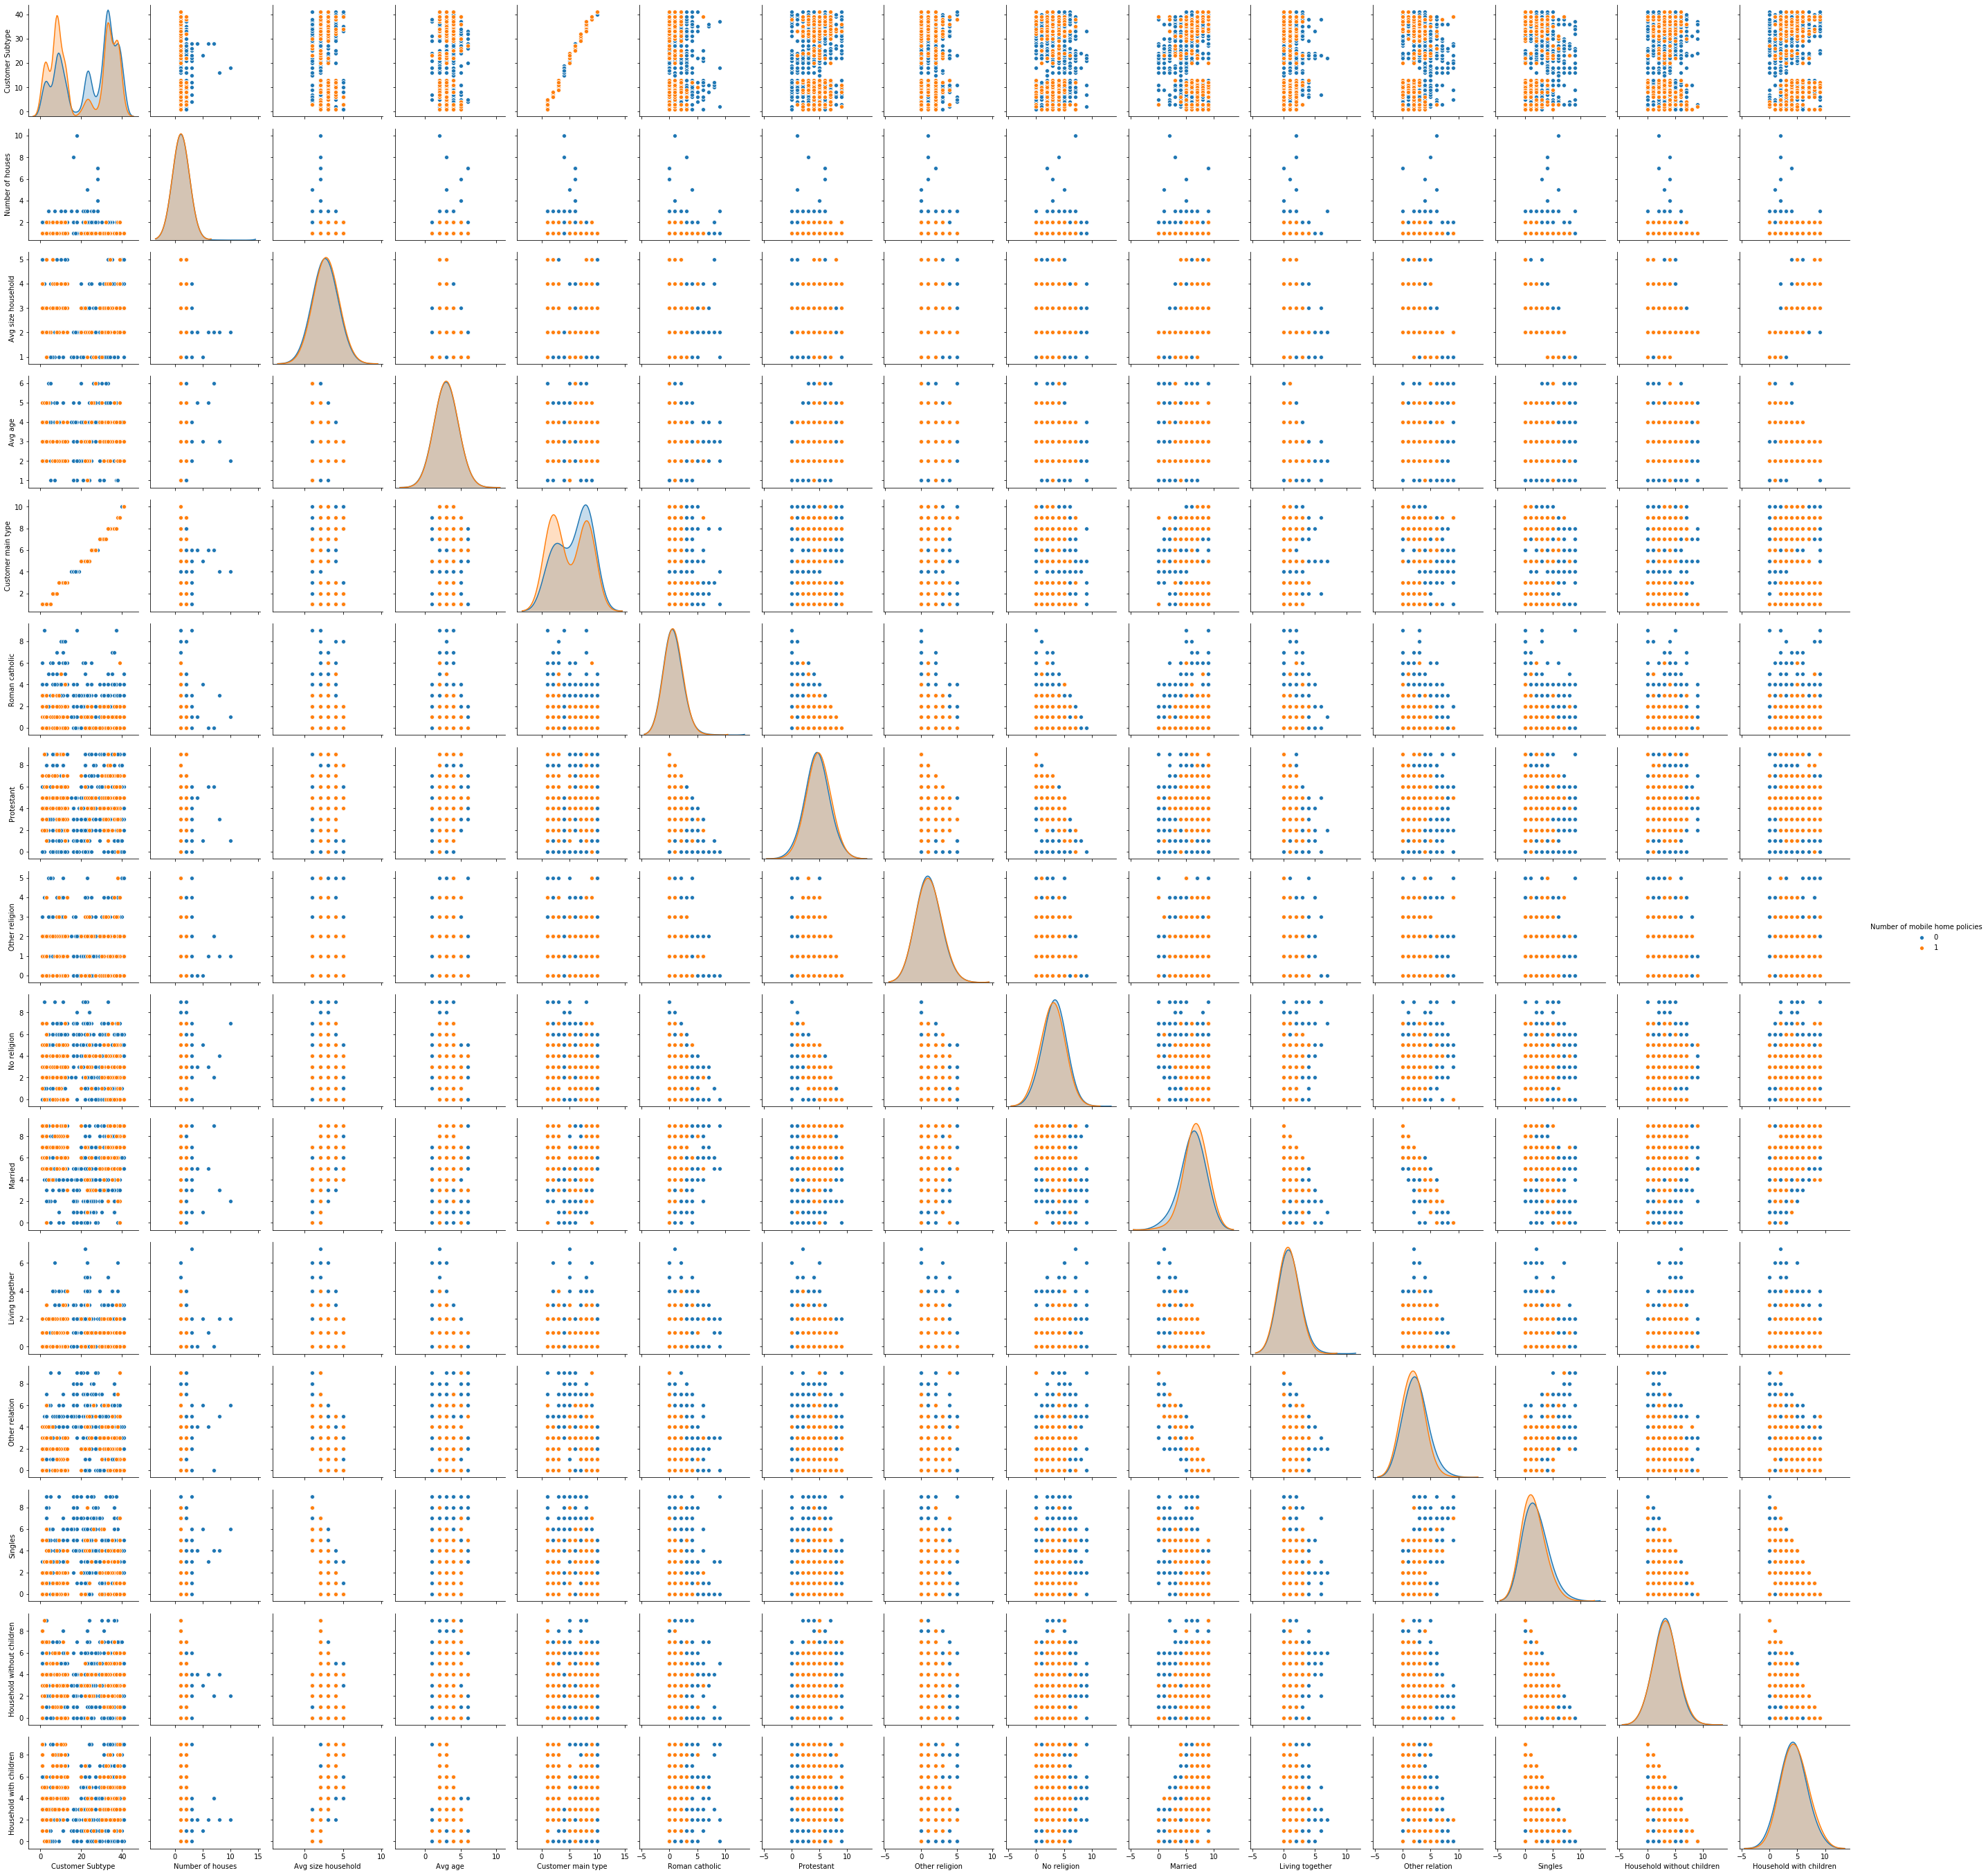

In [51]:
sns.pairplot(data = df_train_1, x_vars=cols,y_vars=cols, hue = "Number of mobile home policies", diag_kws= kde_kws)
plt.show()


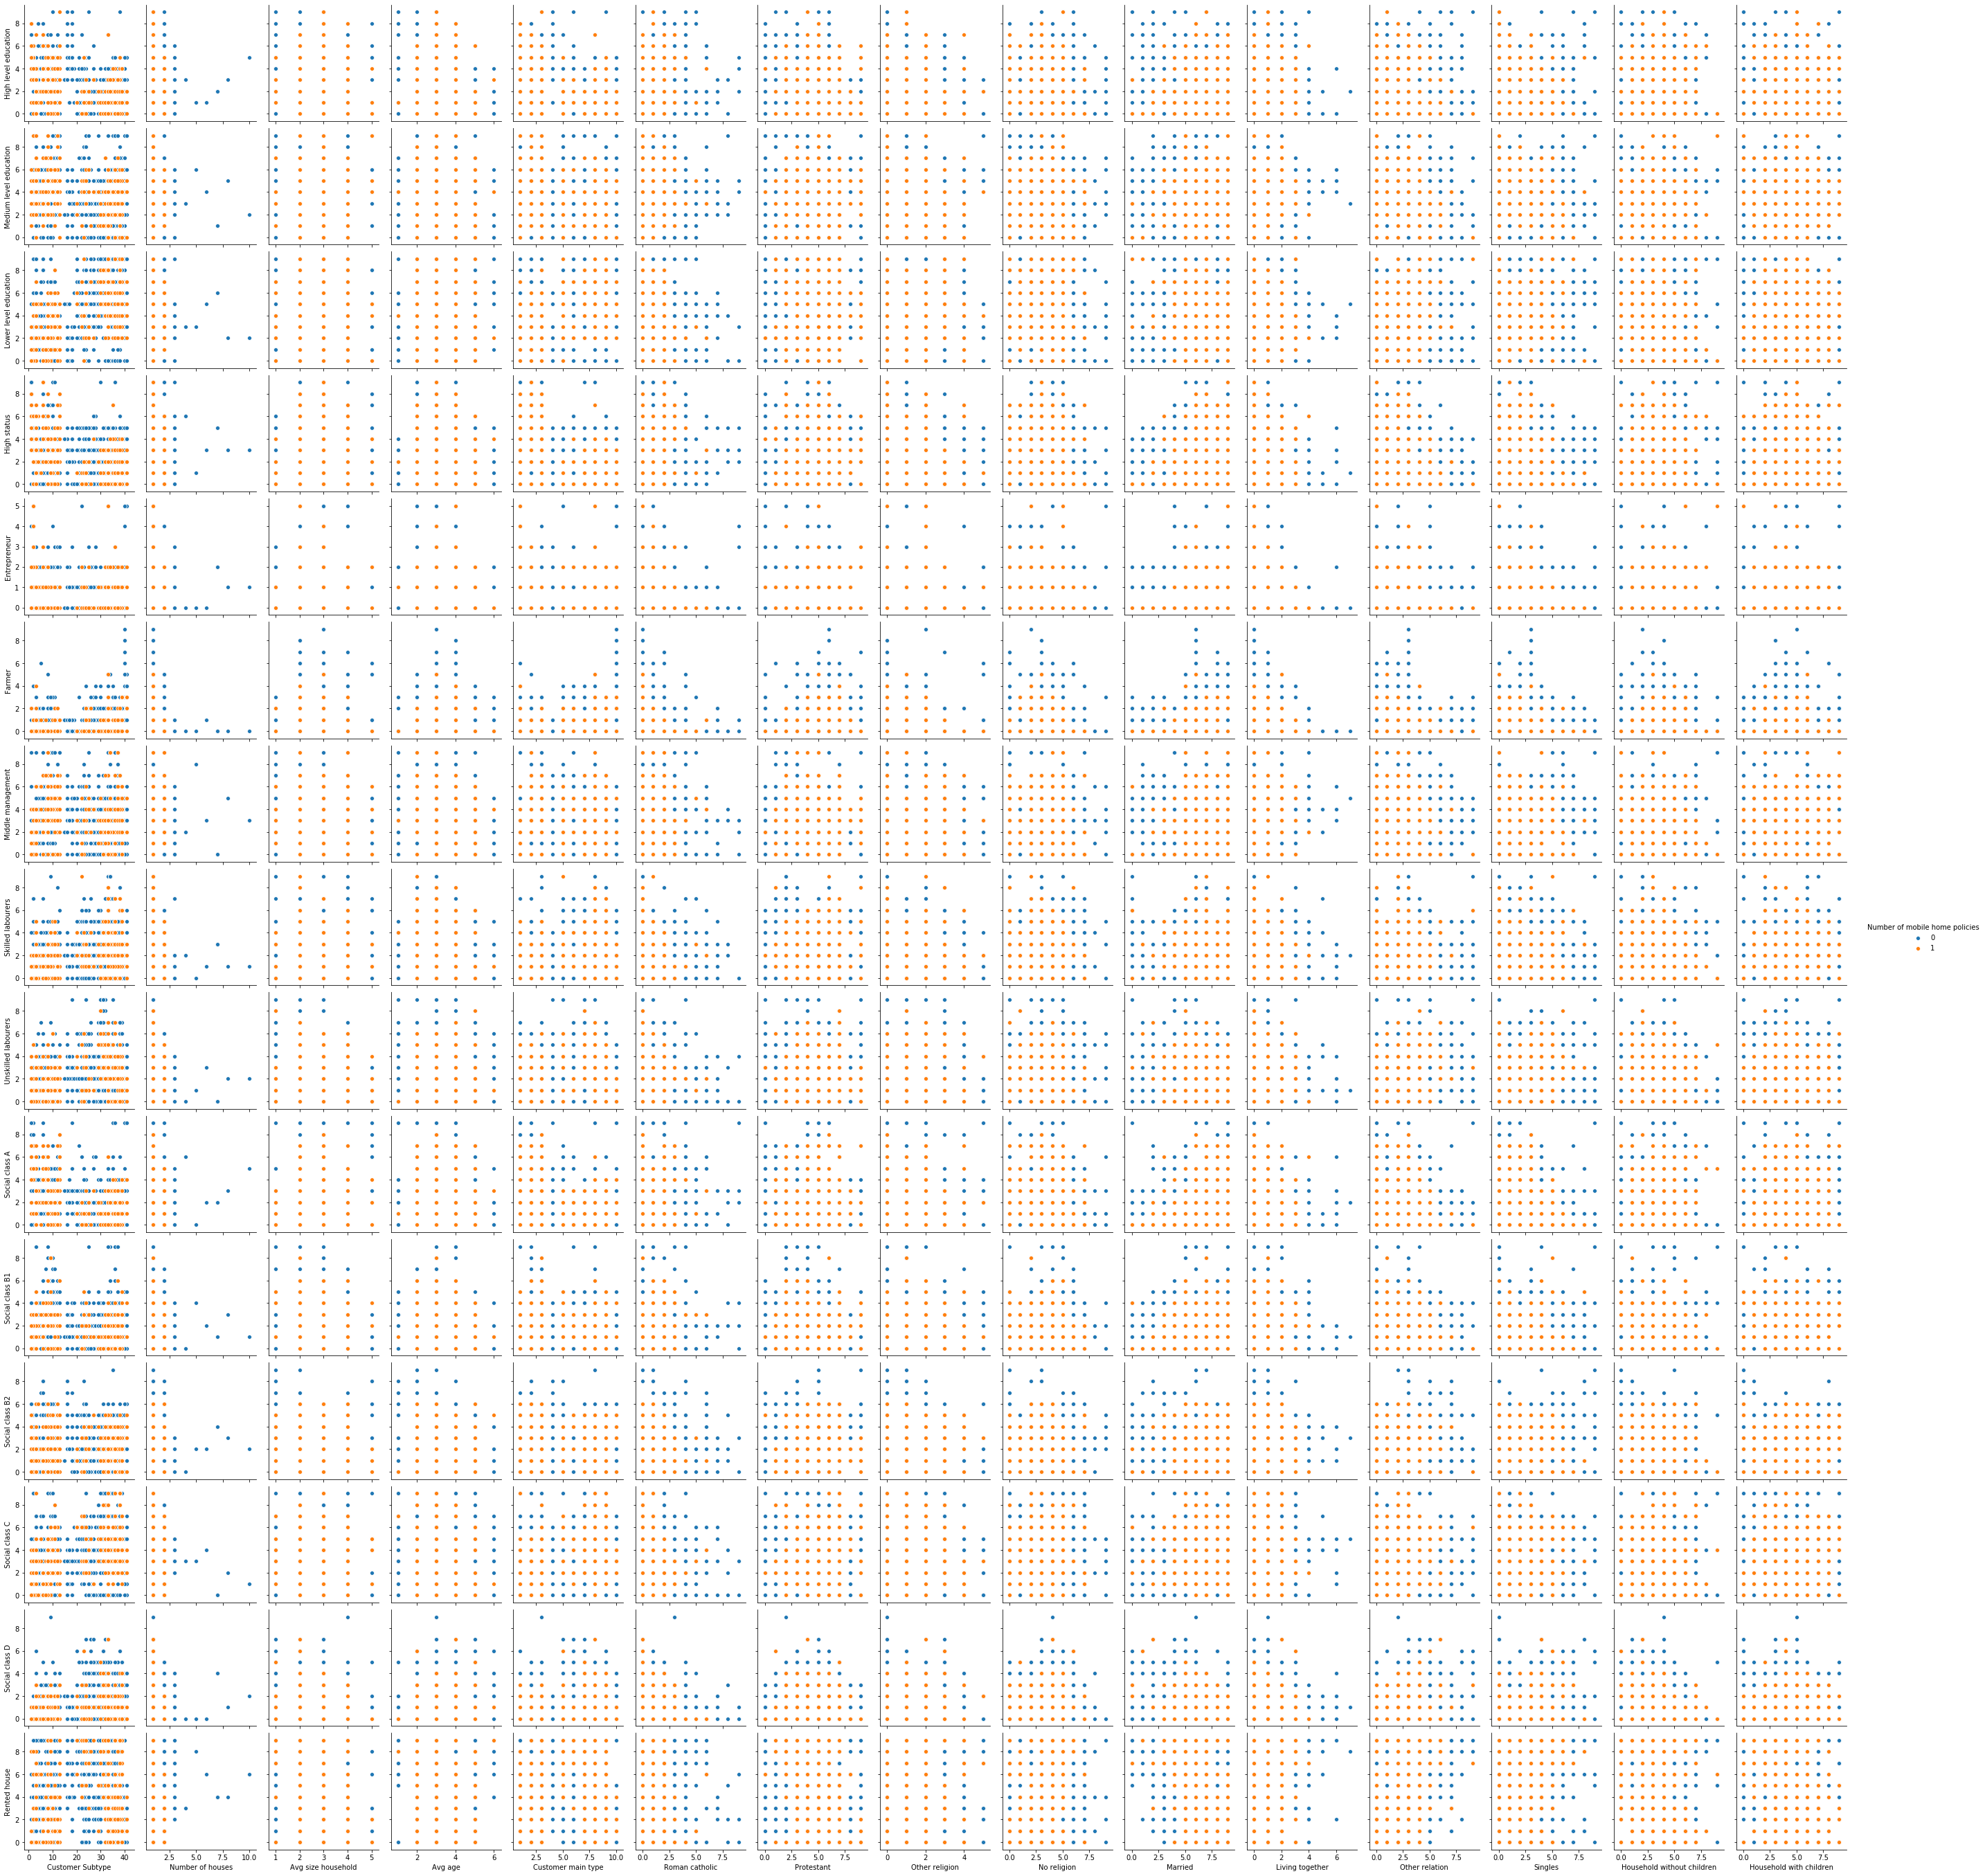

In [52]:
sns.pairplot(data = df_train_1, x_vars=list(df_train_1.columns[0:15]),y_vars=list(df_train_1.columns[15:30]), hue = "Number of mobile home policies", diag_kws= kde_kws)
plt.show()

                  Number of mobile home policies
Customer Subtype                                
1                                         0.1048
2                                         0.0732
3                                         0.1004
4                                         0.0385
5                                         0.0444
6                                         0.1008
7                                         0.0682
8                                         0.1504
9                                         0.0432
10                                        0.0545
11                                        0.0588
12                                        0.1441
13                                        0.0726
15                                        0.0000
16                                        0.0000
17                                        0.0000
18                                        0.0000
19                                        0.0000
20                  

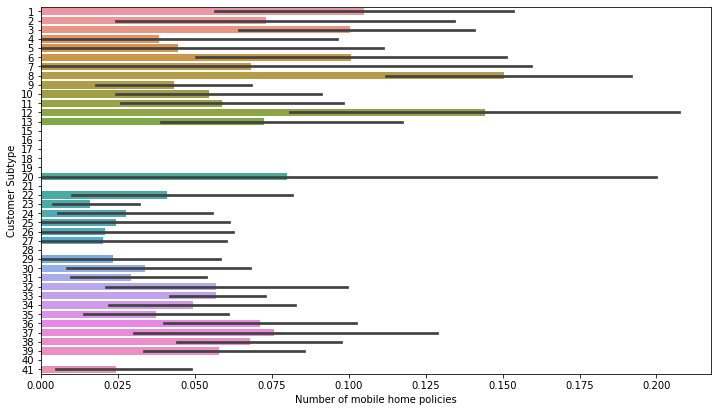

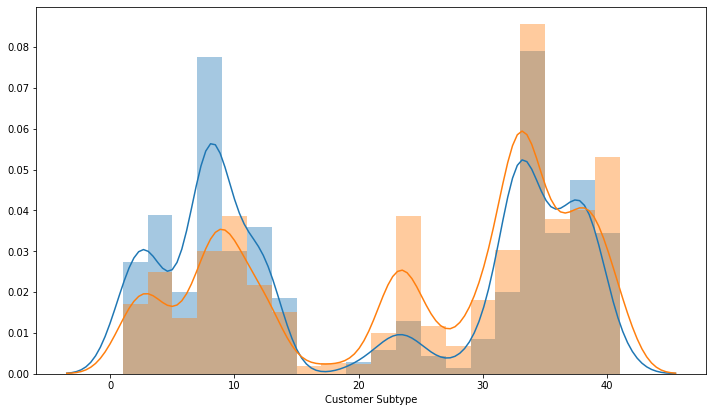

                  Number of mobile home policies
Number of houses                                
1                                         0.0598
2                                         0.0653
3                                         0.0000
4                                         0.0000
5                                         0.0000
6                                         0.0000
7                                         0.0000
8                                         0.0000
10                                        0.0000


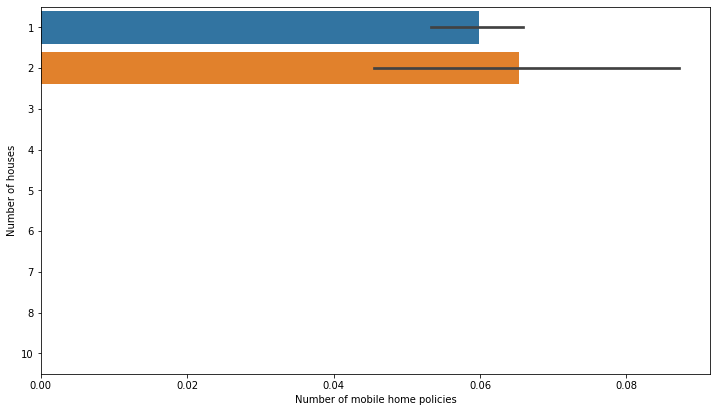

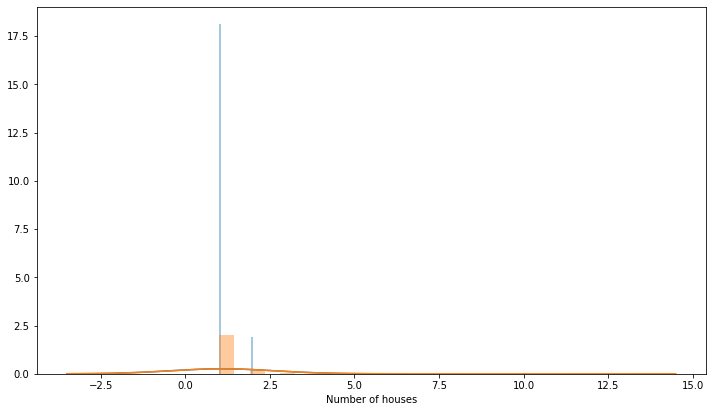

                    Number of mobile home policies
Avg size household                                
1                                           0.0282
2                                           0.0540
3                                           0.0646
4                                           0.0722
5                                           0.0588


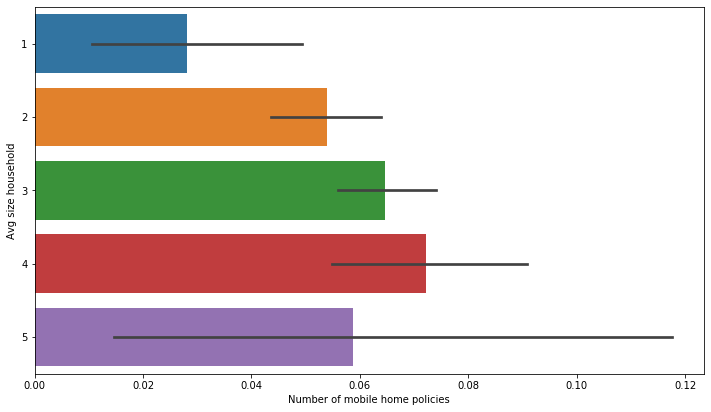

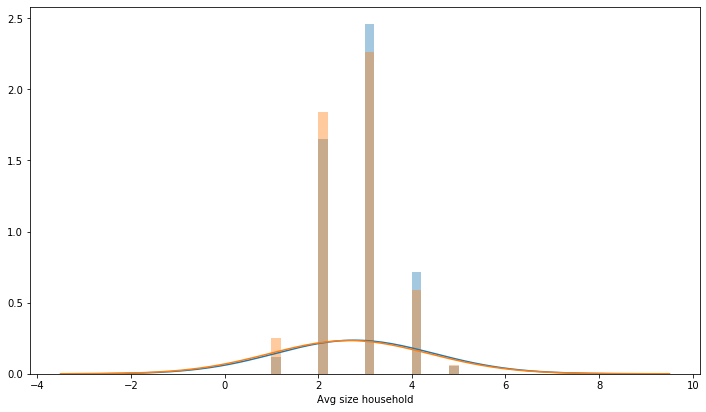

         Number of mobile home policies
Avg age                                
1                                0.0135
2                                0.0599
3                                0.0610
4                                0.0596
5                                0.0622
6                                0.0333


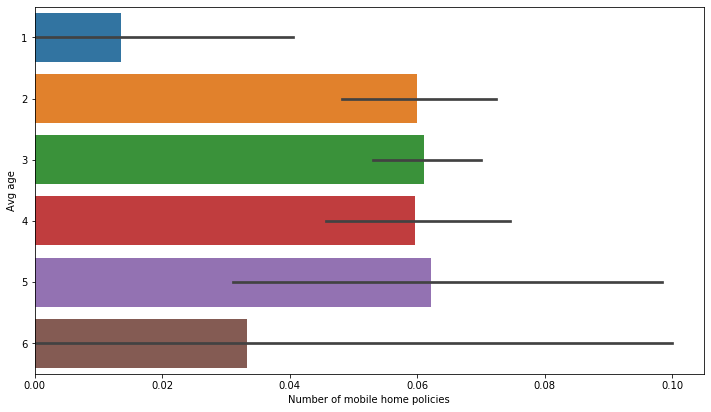

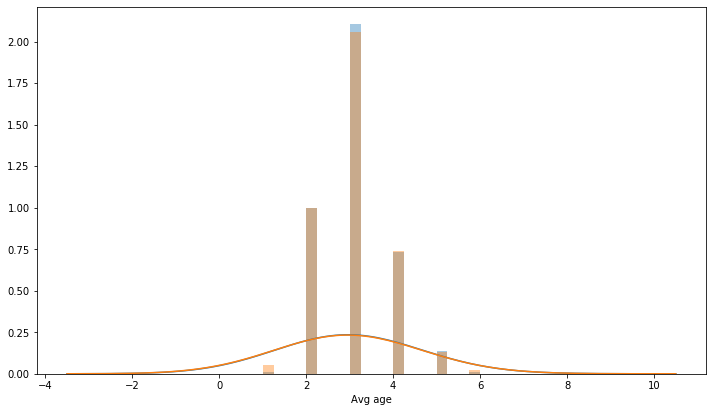

                    Number of mobile home policies
Customer main type                                
1                                           0.0870
2                                           0.1315
3                                           0.0666
4                                           0.0000
5                                           0.0264
6                                           0.0195
7                                           0.0364
8                                           0.0569
9                                           0.0630
10                                          0.0181


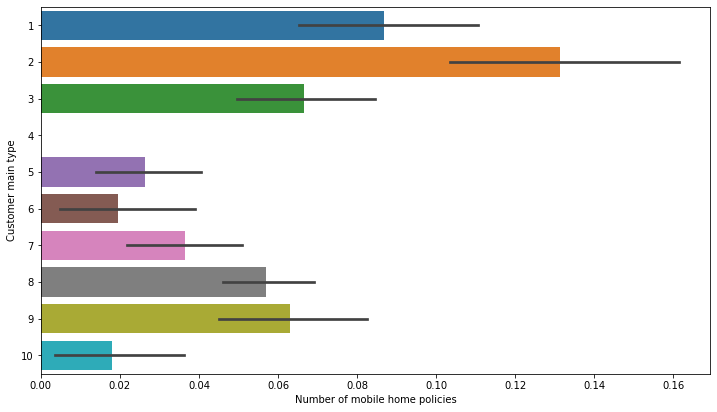

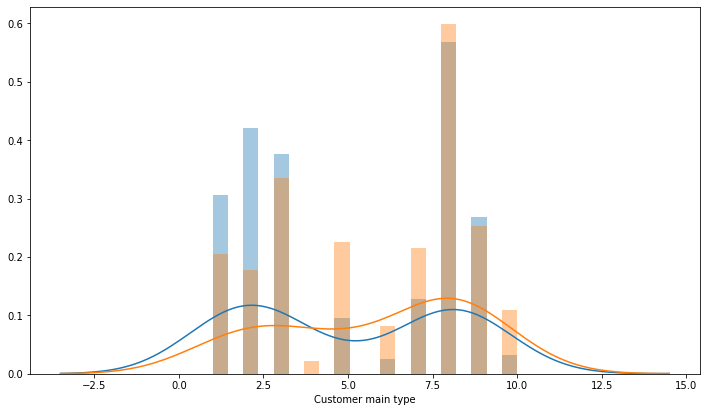

                Number of mobile home policies
Roman catholic                                
0                                       0.0548
1                                       0.0669
2                                       0.0737
3                                       0.0461
4                                       0.0152
5                                       0.0556
6                                       0.0769
7                                       0.0000
8                                       0.0000
9                                       0.0000


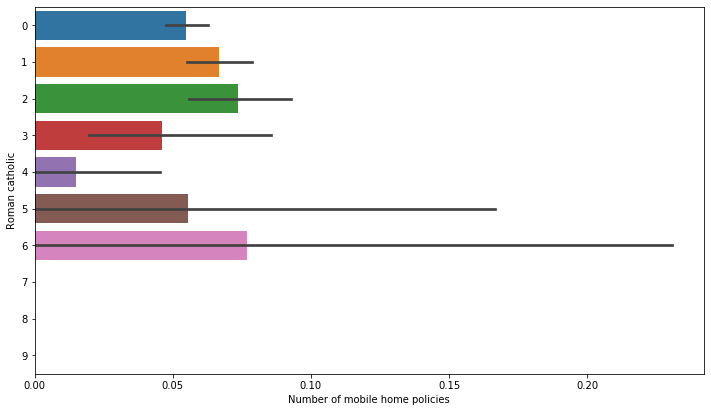

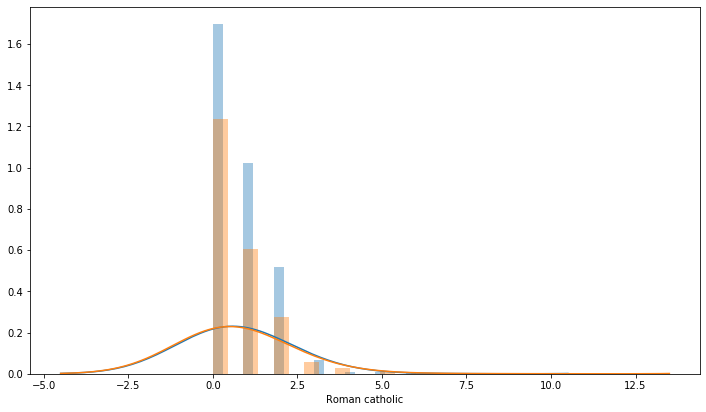

            Number of mobile home policies
Protestant                                
0                                   0.0128
1                                   0.0373
2                                   0.0606
3                                   0.0492
4                                   0.0541
5                                   0.0646
6                                   0.0546
7                                   0.0975
8                                   0.0462
9                                   0.0462


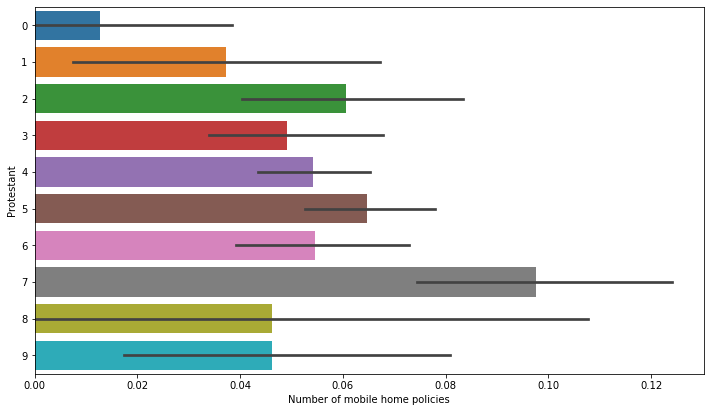

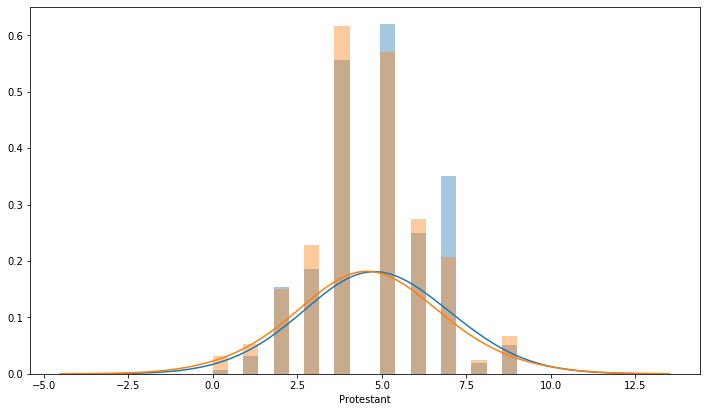

                Number of mobile home policies
Other religion                                
0                                       0.0649
1                                       0.0462
2                                       0.0713
3                                       0.0700
4                                       0.0530
5                                       0.0357


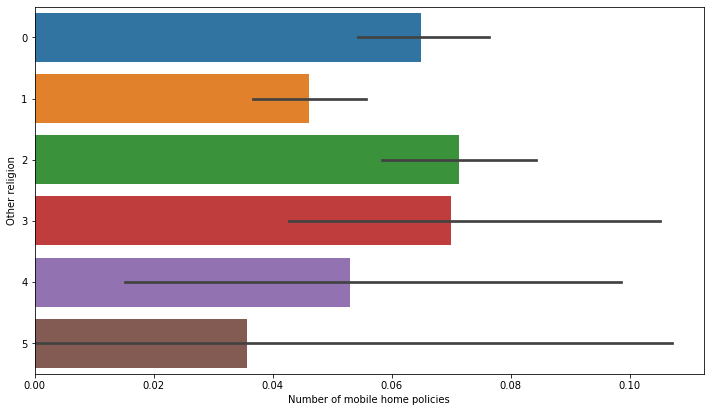

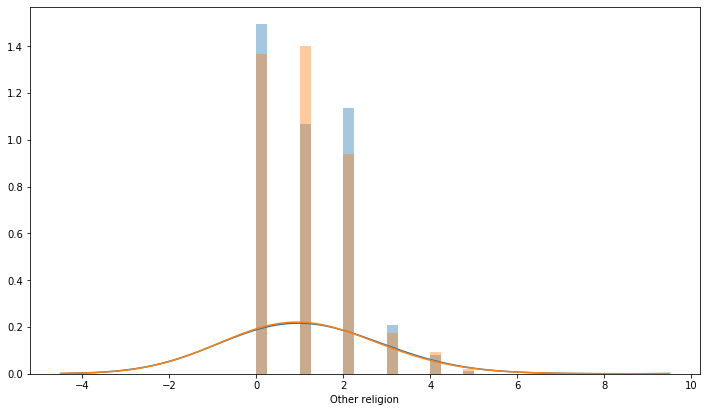

             Number of mobile home policies
No religion                                
0                                    0.0811
1                                    0.0913
2                                    0.0654
3                                    0.0599
4                                    0.0525
5                                    0.0530
6                                    0.0184
7                                    0.0891
8                                    0.0000
9                                    0.0000


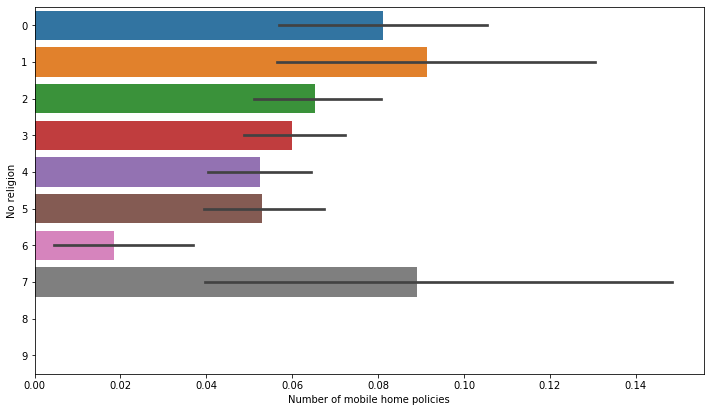

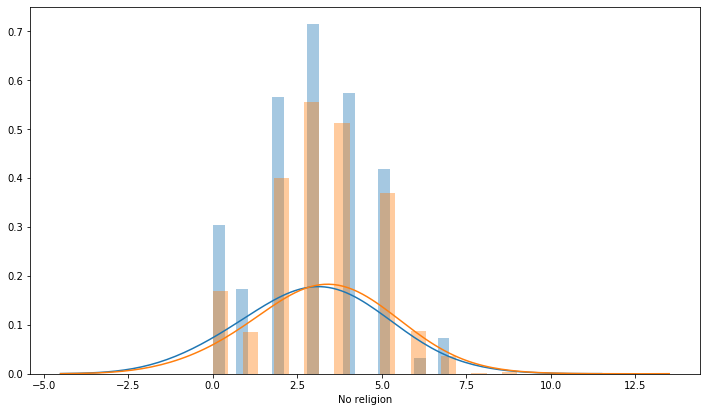

         Number of mobile home policies
Married                                
0                                0.0312
1                                0.0133
2                                0.0191
3                                0.0244
4                                0.0309
5                                0.0507
6                                0.0606
7                                0.0689
8                                0.0693
9                                0.0831


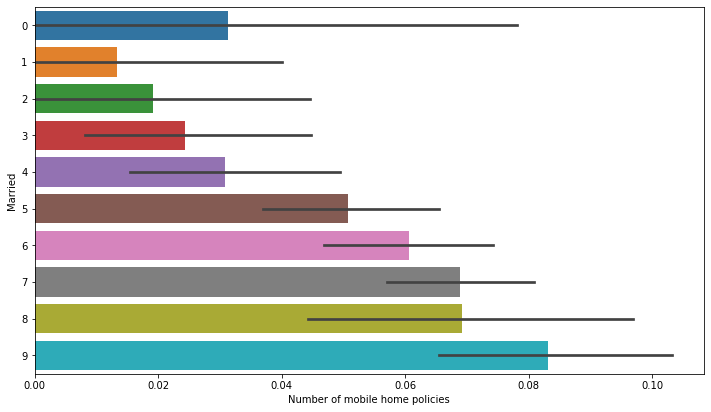

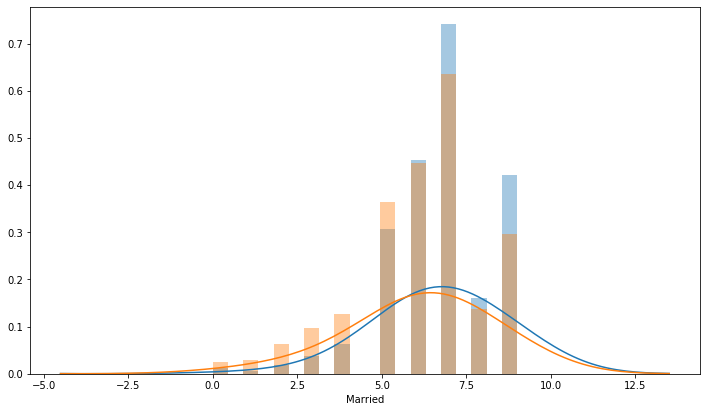

                 Number of mobile home policies
Living together                                
0                                        0.0658
1                                        0.0591
2                                        0.0549
3                                        0.0440
4                                        0.0128
5                                        0.0000
6                                        0.0000
7                                        0.0000


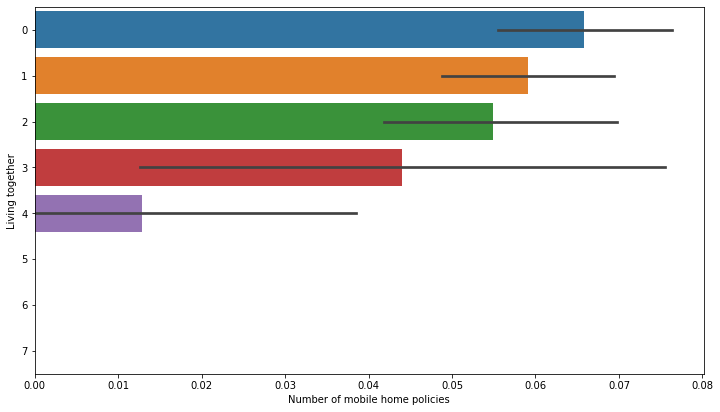

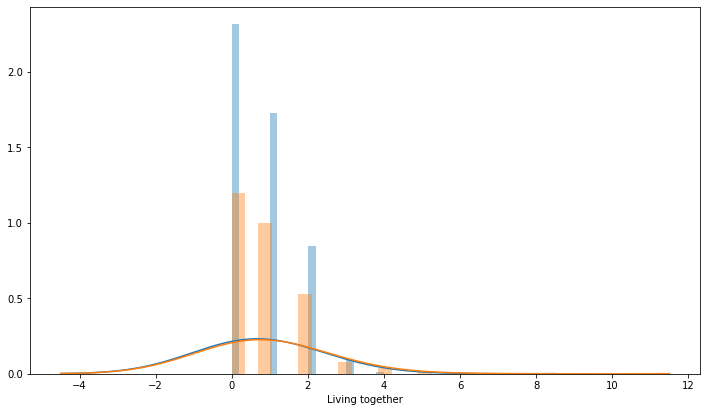

                Number of mobile home policies
Other relation                                
0                                       0.0793
1                                       0.0612
2                                       0.0626
3                                       0.0642
4                                       0.0401
5                                       0.0226
6                                       0.0223
7                                       0.0156
8                                       0.0000
9                                       0.0417


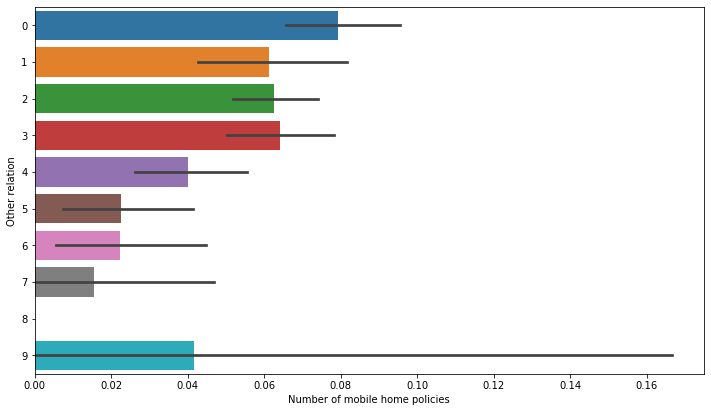

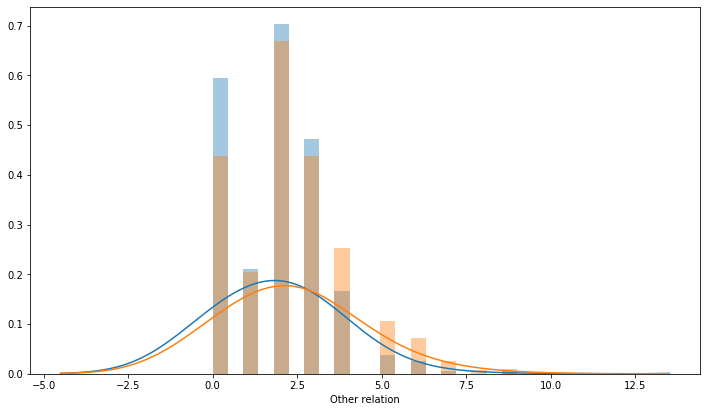

         Number of mobile home policies
Singles                                
0                                0.0729
1                                0.0673
2                                0.0601
3                                0.0483
4                                0.0405
5                                0.0502
6                                0.0315
7                                0.0149
8                                0.0417
9                                0.0000


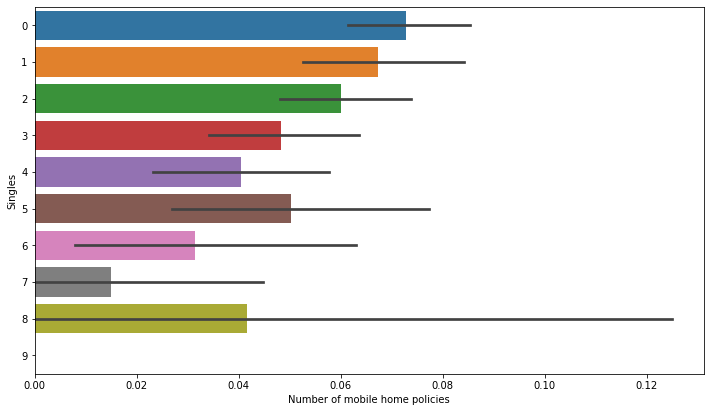

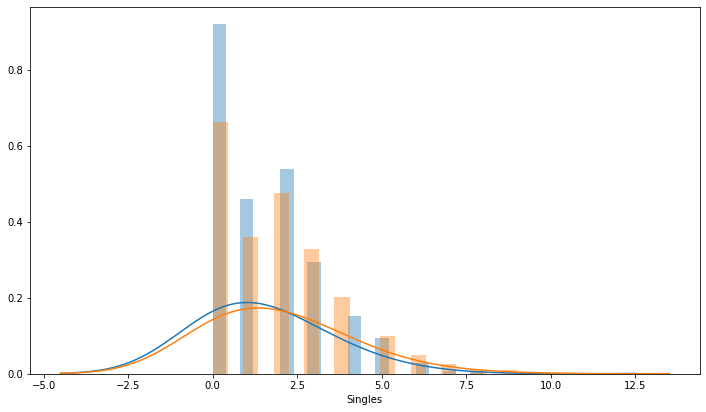

                            Number of mobile home policies
Household without children                                
0                                                   0.0620
1                                                   0.0645
2                                                   0.0538
3                                                   0.0594
4                                                   0.0605
5                                                   0.0495
6                                                   0.0841
7                                                   0.0833
8                                                   0.0714
9                                                   0.0345


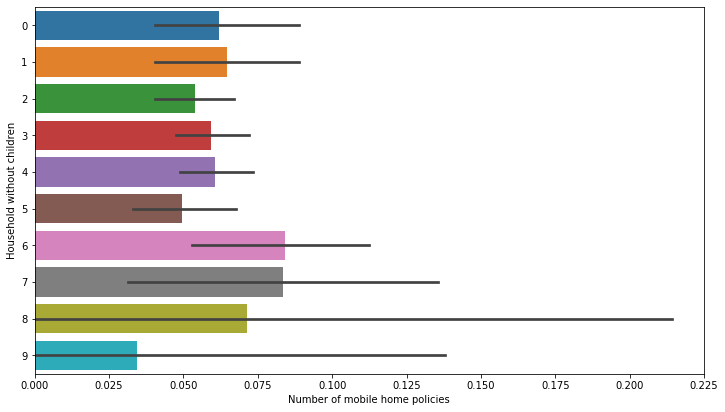

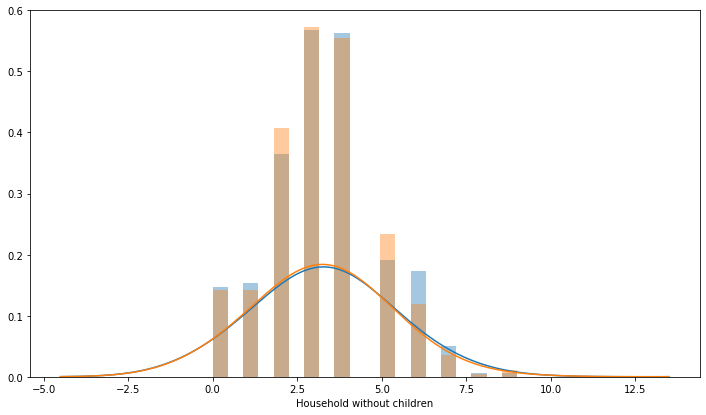

                         Number of mobile home policies
Household with children                                
0                                                0.0327
1                                                0.0342
2                                                0.0614
3                                                0.0606
4                                                0.0580
5                                                0.0524
6                                                0.0715
7                                                0.0655
8                                                0.0874
9                                                0.0753


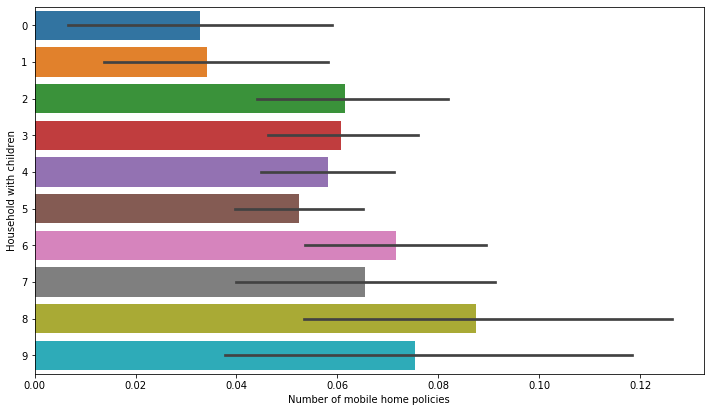

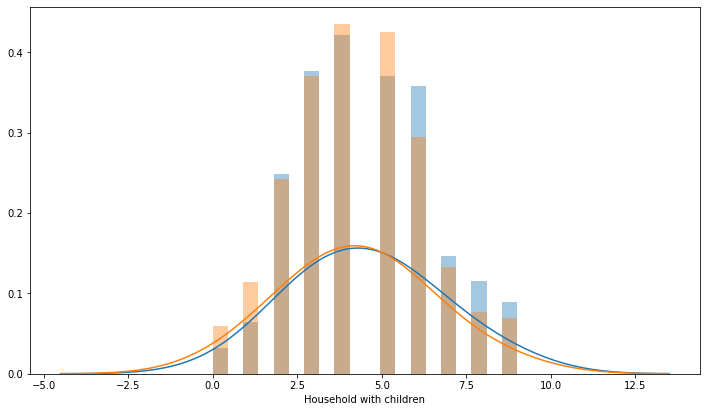

                      Number of mobile home policies
High level education                                
0                                             0.0424
1                                             0.0552
2                                             0.0612
3                                             0.0713
4                                             0.1135
5                                             0.1123
6                                             0.1194
7                                             0.1176
8                                             0.0909
9                                             0.1111


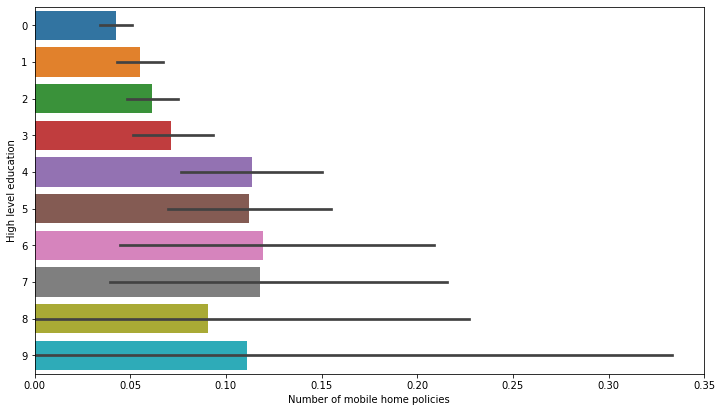

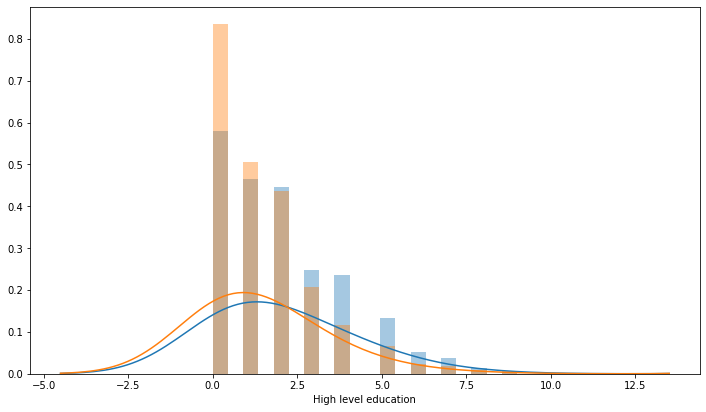

                        Number of mobile home policies
Medium level education                                
0                                               0.0331
1                                               0.0574
2                                               0.0512
3                                               0.0602
4                                               0.0603
5                                               0.0732
6                                               0.0546
7                                               0.1146
8                                               0.0811
9                                               0.0930


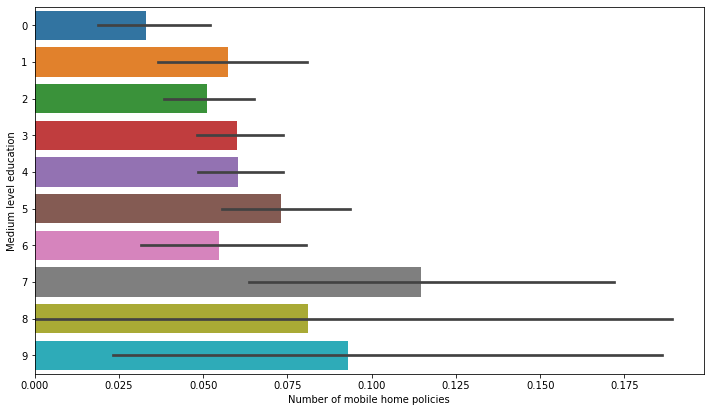

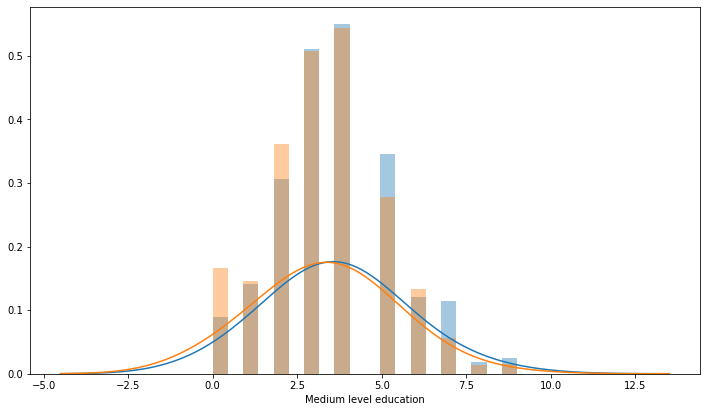

                       Number of mobile home policies
Lower level education                                
0                                              0.0970
1                                              0.1111
2                                              0.0975
3                                              0.0691
4                                              0.0599
5                                              0.0486
6                                              0.0374
7                                              0.0422
8                                              0.0512
9                                              0.0248


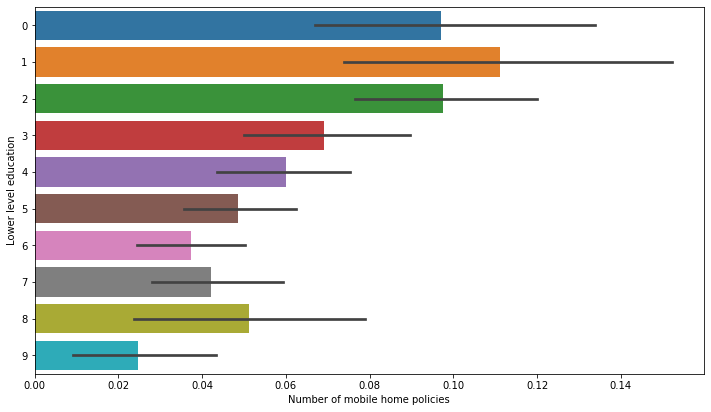

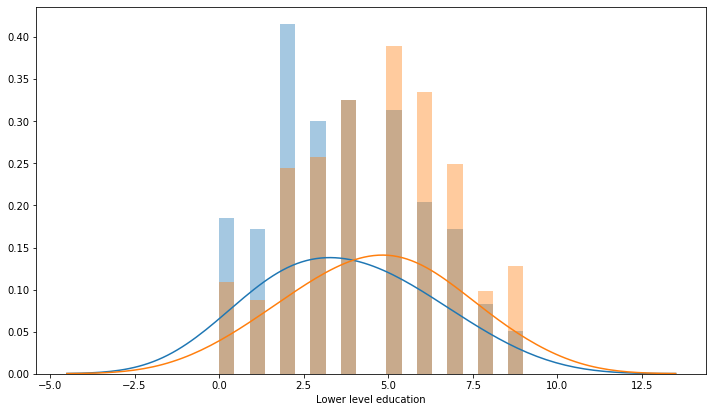

             Number of mobile home policies
High status                                
0                                    0.0479
1                                    0.0490
2                                    0.0572
3                                    0.0701
4                                    0.0831
5                                    0.0522
6                                    0.1304
7                                    0.1522
8                                    0.1154
9                                    0.0645


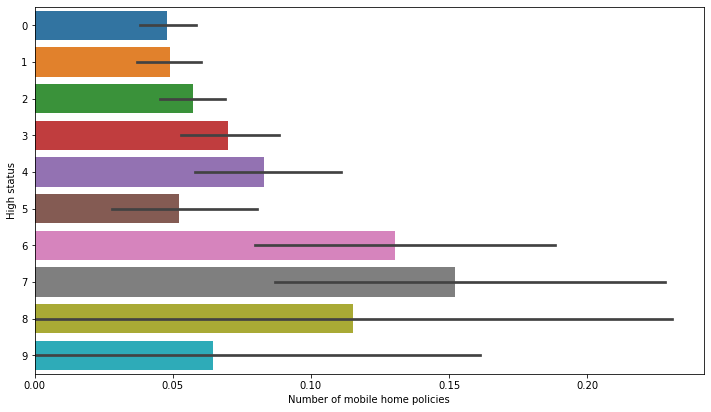

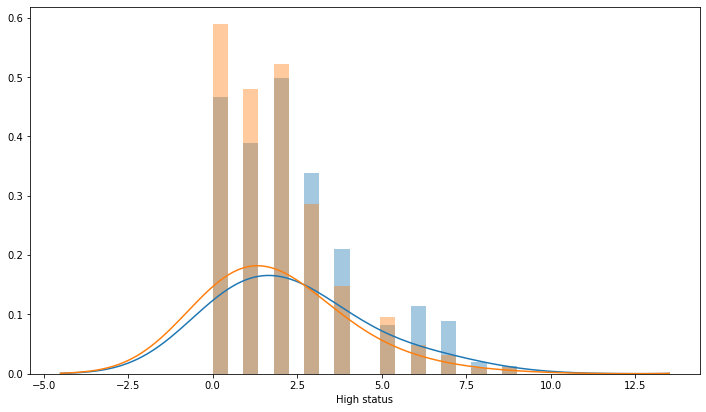

              Number of mobile home policies
Entrepreneur                                
0                                     0.0559
1                                     0.0682
2                                     0.0747
3                                     0.0811
4                                     0.0833
5                                     0.0577


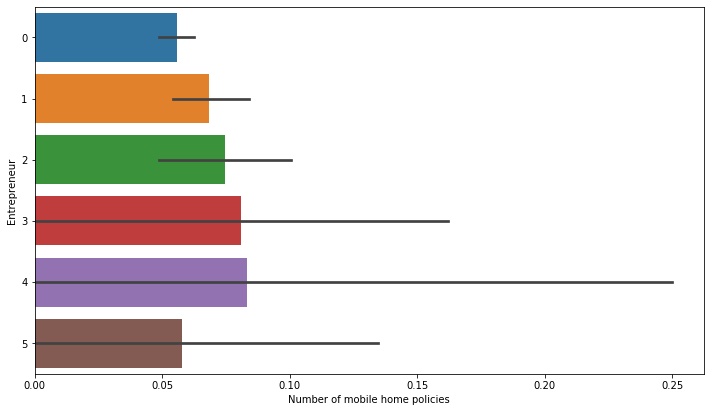

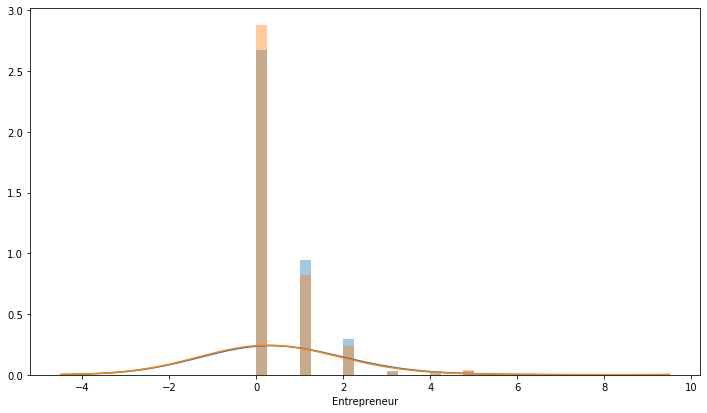

        Number of mobile home policies
Farmer                                
0                               0.0680
1                               0.0422
2                               0.0411
3                               0.0420
4                               0.0130
5                               0.0169
6                               0.0000
7                               0.0000
8                               0.0000
9                               0.0000


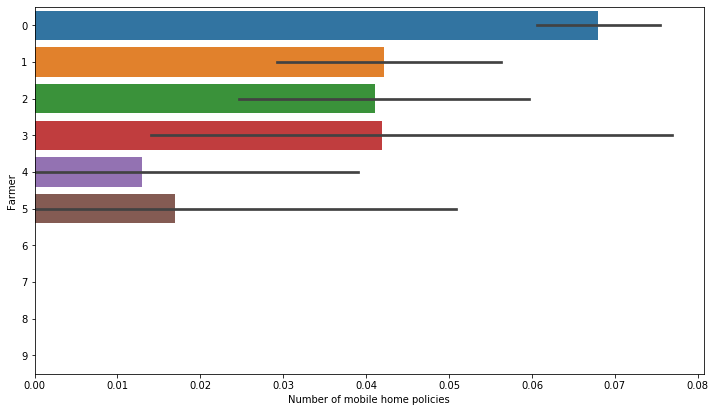

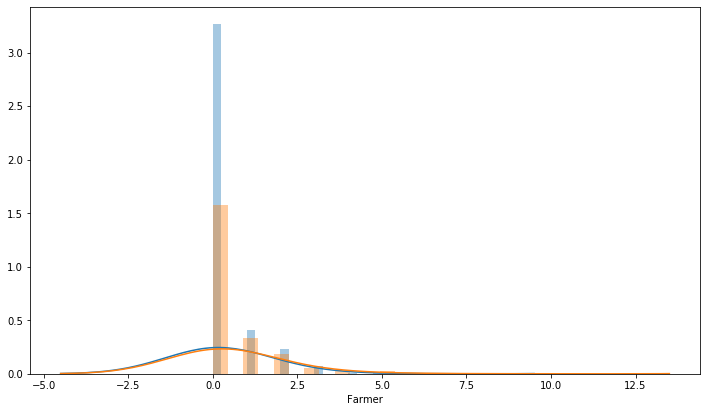

                   Number of mobile home policies
Middle management                                
0                                          0.0525
1                                          0.0471
2                                          0.0570
3                                          0.0488
4                                          0.0640
5                                          0.0766
6                                          0.0806
7                                          0.1236
8                                          0.0000
9                                          0.1000


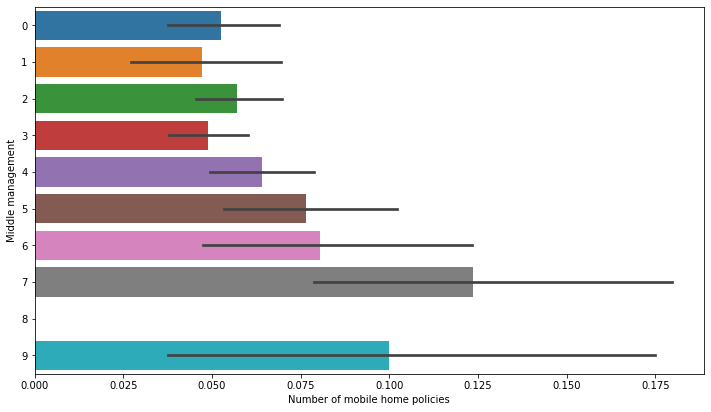

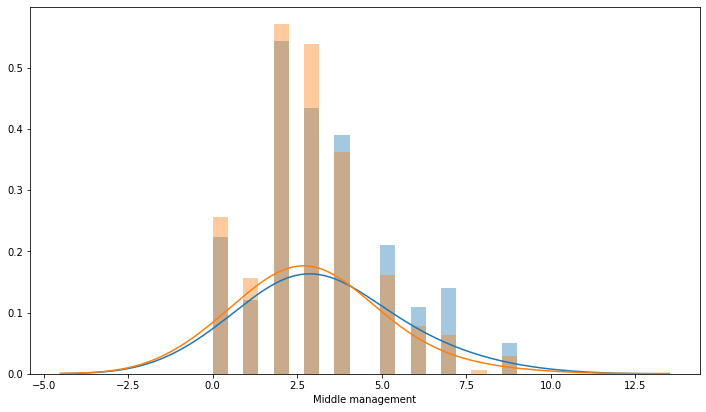

                   Number of mobile home policies
Skilled labourers                                
0                                          0.0660
1                                          0.0901
2                                          0.0622
3                                          0.0420
4                                          0.0414
5                                          0.0419
6                                          0.0355
7                                          0.0735
8                                          0.1250
9                                          0.1000


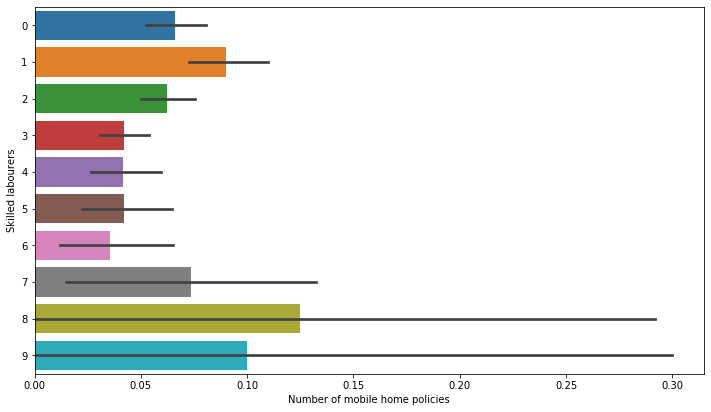

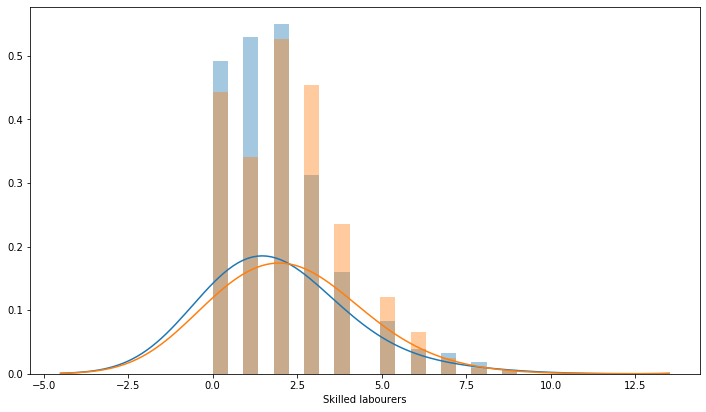

                     Number of mobile home policies
Unskilled labourers                                
0                                            0.0806
1                                            0.0776
2                                            0.0570
3                                            0.0451
4                                            0.0492
5                                            0.0453
6                                            0.0492
7                                            0.0303
8                                            0.1111
9                                            0.0000


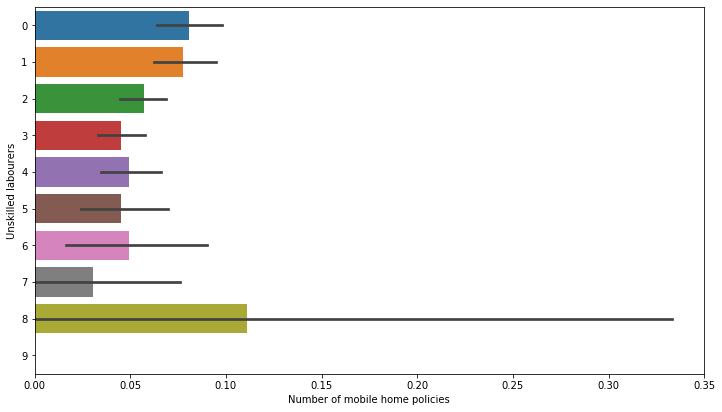

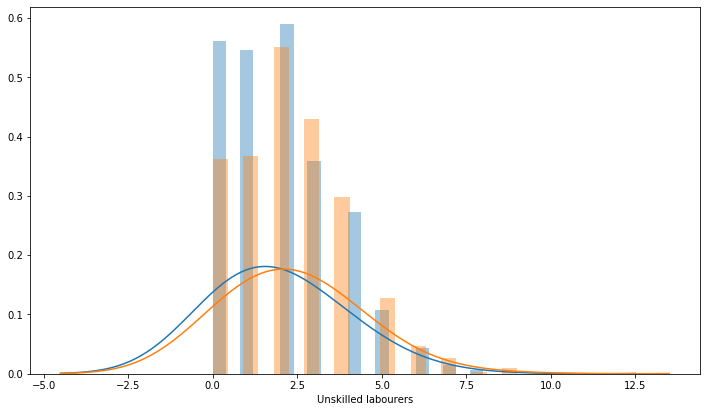

                Number of mobile home policies
Social class A                                
0                                       0.0483
1                                       0.0510
2                                       0.0559
3                                       0.0701
4                                       0.1111
5                                       0.1102
6                                       0.1250
7                                       0.1646
8                                       0.0769
9                                       0.0000


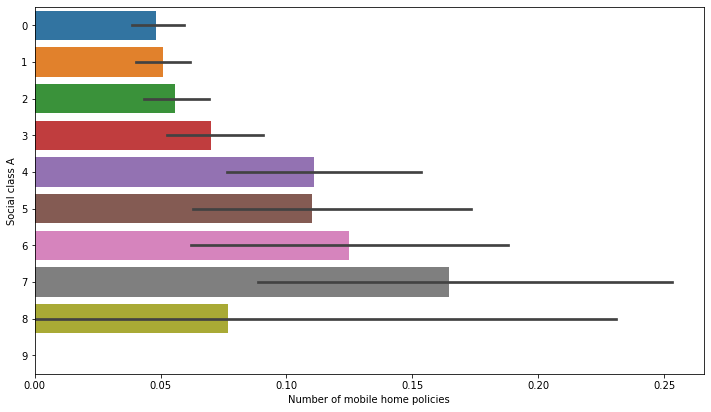

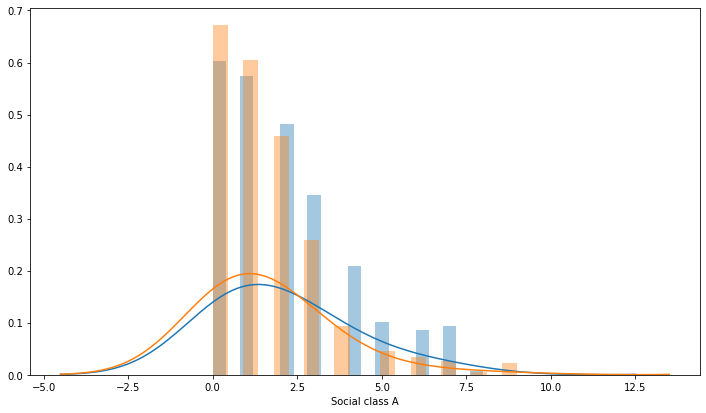

                 Number of mobile home policies
Social class B1                                
0                                        0.0532
1                                        0.0547
2                                        0.0566
3                                        0.0839
4                                        0.0638
5                                        0.0513
6                                        0.2000
7                                        0.0000
8                                        0.1250
9                                        0.0000


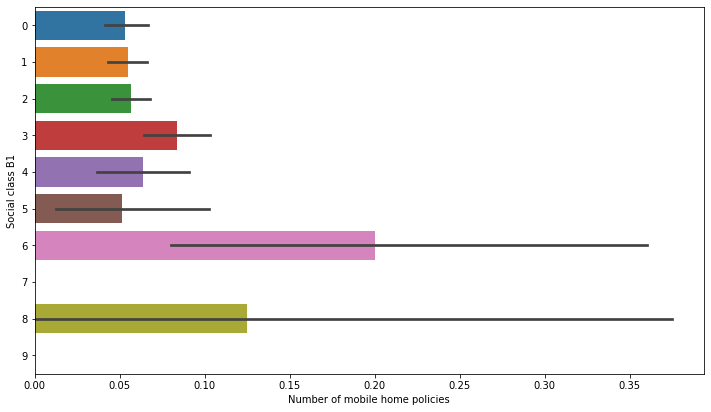

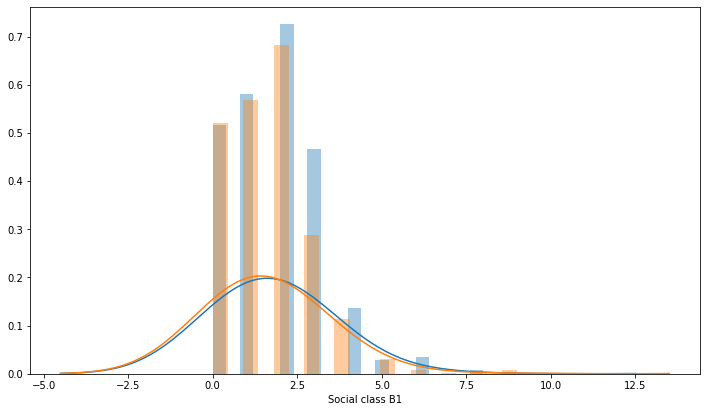

                 Number of mobile home policies
Social class B2                                
0                                        0.0586
1                                        0.0546
2                                        0.0597
3                                        0.0621
4                                        0.0721
5                                        0.0476
6                                        0.0625
7                                        0.0000
8                                        0.0000
9                                        0.0000


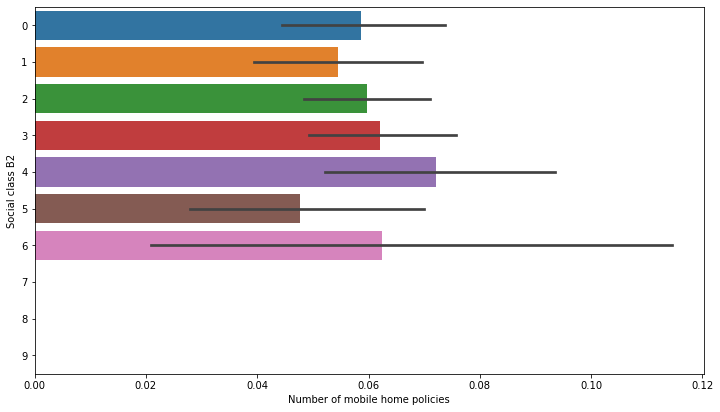

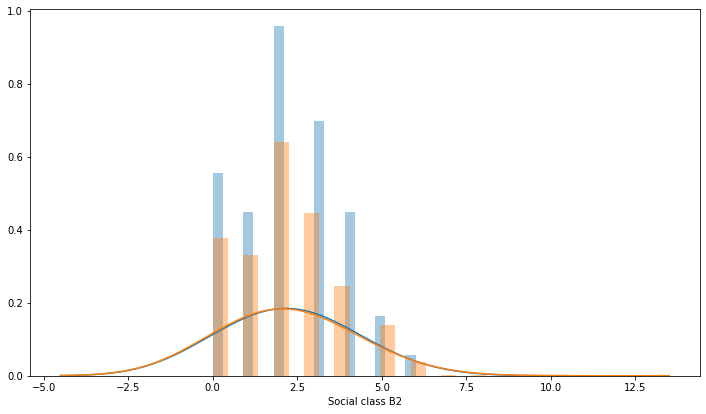

                Number of mobile home policies
Social class C                                
0                                       0.0687
1                                       0.1103
2                                       0.0816
3                                       0.0560
4                                       0.0535
5                                       0.0394
6                                       0.0595
7                                       0.0461
8                                       0.1127
9                                       0.0484


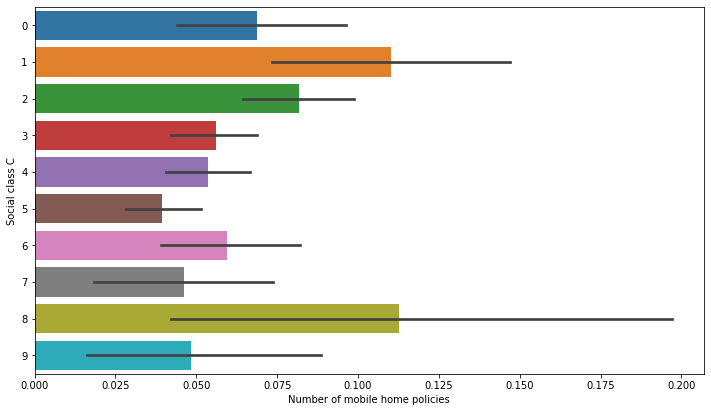

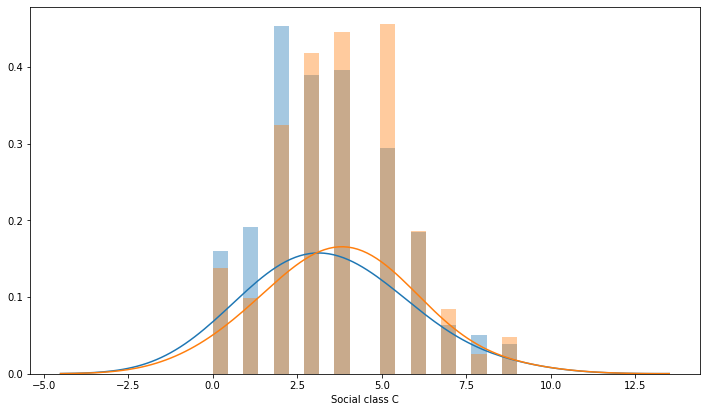

                Number of mobile home policies
Social class D                                
0                                       0.0721
1                                       0.0627
2                                       0.0469
3                                       0.0317
4                                       0.0224
5                                       0.0100
6                                       0.0455
7                                       0.0769
9                                       0.0000


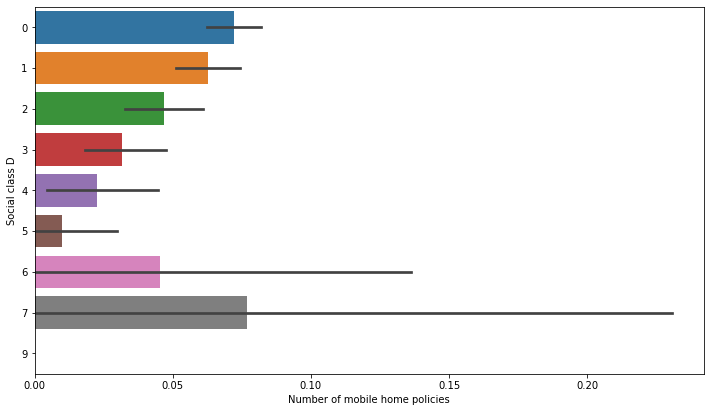

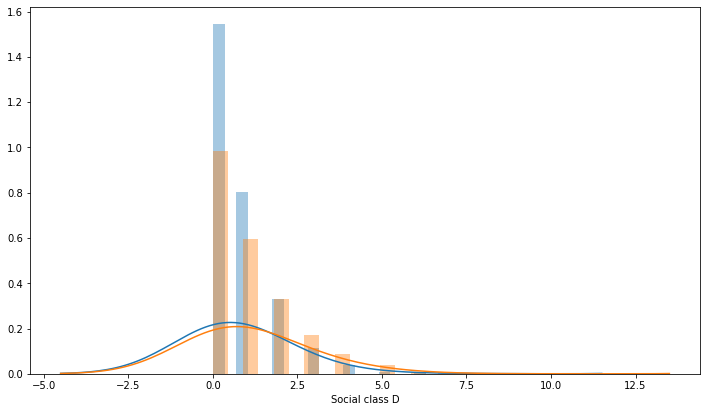

              Number of mobile home policies
Rented house                                
0                                     0.0991
1                                     0.0864
2                                     0.0530
3                                     0.0658
4                                     0.0503
5                                     0.0482
6                                     0.0602
7                                     0.0447
8                                     0.0301
9                                     0.0408


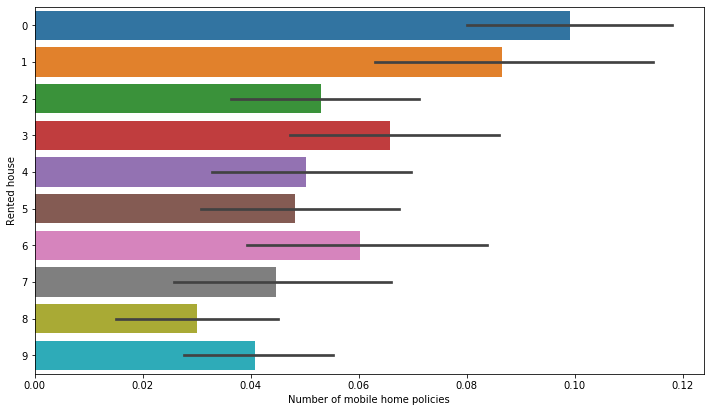

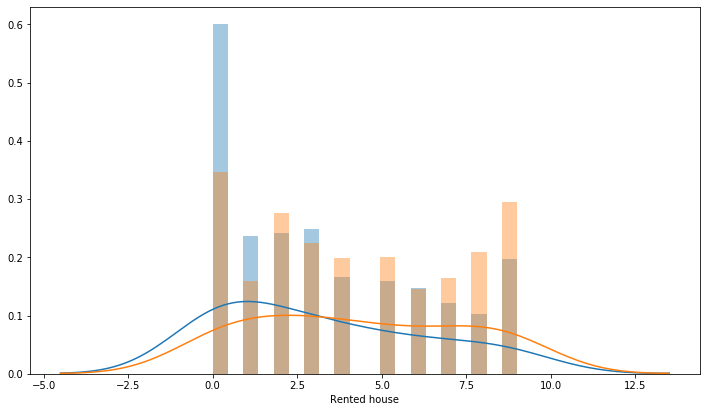

             Number of mobile home policies
Home owners                                
0                                    0.0408
1                                    0.0302
2                                    0.0446
3                                    0.0602
4                                    0.0501
5                                    0.0500
6                                    0.0646
7                                    0.0525
8                                    0.0864
9                                    0.0991


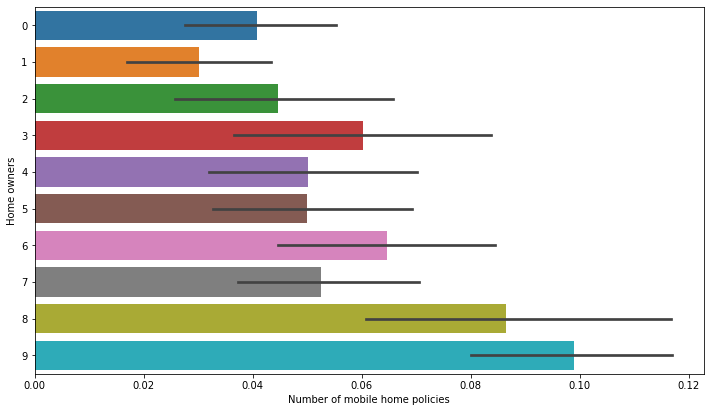

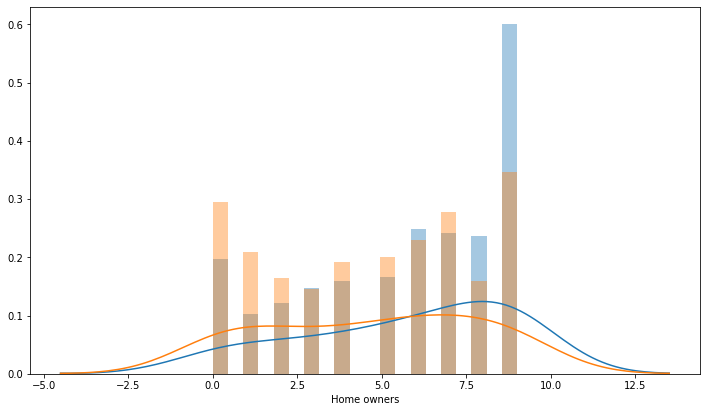

       Number of mobile home policies
1 car                                
0                              0.0000
1                              0.0000
2                              0.0172
3                              0.0303
4                              0.0290
5                              0.0488
6                              0.0547
7                              0.0842
8                              0.0728
9                              0.0772


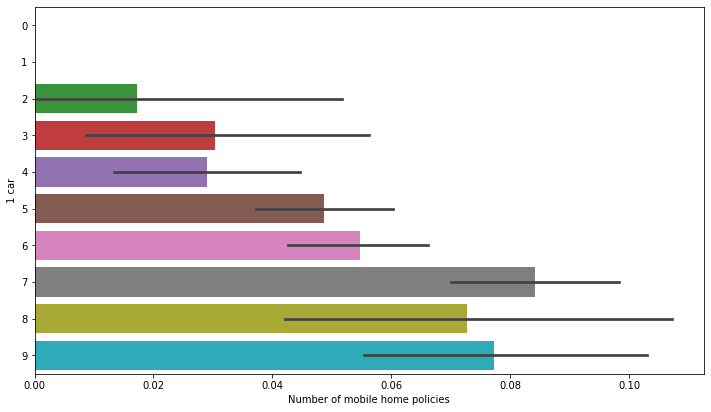

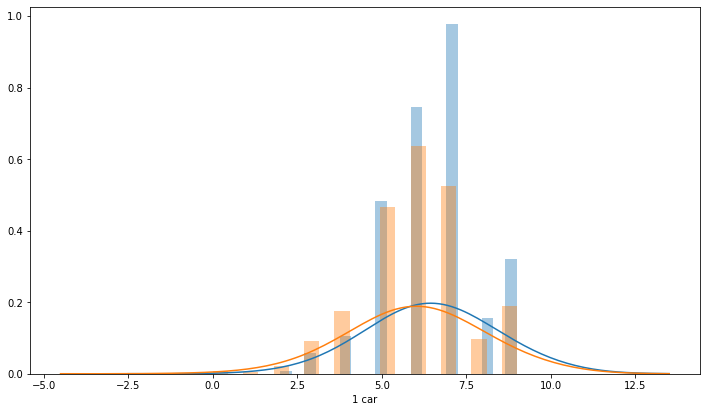

        Number of mobile home policies
2 cars                                
0                               0.0577
1                               0.0572
2                               0.0641
3                               0.0571
4                               0.0631
5                               0.0536
6                               0.1111
7                               0.0000


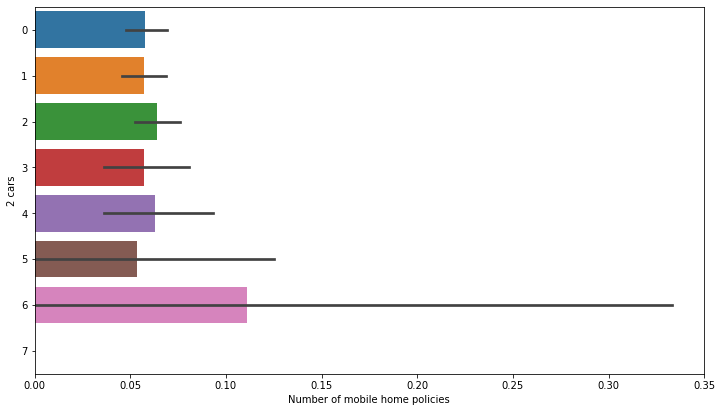

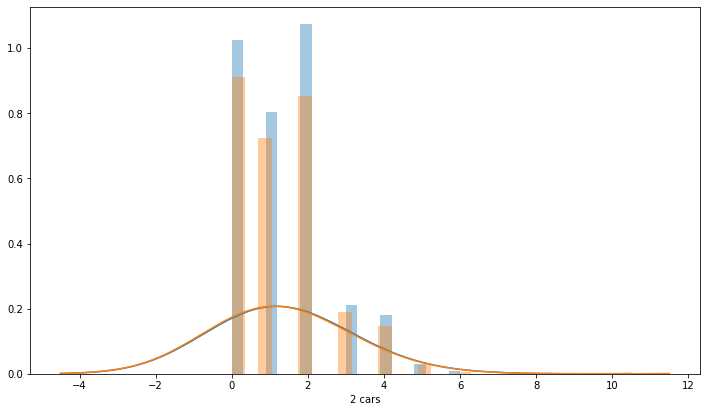

        Number of mobile home policies
No car                                
0                               0.0834
1                               0.0619
2                               0.0665
3                               0.0460
4                               0.0221
5                               0.0230
6                               0.0562
7                               0.0000
8                               0.0000
9                               0.0000


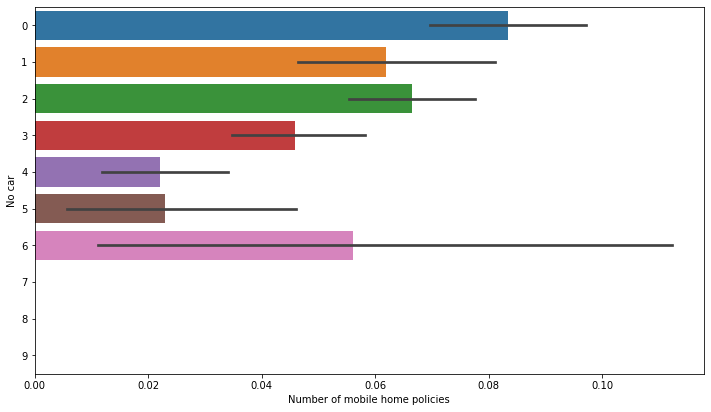

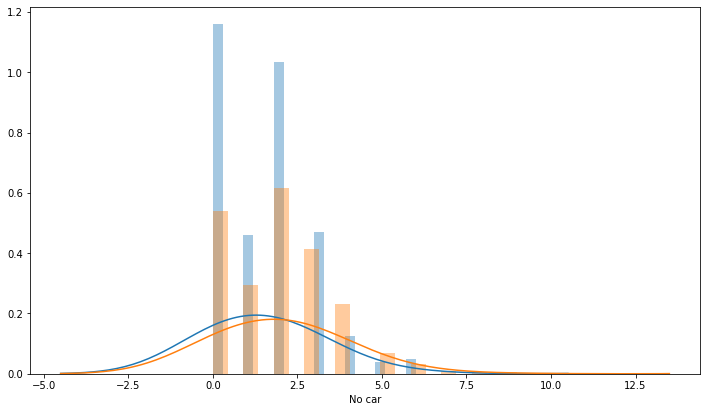

                         Number of mobile home policies
National Health Service                                
0                                                0.1273
1                                                0.0000
2                                                0.0879
3                                                0.0847
4                                                0.0784
5                                                0.0739
6                                                0.0514
7                                                0.0576
8                                                0.0401
9                                                0.0458


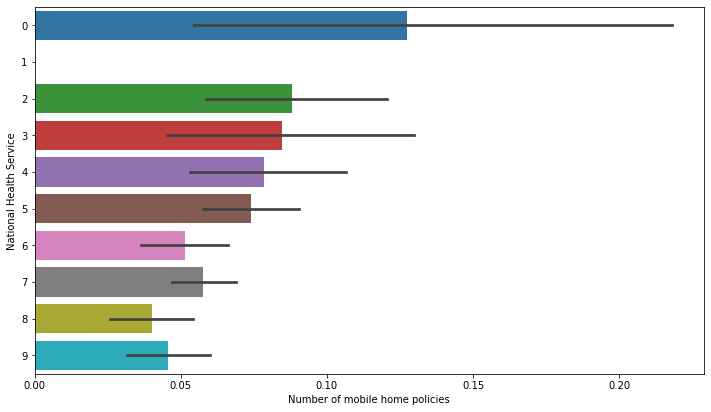

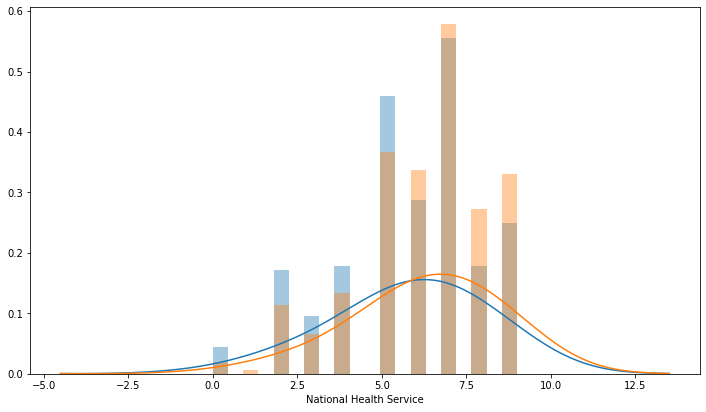

                          Number of mobile home policies
Private health insurance                                
0                                                 0.0458
1                                                 0.0401
2                                                 0.0576
3                                                 0.0530
4                                                 0.0726
5                                                 0.0769
6                                                 0.0843
7                                                 0.0879
8                                                 0.0000
9                                                 0.1273


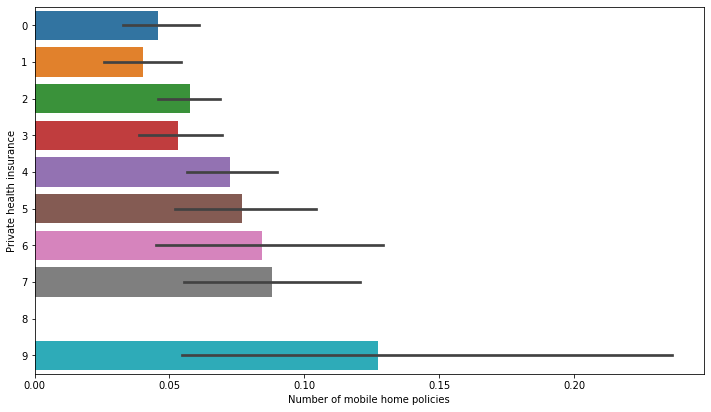

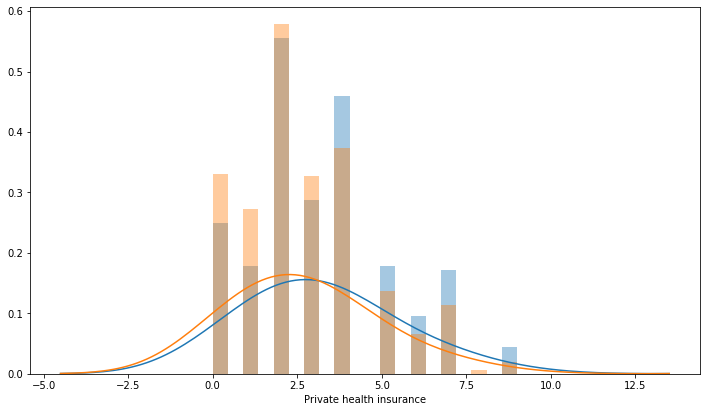

                 Number of mobile home policies
Income < 30.000                                
0                                        0.0752
1                                        0.0857
2                                        0.0832
3                                        0.0463
4                                        0.0351
5                                        0.0299
6                                        0.0307
7                                        0.0449
8                                        0.0208
9                                        0.0000


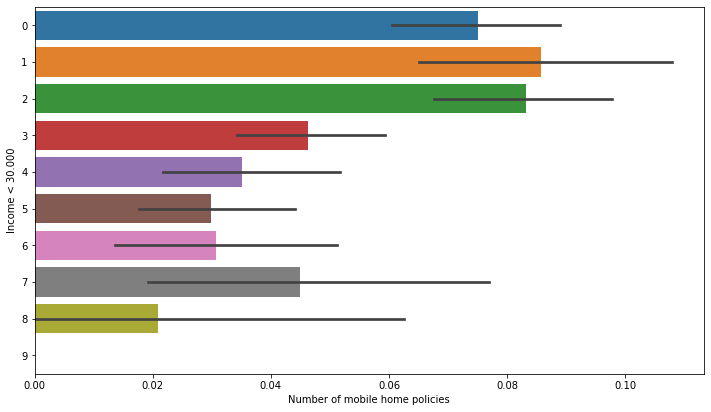

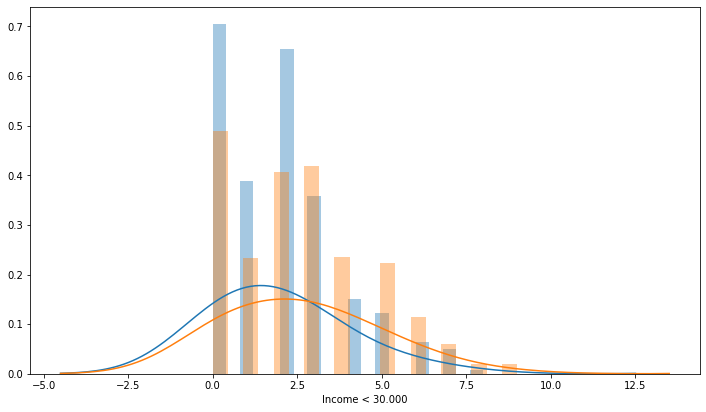

                  Number of mobile home policies
Income 30-45.000                                
0                                         0.0559
1                                         0.0672
2                                         0.0598
3                                         0.0645
4                                         0.0619
5                                         0.0483
6                                         0.0616
7                                         0.0488
8                                         0.0571
9                                         0.1000


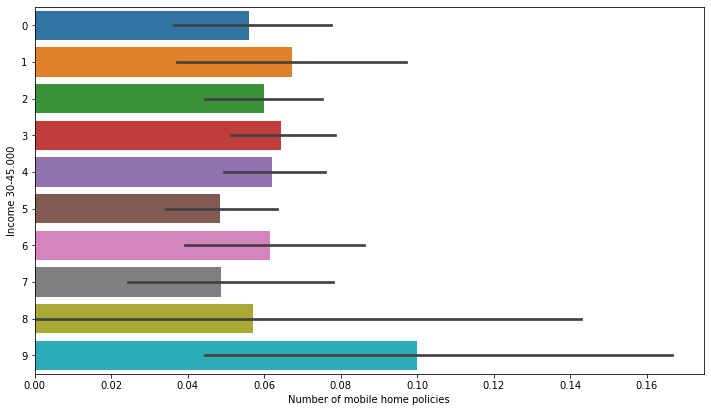

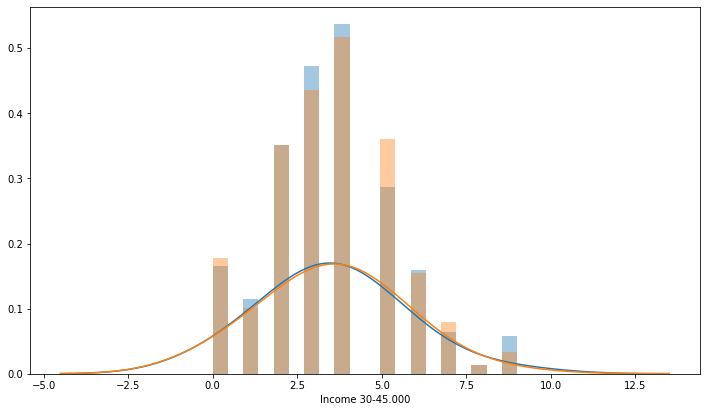

                  Number of mobile home policies
Income 45-75.000                                
0                                         0.0426
1                                         0.0365
2                                         0.0412
3                                         0.0691
4                                         0.0851
5                                         0.0823
6                                         0.0880
7                                         0.0753
8                                         0.0566
9                                         0.0440


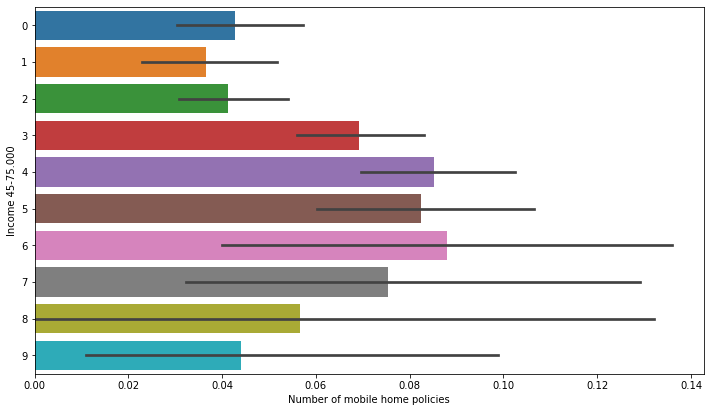

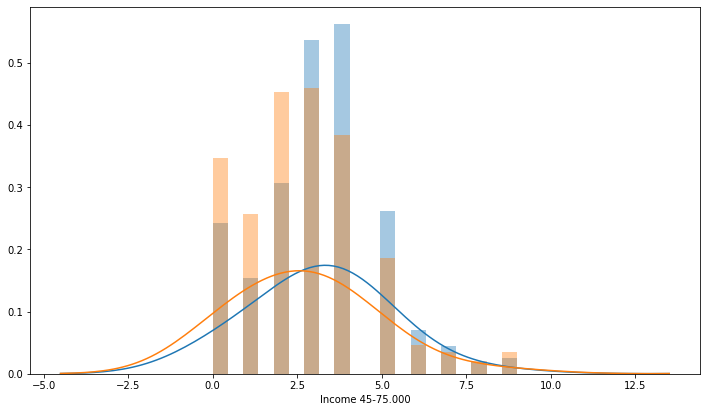

                   Number of mobile home policies
Income 75-122.000                                
0                                          0.0468
1                                          0.0714
2                                          0.0788
3                                          0.0772
4                                          0.0952
5                                          0.0986
6                                          0.0000
7                                          0.0000
8                                          0.0000
9                                          0.2500


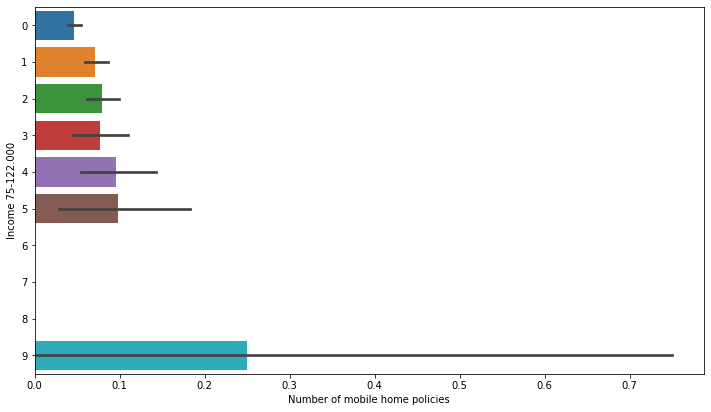

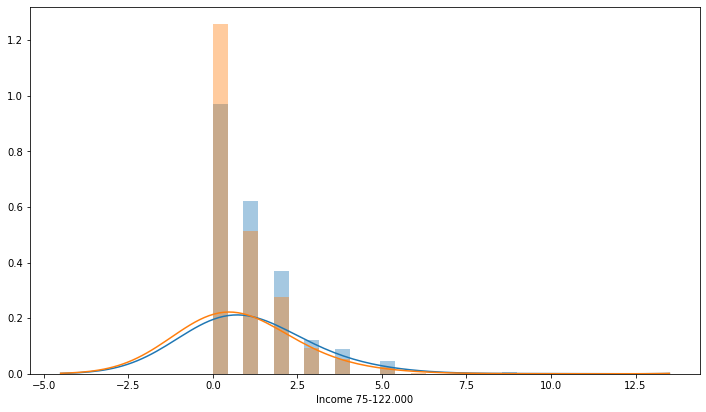

                 Number of mobile home policies
Income >123.000                                
0                                        0.0590
1                                        0.0655
2                                        0.0833
3                                        0.0278
4                                        0.0000
5                                        0.0000
7                                        0.0000
9                                        0.0000


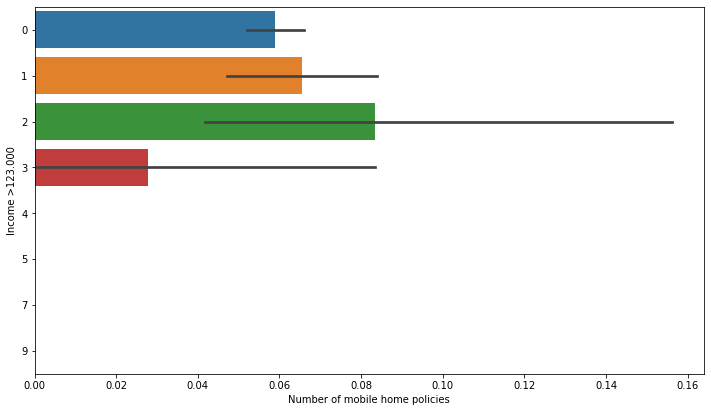

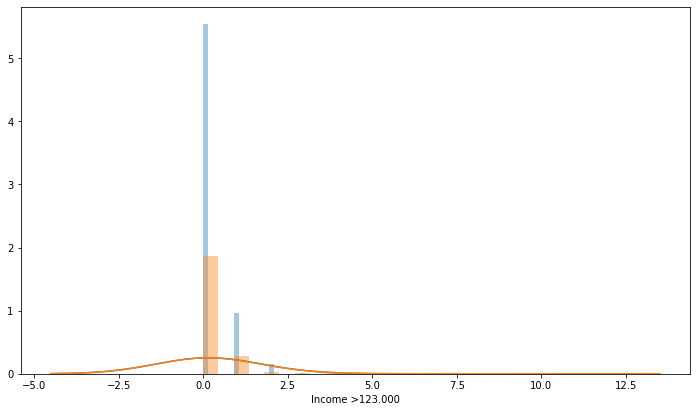

                Number of mobile home policies
Average income                                
0                                       0.0000
1                                       0.0204
2                                       0.0307
3                                       0.0357
4                                       0.0750
5                                       0.0955
6                                       0.0676
7                                       0.1298
8                                       0.1143
9                                       0.0000


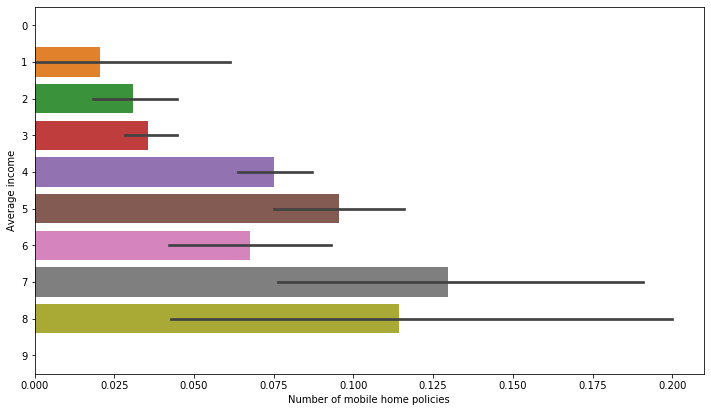

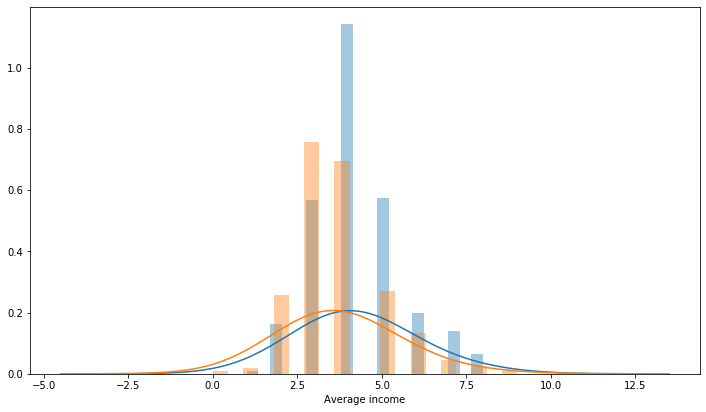

                        Number of mobile home policies
Purchasing power class                                
1                                               0.0307
2                                               0.0353
3                                               0.0466
4                                               0.0510
5                                               0.0515
6                                               0.0733
7                                               0.1414
8                                               0.0822


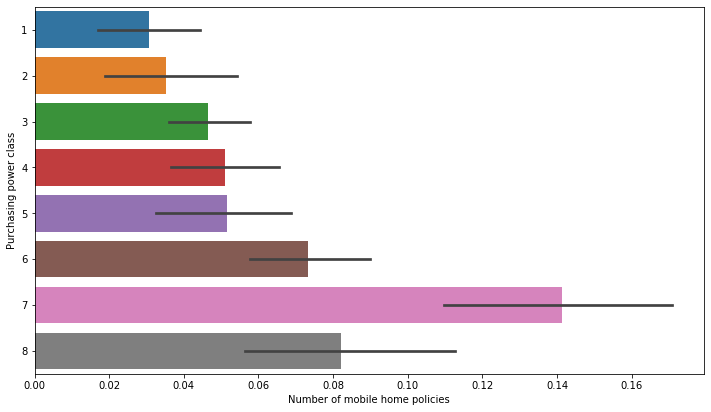

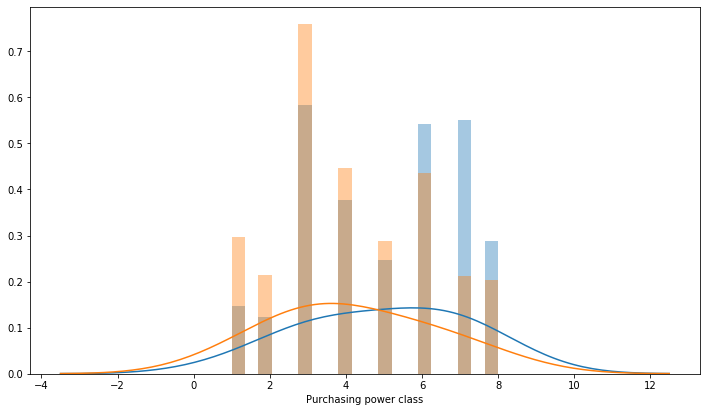

                                            Number of mobile home policies
Contribution private third party insurance                                
0                                                                   0.0422
1                                                                   0.0398
2                                                                   0.0898
3                                                                   0.1818


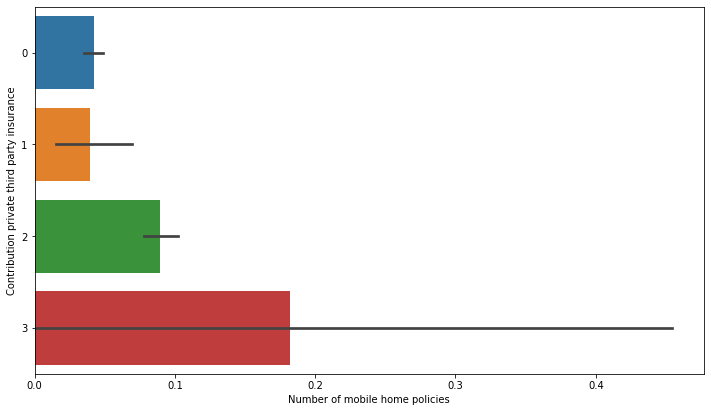

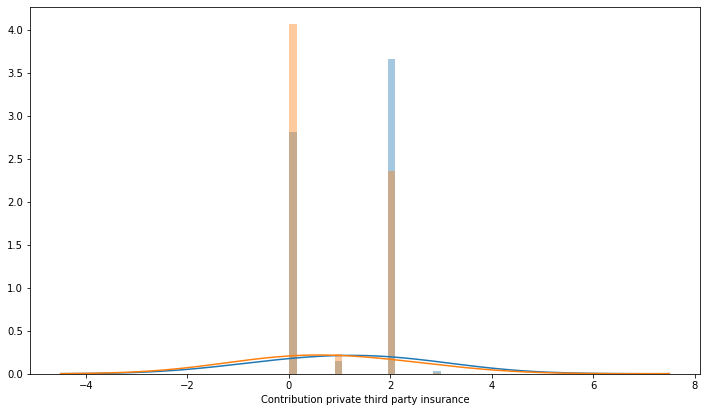

                                            Number of mobile home policies
Contribution third party insurance (firms)                                
0                                                                   0.0598
1                                                                   0.0000
2                                                                   0.0667
3                                                                   0.1304
4                                                                   0.0000
5                                                                   0.0000
6                                                                   0.0000


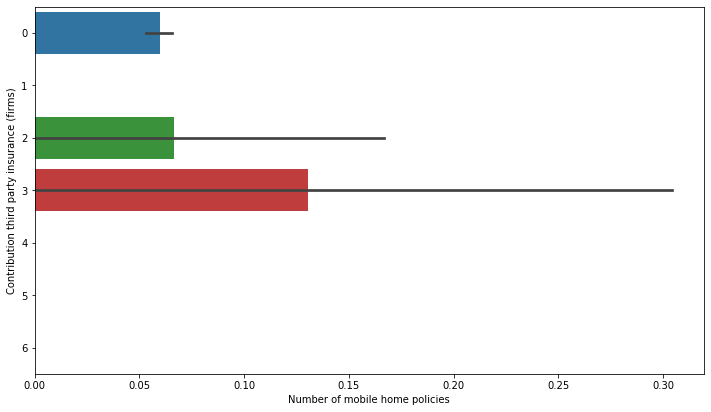

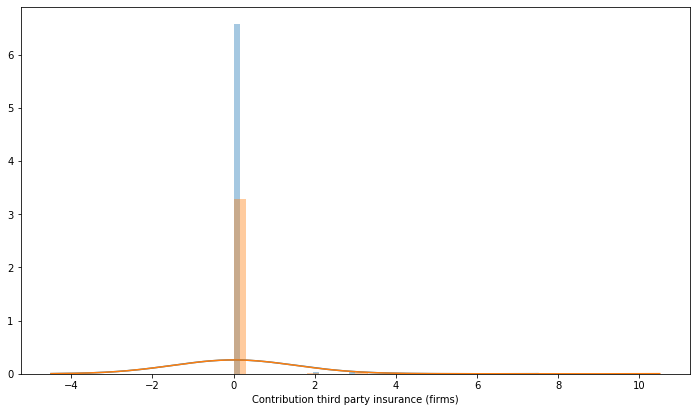

                                                 Number of mobile home policies
Contribution third party insurane (agriculture)                                
0                                                                        0.0605
2                                                                        0.0000
3                                                                        0.0351
4                                                                        0.0167


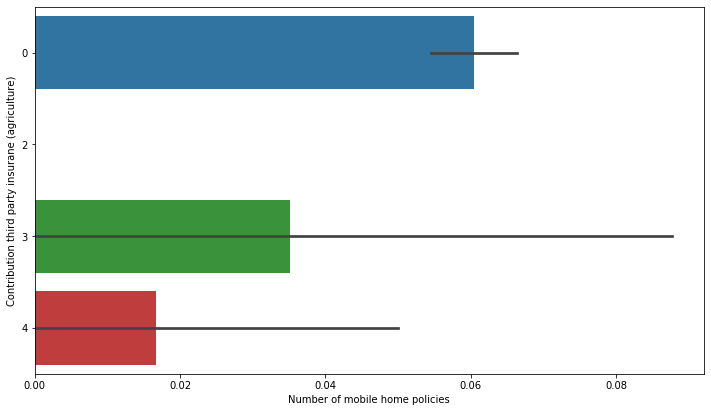

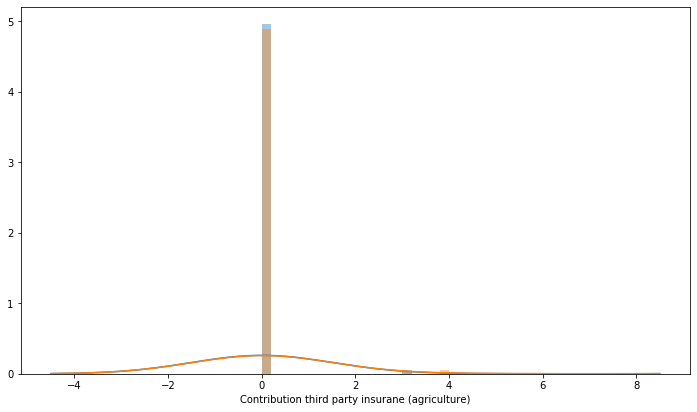

                           Number of mobile home policies
Contribution car policies                                
0                                                  0.0253
4                                                  0.0000
5                                                  0.0228
6                                                  0.1130
7                                                  0.0000
8                                                  0.0000


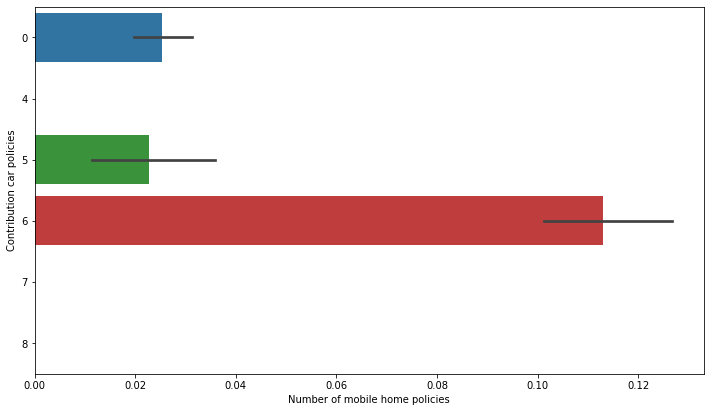

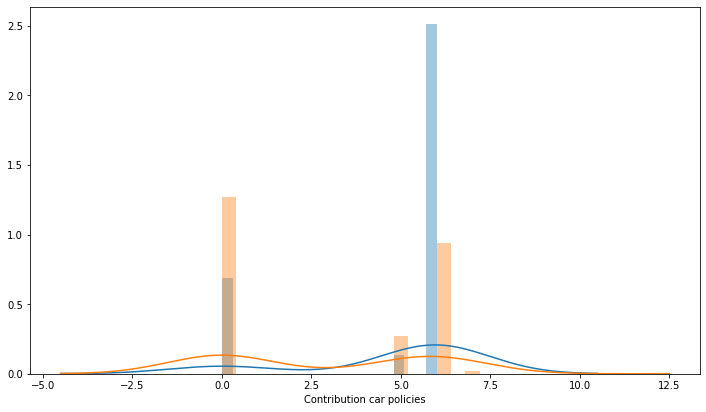

                                    Number of mobile home policies
Contribution delivery van policies                                
0                                                           0.0599
5                                                           0.0000
6                                                           0.0571
7                                                           0.0000


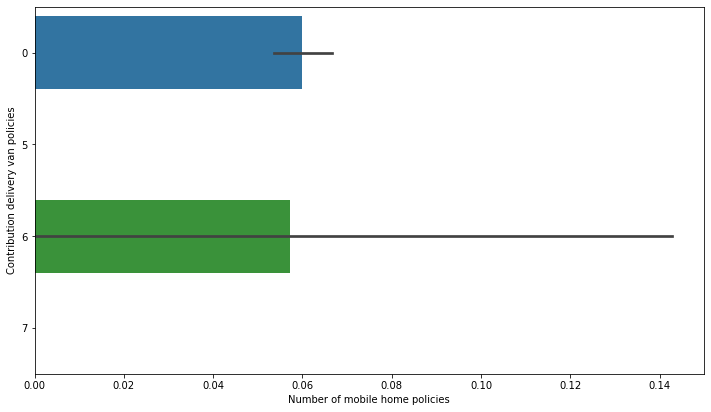

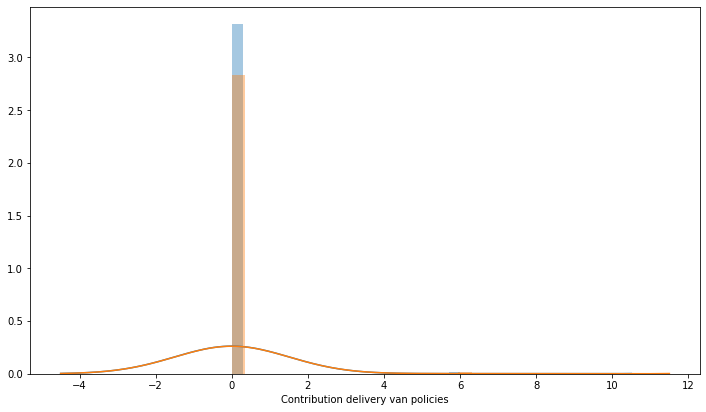

                                          Number of mobile home policies
Contribution motorcycle/scooter policies                                
0                                                                 0.0593
3                                                                 0.6667
4                                                                 0.0662
5                                                                 0.1250
6                                                                 0.0204
7                                                                 0.0000


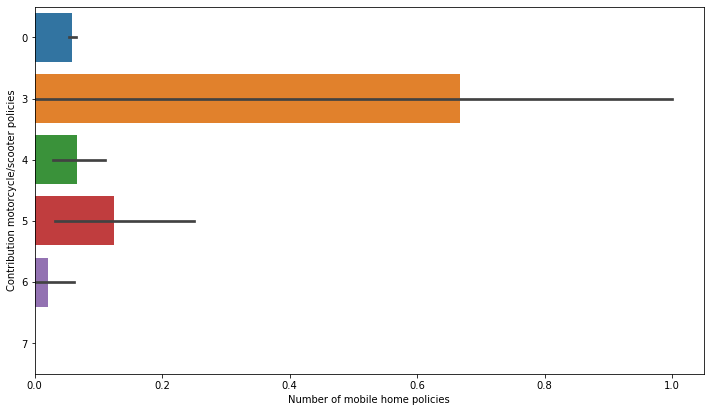

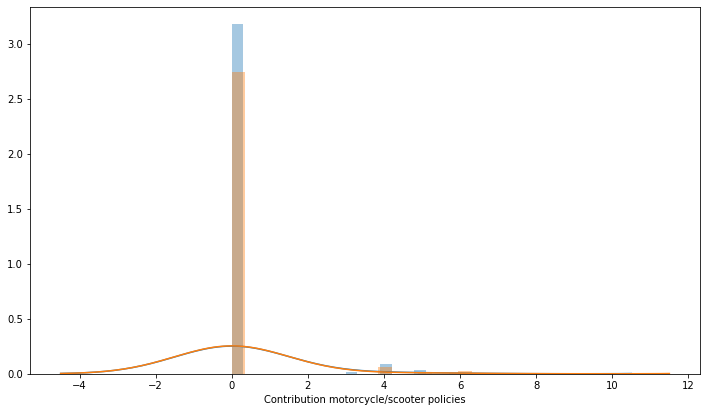

                             Number of mobile home policies
Contribution lorry policies                                
0                                                    0.0599
4                                                    0.0000
6                                                    0.0000
9                                                    0.0000


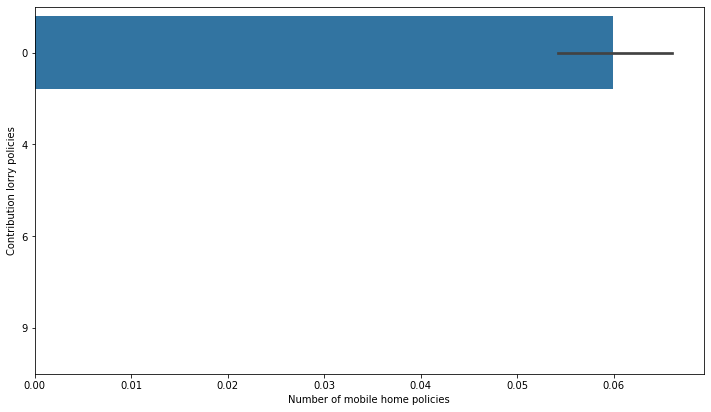

C:\Users\lcd54\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


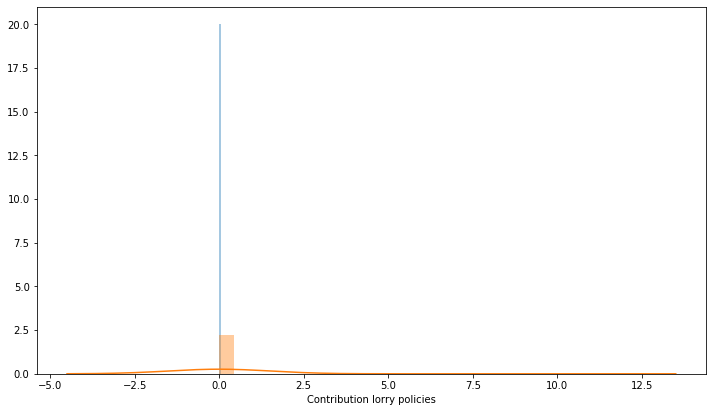

                               Number of mobile home policies
Contribution trailer policies                                
0                                                      0.0594
1                                                      0.0526
2                                                      0.1316
3                                                      0.0000
4                                                      0.0000
5                                                      0.0000


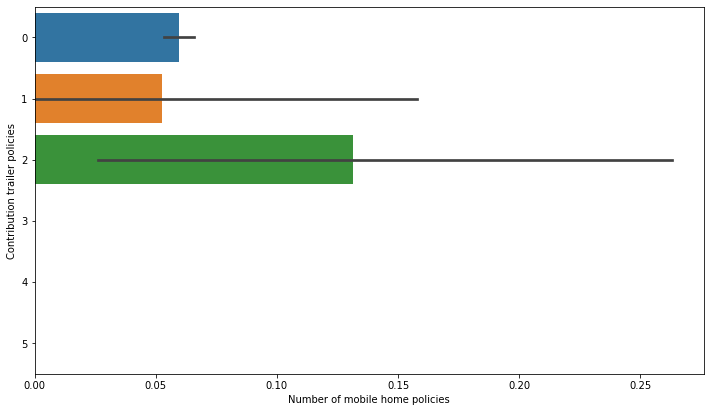

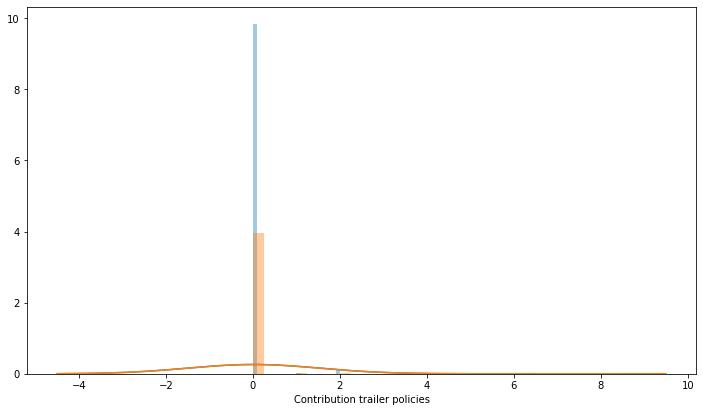

                               Number of mobile home policies
Contribution tractor policies                                
0                                                      0.0604
3                                                      0.0253
4                                                      0.0000
5                                                      0.0714
6                                                      0.1111


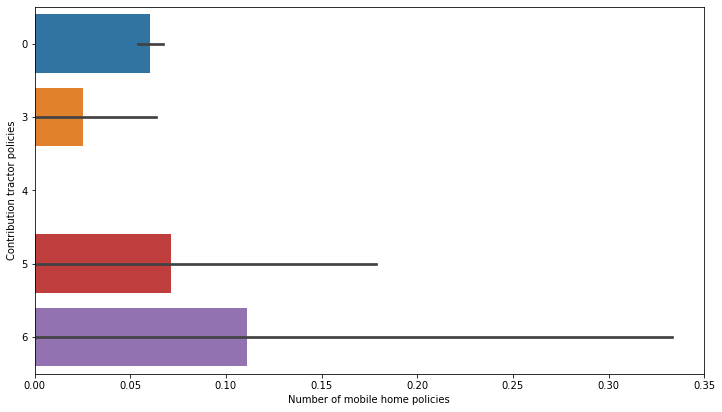

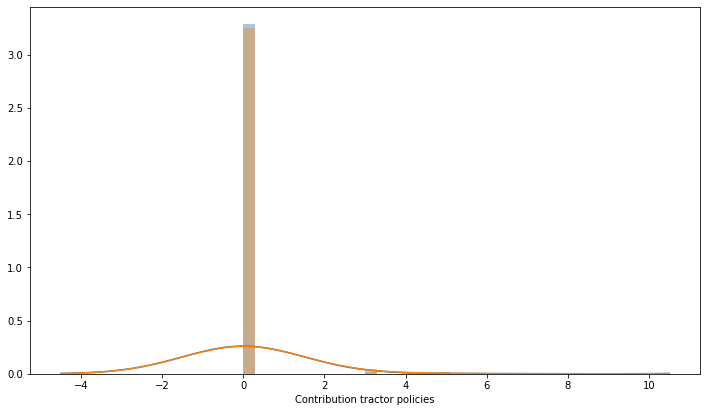

                                             Number of mobile home policies
Contribution agricultural machines policies                                
0                                                                      0.06
2                                                                      0.00
3                                                                      0.00
4                                                                      0.00
6                                                                      0.00


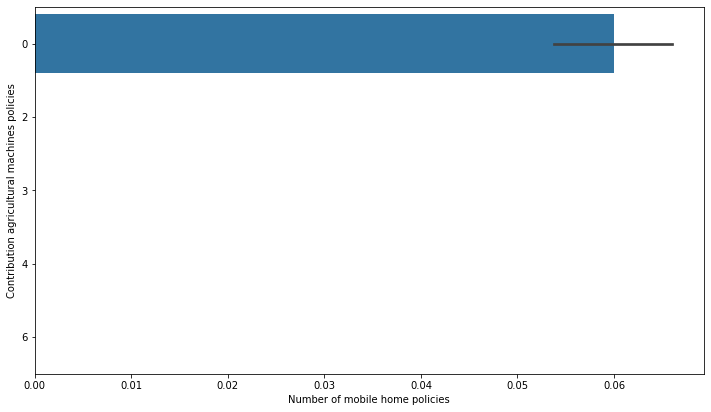

C:\Users\lcd54\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


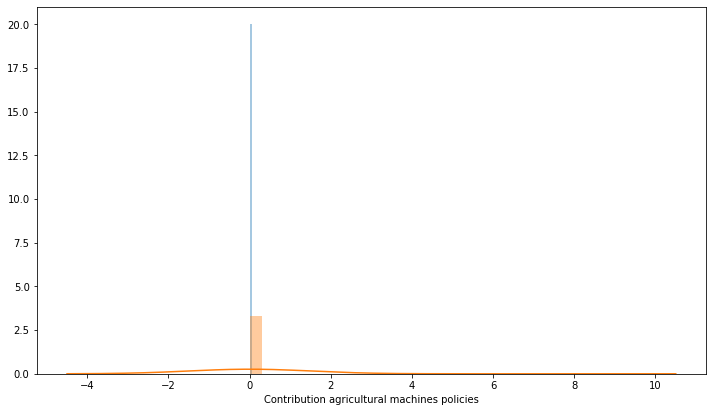

                             Number of mobile home policies
Contribution moped policies                                
0                                                    0.0627
2                                                    0.0294
3                                                    0.0213
4                                                    0.0000
5                                                    0.0625
6                                                    0.0000


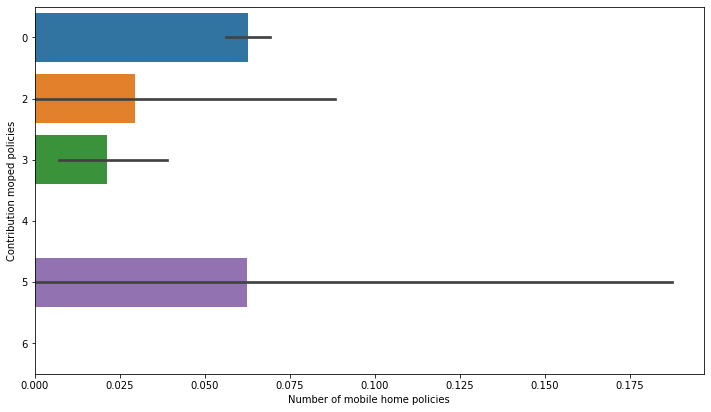

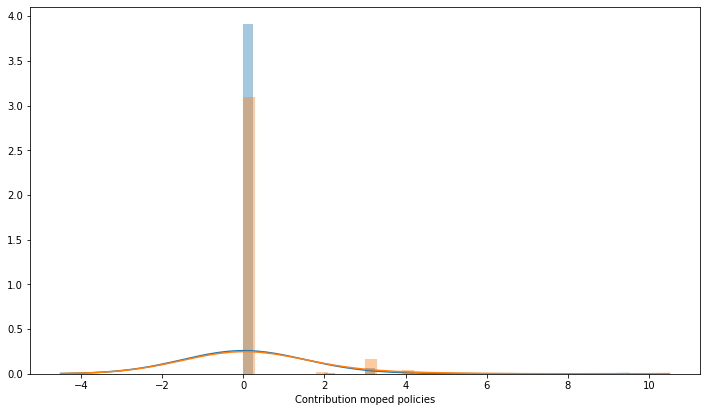

                              Number of mobile home policies
Contribution life insurances                                
0                                                     0.0588
1                                                     0.0000
2                                                     0.0000
3                                                     0.0714
4                                                     0.1170
5                                                     0.1143
6                                                     0.0526
7                                                     0.0000
8                                                     0.0000
9                                                     0.0000


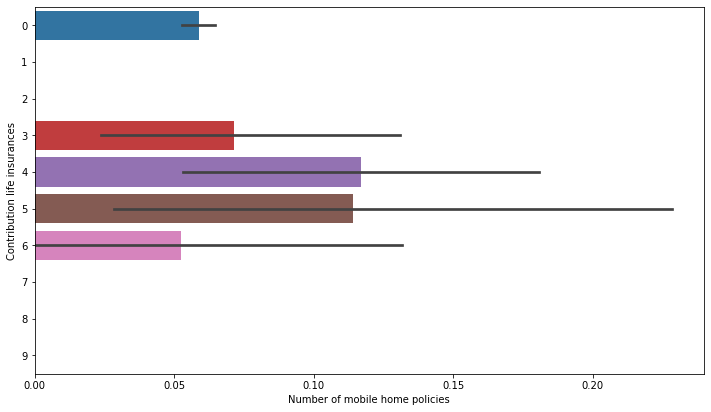

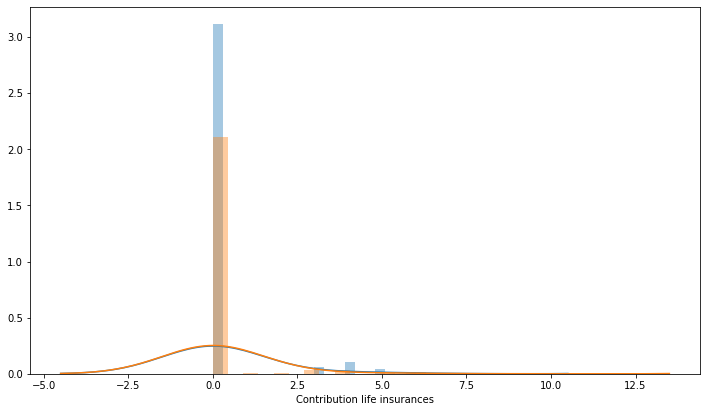

                                                  Number of mobile home policies
Contribution private accident insurance policies                                
0                                                                         0.0599
1                                                                         0.0000
2                                                                         0.0556
3                                                                         0.0000
4                                                                         0.0000
5                                                                         0.0000
6                                                                         0.0000


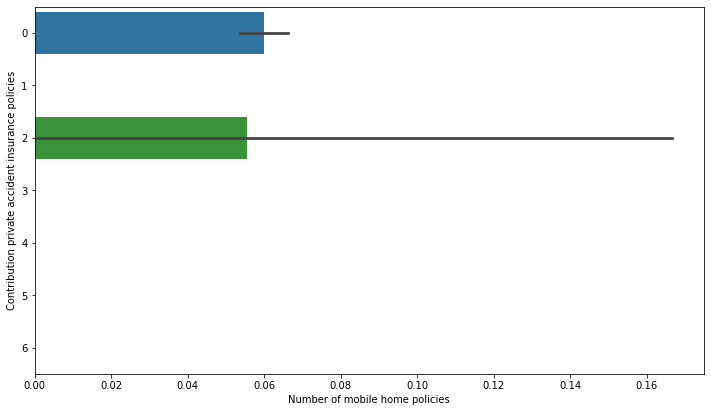

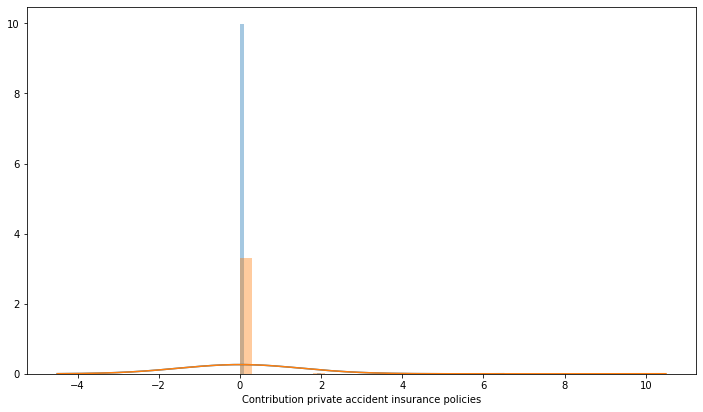

                                                  Number of mobile home policies
Contribution family accidents insurance policies                                
0                                                                         0.0591
2                                                                         0.0800
3                                                                         0.3077


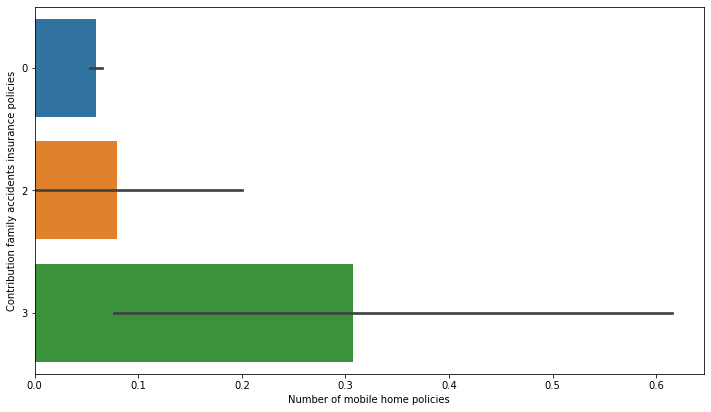

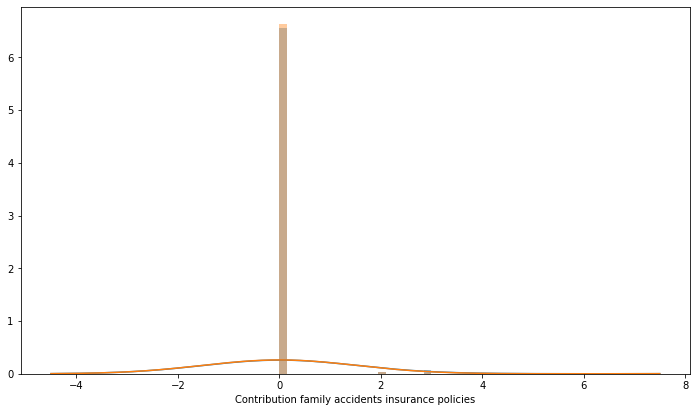

                                            Number of mobile home policies
Contribution disability insurance policies                                
0                                                                   0.0593
4                                                                   0.0000
5                                                                   0.0000
6                                                                   0.2105
7                                                                   0.0000


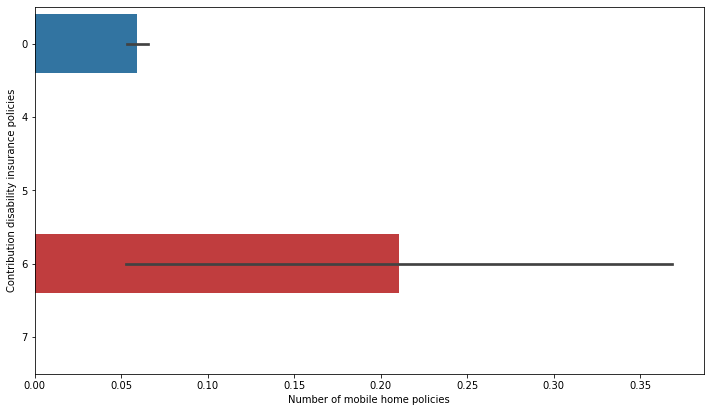

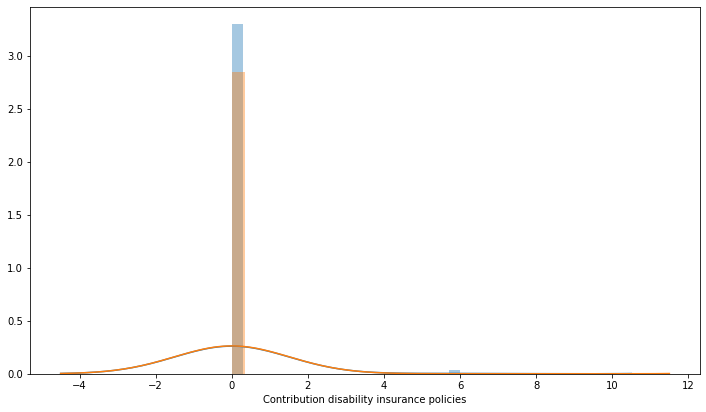

                            Number of mobile home policies
Contribution fire policies                                
0                                                   0.0409
1                                                   0.0186
2                                                   0.0112
3                                                   0.0739
4                                                   0.1232
5                                                   0.0537
6                                                   0.0194
7                                                   0.0000
8                                                   0.0000


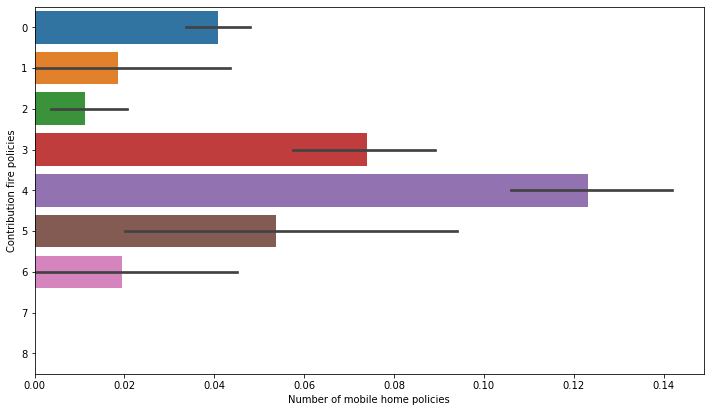

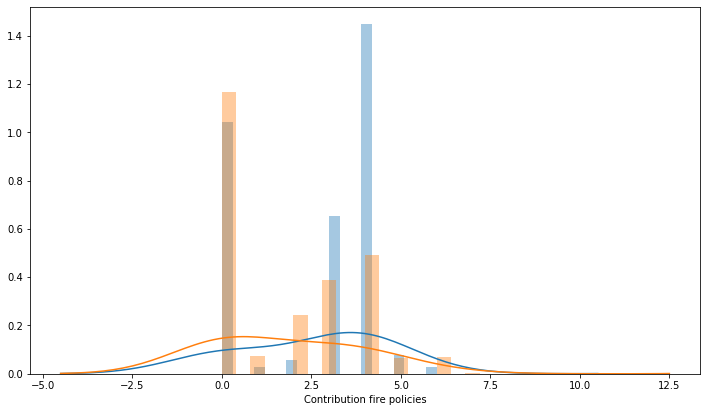

                                 Number of mobile home policies
Contribution surfboard policies                                
0                                                        0.0596
1                                                        0.5000
3                                                        0.0000


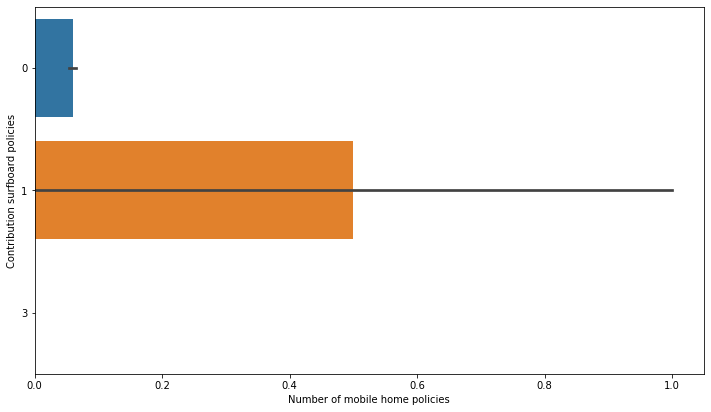

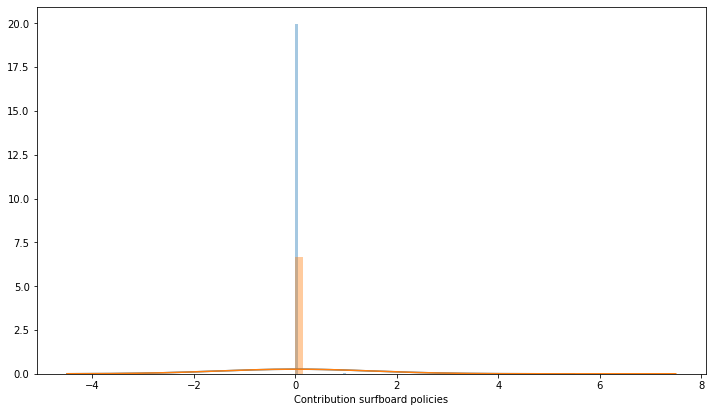

                            Number of mobile home policies
Contribution boat policies                                
0                                                   0.0579
1                                                   0.6000
2                                                   0.4000
3                                                   0.4000
4                                                   0.3077
5                                                   0.0000
6                                                   0.6667


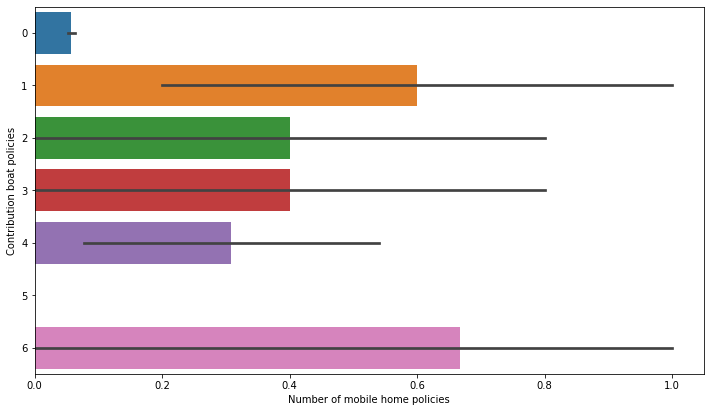

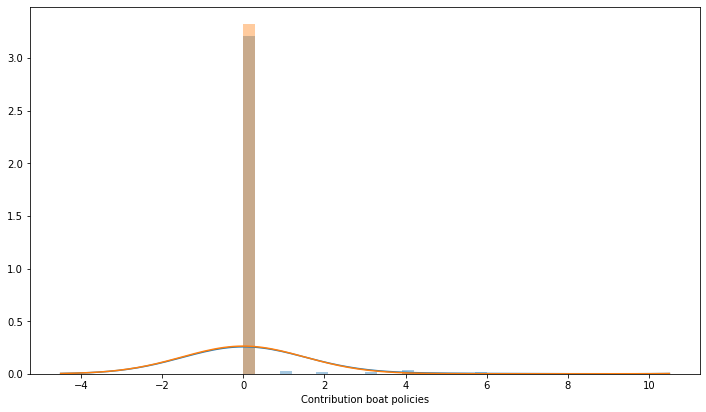

                               Number of mobile home policies
Contribution bicycle policies                                
0                                                      0.0587
1                                                      0.1020


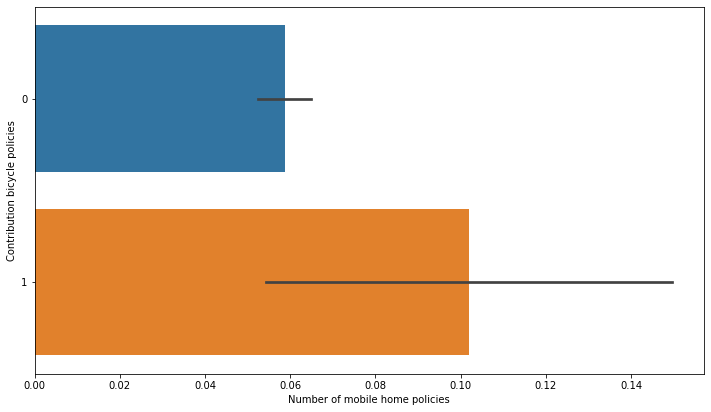

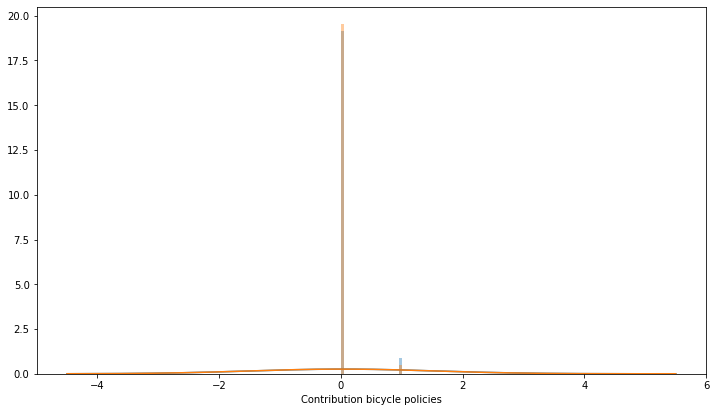

                                          Number of mobile home policies
Contribution property insurance policies                                
0                                                                 0.0594
1                                                                 0.1667
2                                                                 0.1250
3                                                                 0.0000
4                                                                 0.0000
5                                                                 0.0000
6                                                                 0.0000


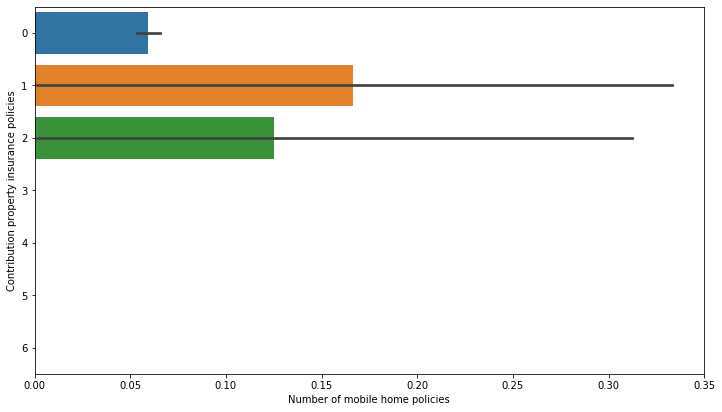

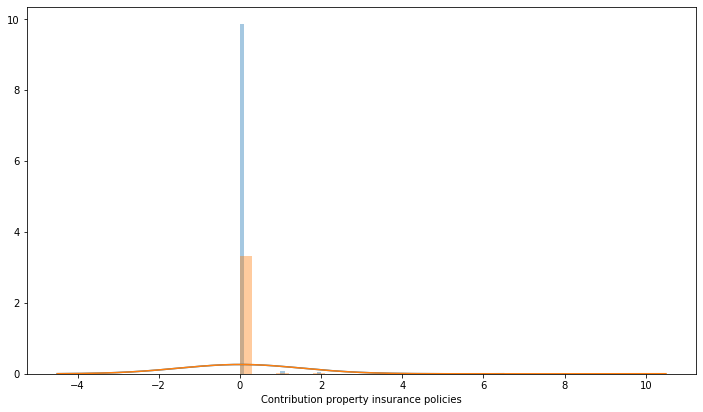

                                                 Number of mobile home policies
Contribution social security insurance policies                                
0                                                                        0.0578
2                                                                        0.2667
3                                                                        0.1818
4                                                                        0.1818
5                                                                        0.0000


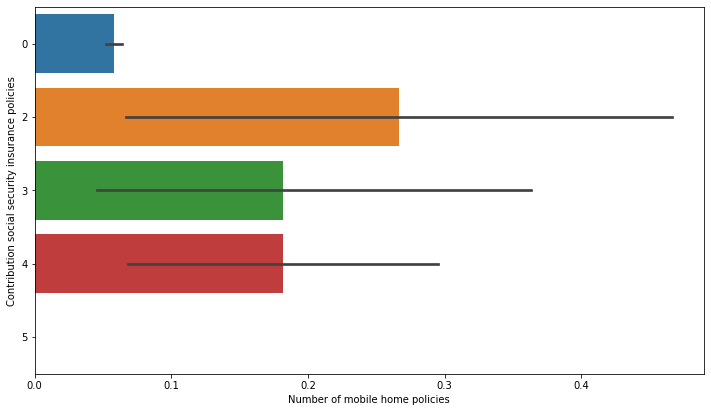

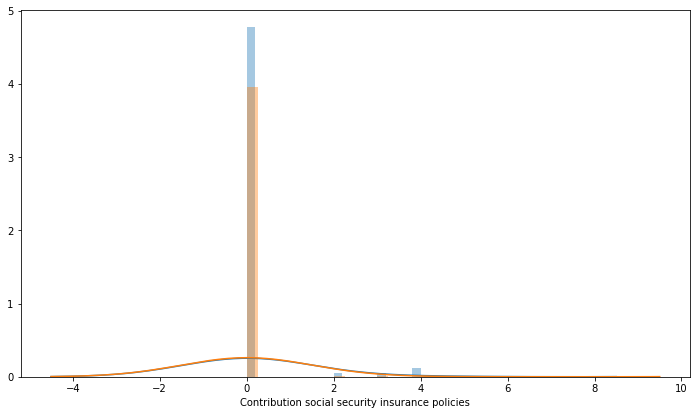

                                         Number of mobile home policies
Number of private third party insurance                                
0                                                                0.0422
1                                                                0.0861
2                                                                0.0000


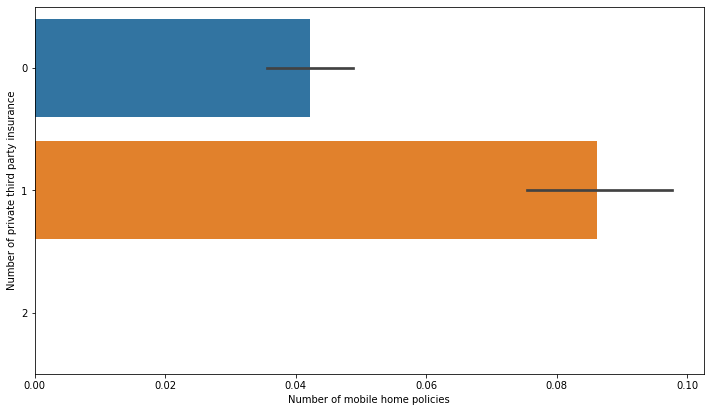

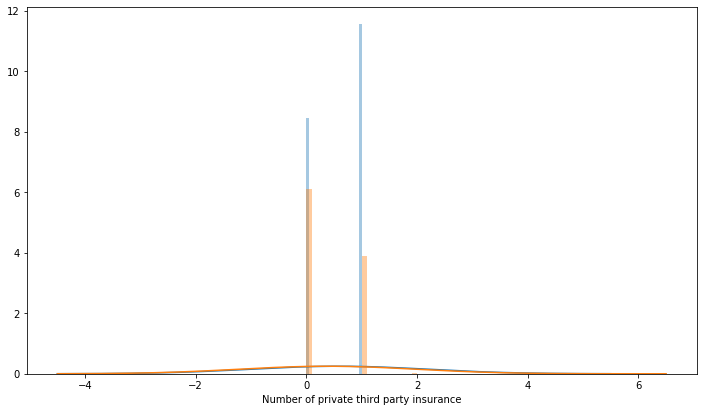

                                         Number of mobile home policies
Number of third party insurance (firms)                                
0                                                                0.0598
1                                                                0.0617
5                                                                0.0000


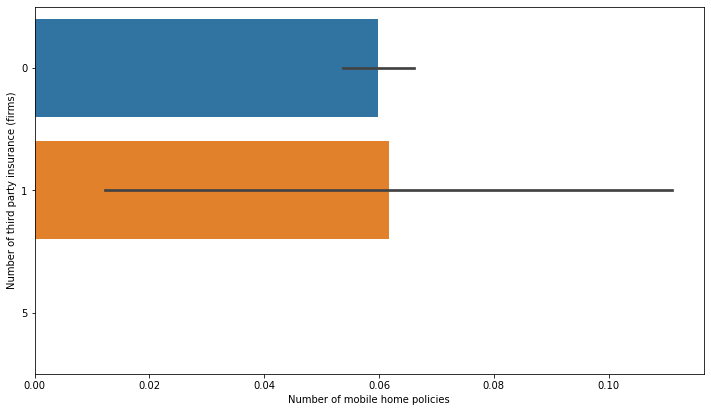

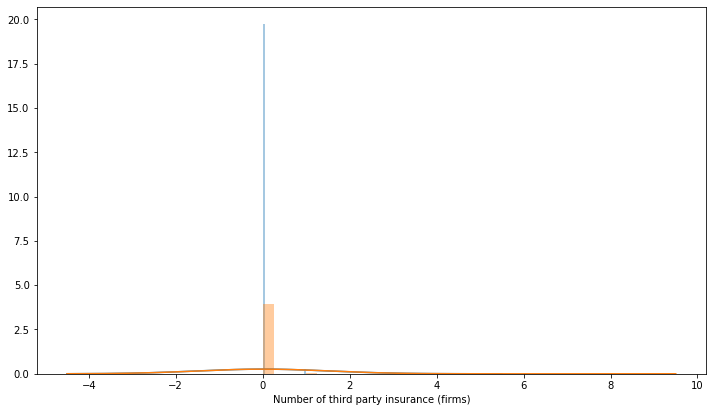

                                               Number of mobile home policies
Number of third party insurance (agriculture)                                
0                                                                      0.0605
1                                                                      0.0250


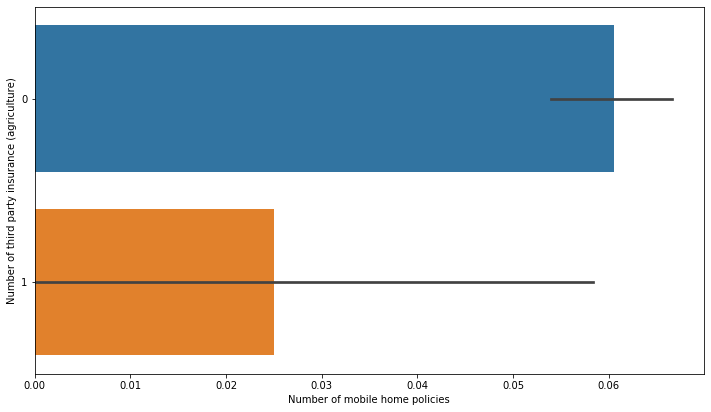

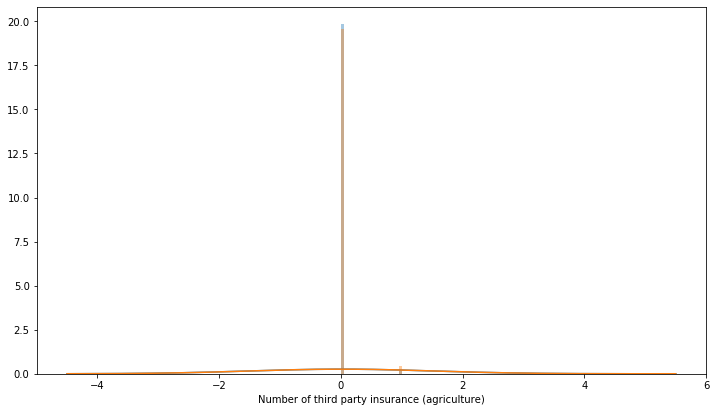

                        Number of mobile home policies
Number of car policies                                
0                                               0.0253
1                                               0.0874
2                                               0.1545
3                                               0.0833
4                                               0.0000
6                                               0.0000
7                                               0.0000


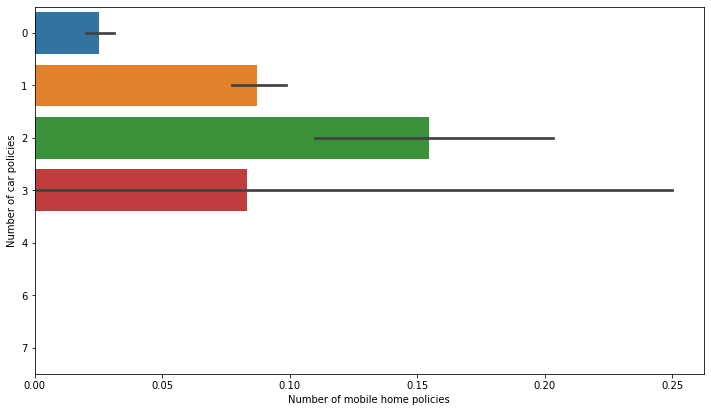

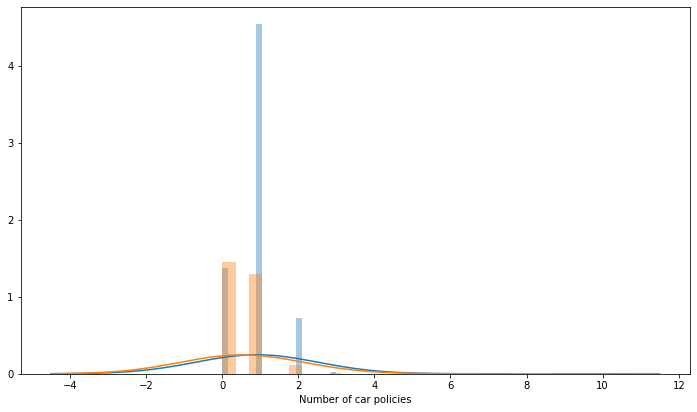

                                 Number of mobile home policies
Number of delivery van policies                                
0                                                        0.0599
1                                                        0.0500
2                                                        0.0000
3                                                        0.0000
4                                                        0.0000


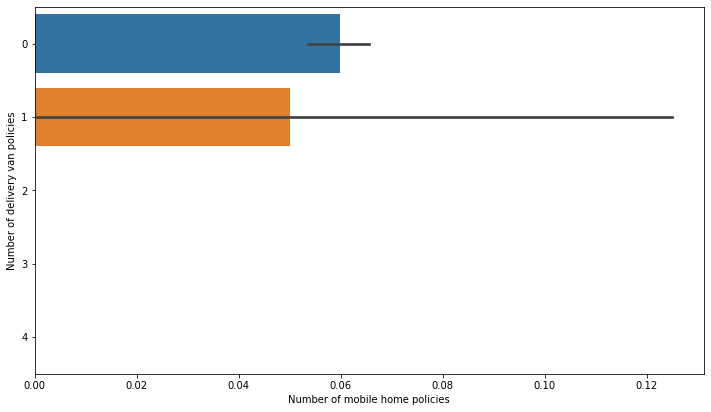

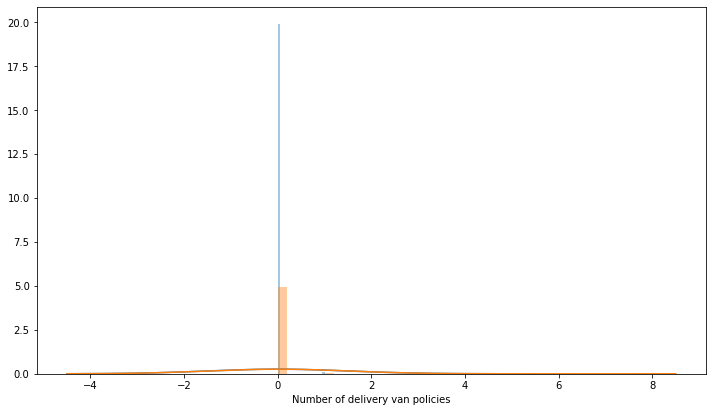

                                       Number of mobile home policies
Number of motorcycle/scooter policies                                
0                                                              0.0593
1                                                              0.0711
2                                                              0.1000
8                                                              0.0000


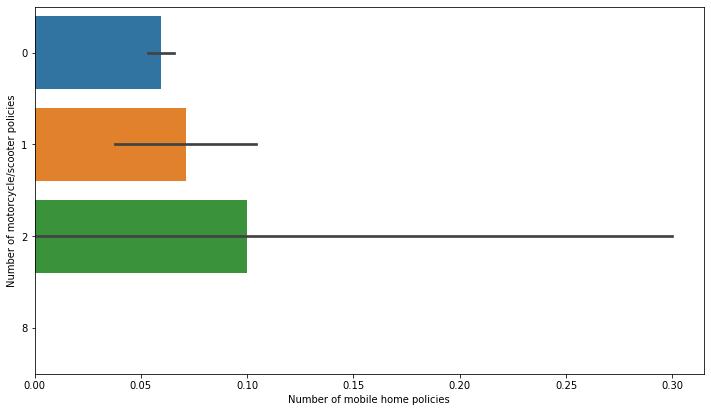

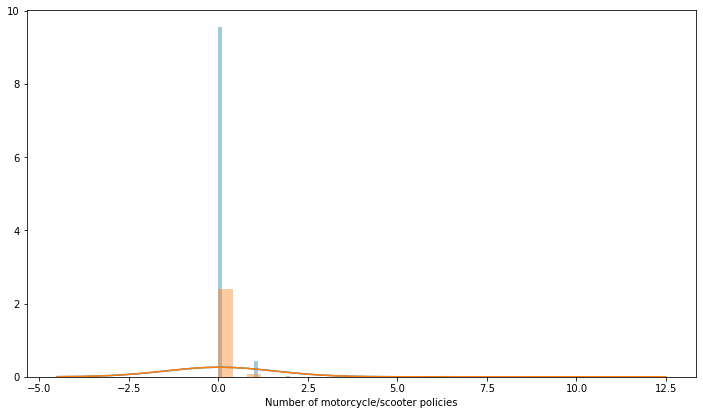

                          Number of mobile home policies
Number of lorry policies                                
0                                                 0.0599
1                                                 0.0000
2                                                 0.0000
3                                                 0.0000


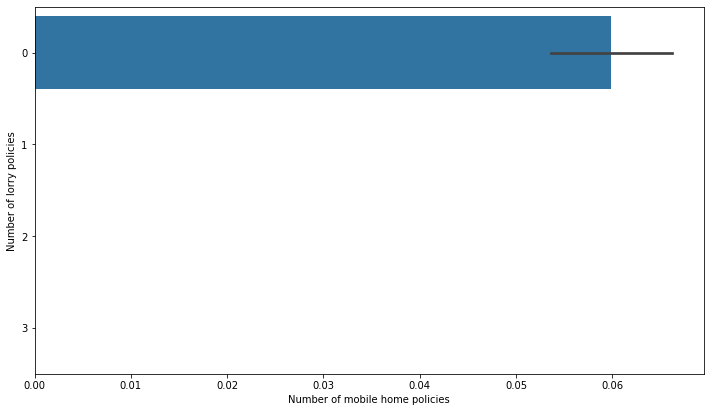

C:\Users\lcd54\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


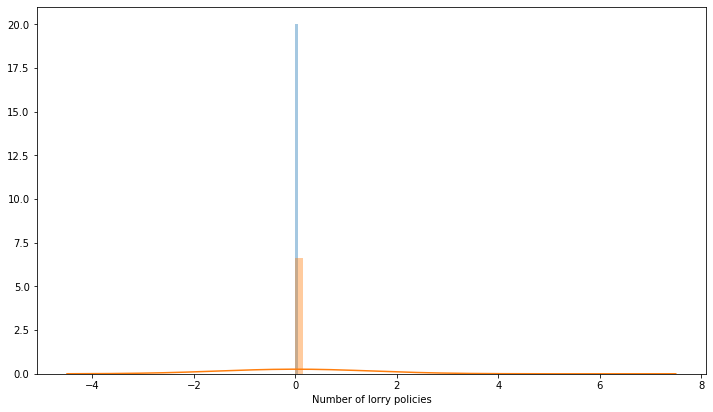

                            Number of mobile home policies
Number of trailer policies                                
0                                                   0.0594
1                                                   0.1017
2                                                   0.0000
3                                                   0.0000


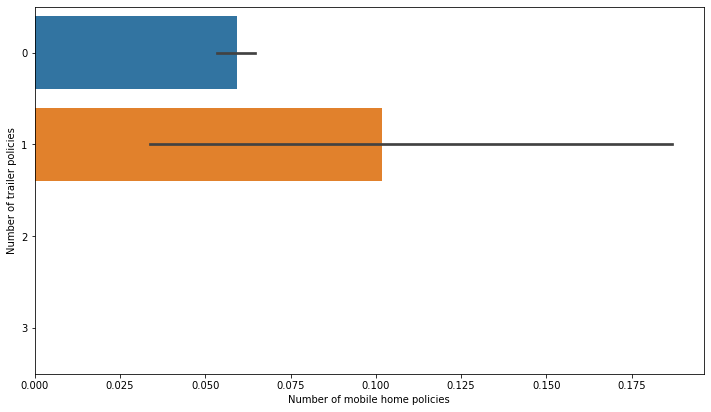

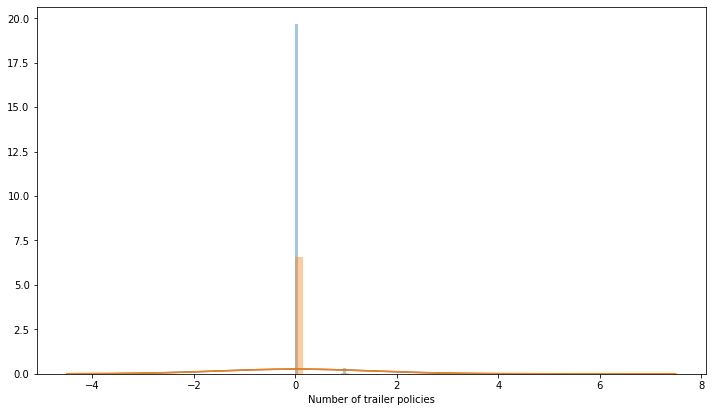

                            Number of mobile home policies
Number of tractor policies                                
0                                                   0.0604
1                                                   0.0381
2                                                   0.0345
3                                                   0.0000
4                                                   0.0000


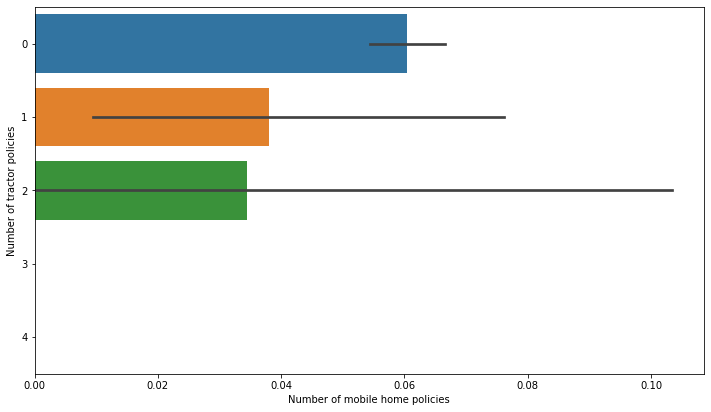

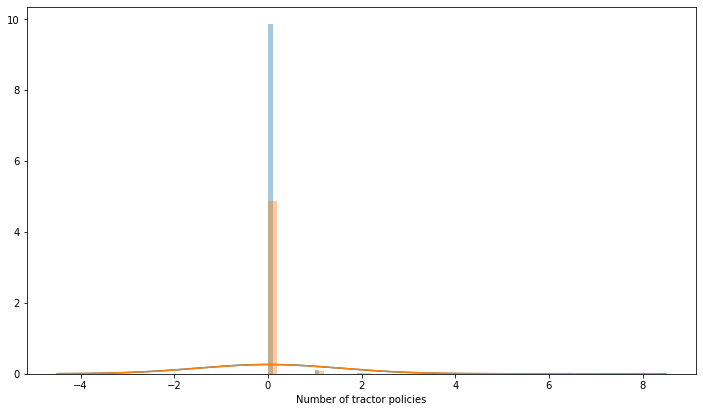

                                          Number of mobile home policies
Number of agricultural machines policies                                
0                                                                   0.06
1                                                                   0.00
2                                                                   0.00
3                                                                   0.00
6                                                                   0.00


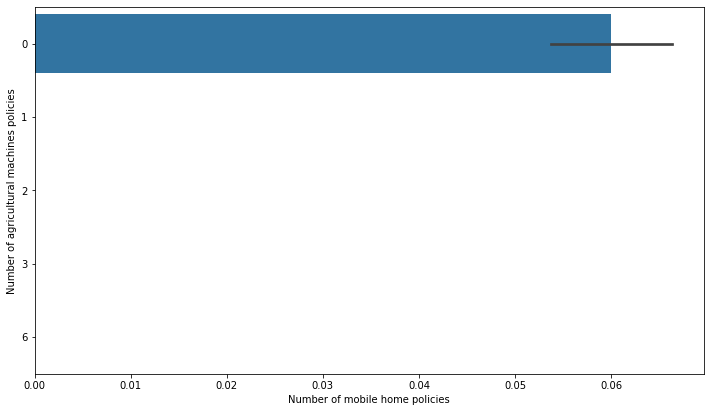

C:\Users\lcd54\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


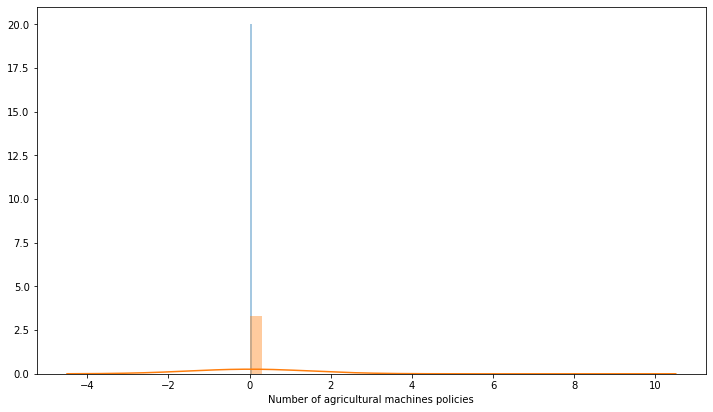

                          Number of mobile home policies
Number of moped policies                                
0                                                 0.0627
1                                                 0.0209
2                                                 0.0000


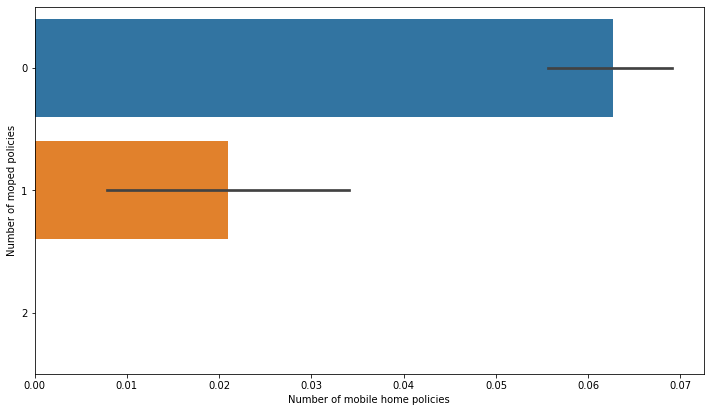

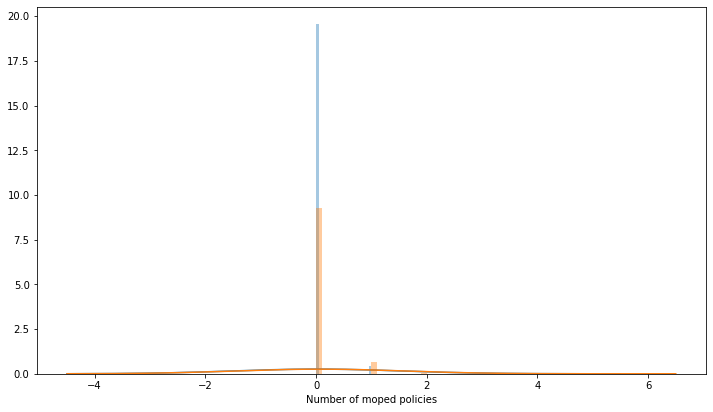

                           Number of mobile home policies
Number of life insurances                                
0                                                  0.0588
1                                                  0.0462
2                                                  0.1000
3                                                  0.1818
4                                                  0.3750
8                                                  0.0000


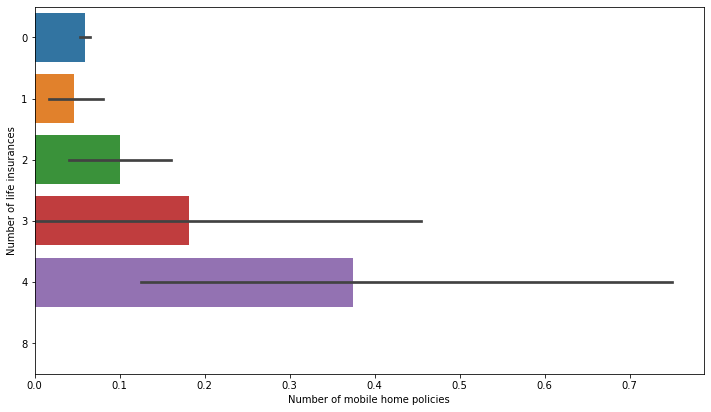

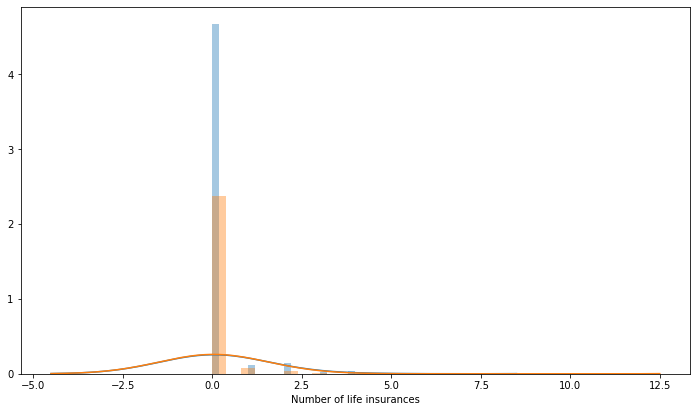

                                               Number of mobile home policies
Number of private accident insurance policies                                
0                                                                      0.0599
1                                                                      0.0323


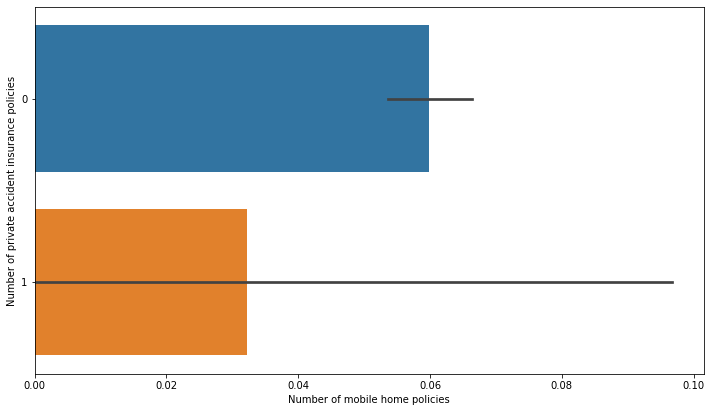

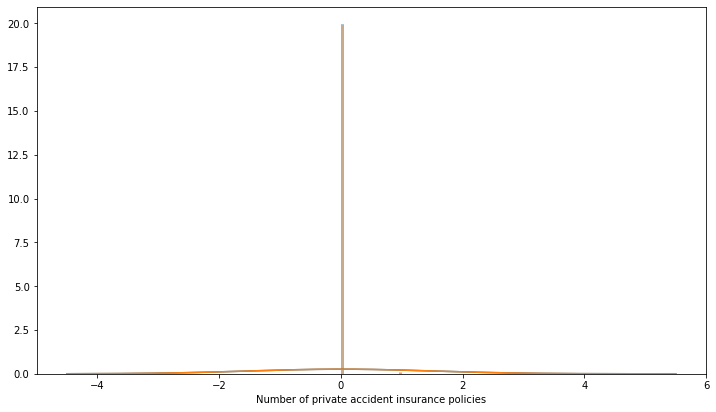

                                               Number of mobile home policies
Number of family accidents insurance policies                                
0                                                                      0.0591
1                                                                      0.1579


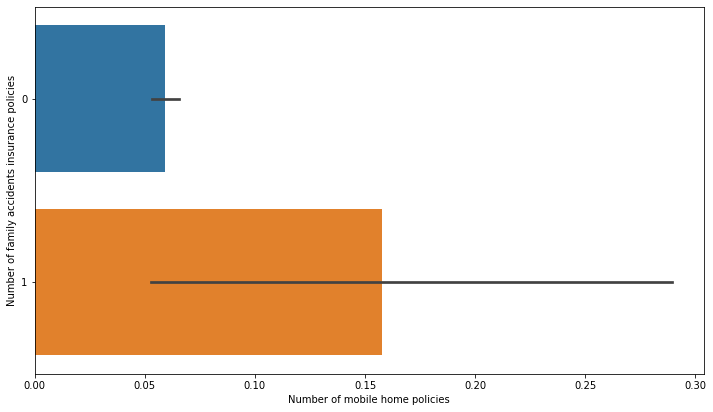

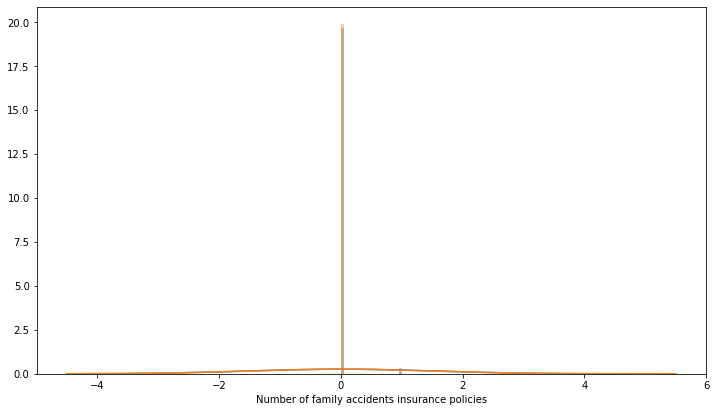

                                         Number of mobile home policies
Number of disability insurance policies                                
0                                                                0.0593
1                                                                0.2105
2                                                                0.0000


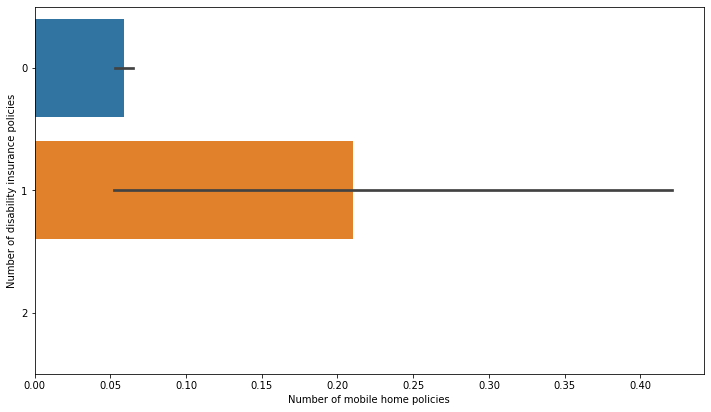

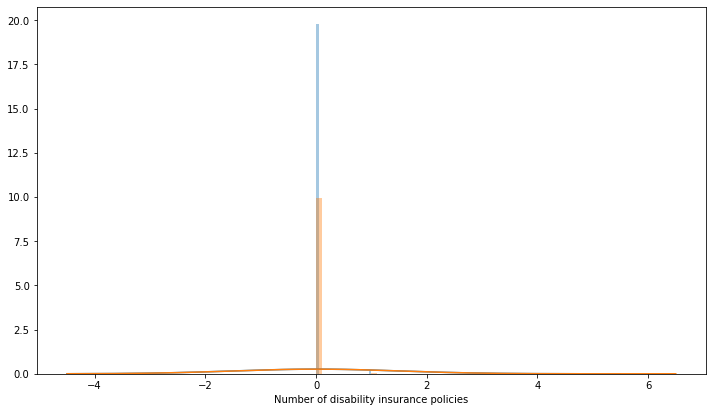

                         Number of mobile home policies
Number of fire policies                                
0                                                0.0409
1                                                0.0769
2                                                0.0556
3                                                0.0000
4                                                0.0000
5                                                0.0000
7                                                0.0000


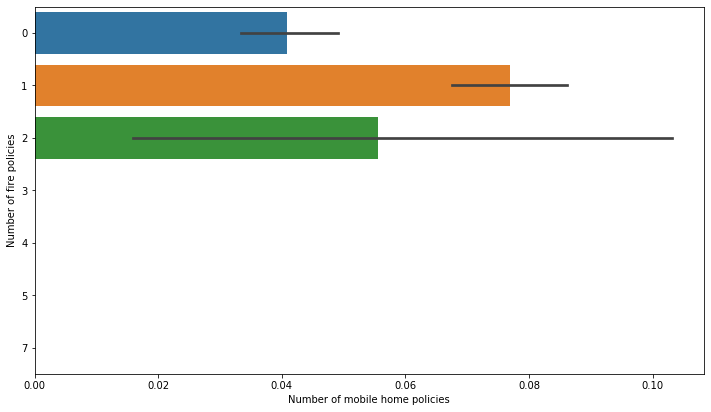

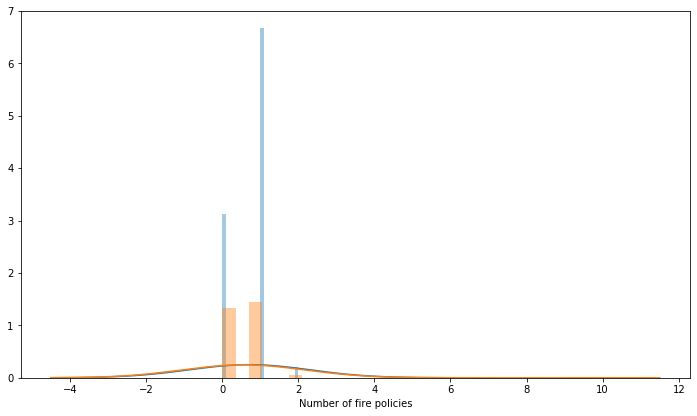

                              Number of mobile home policies
Number of surfboard policies                                
0                                                     0.0596
1                                                     0.3333


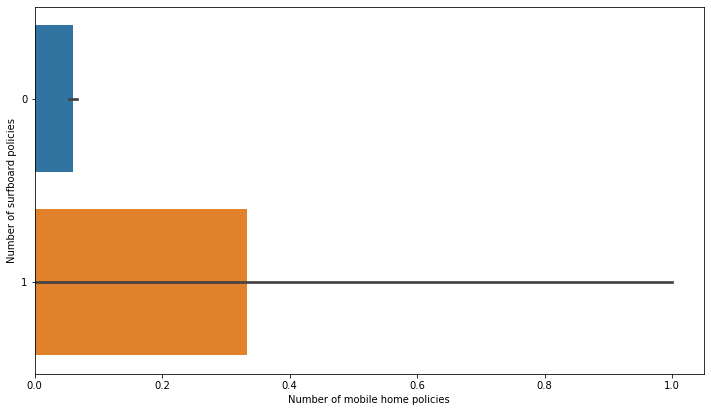

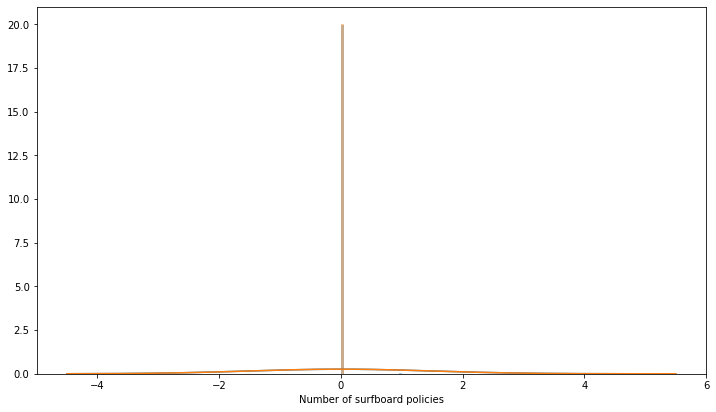

                         Number of mobile home policies
Number of boat policies                                
0                                                0.0579
1                                                0.3871
2                                                0.5000


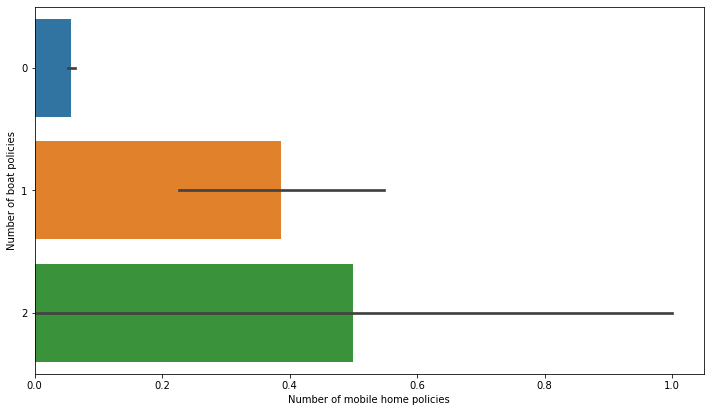

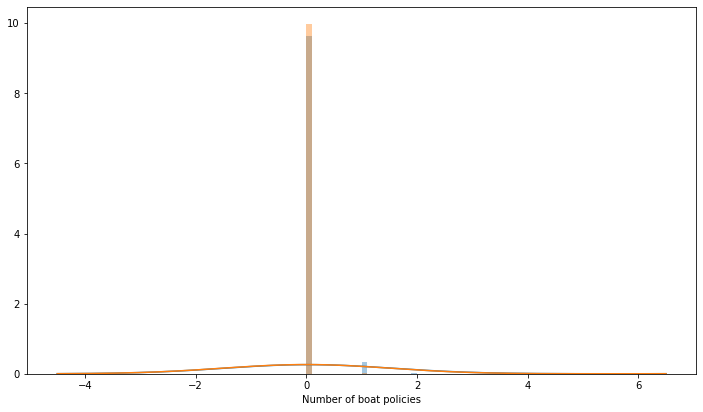

                            Number of mobile home policies
Number of bicycle policies                                
0                                                   0.0587
1                                                   0.0901
2                                                   0.1176
3                                                   0.5000


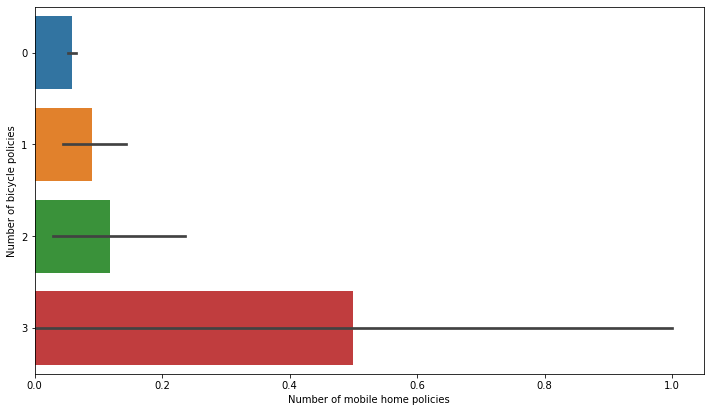

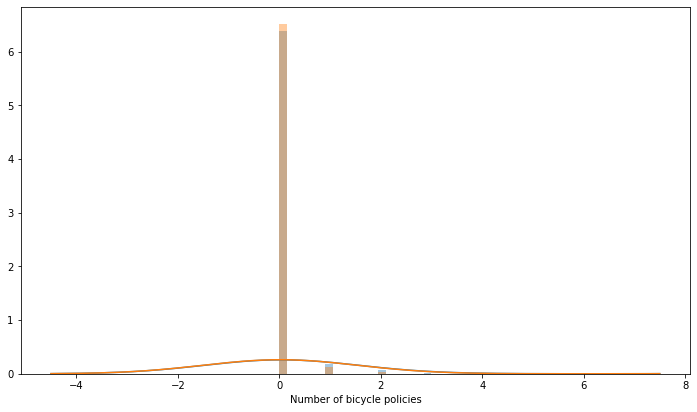

                                       Number of mobile home policies
Number of property insurance policies                                
0                                                              0.0594
1                                                              0.1136
2                                                              0.0000


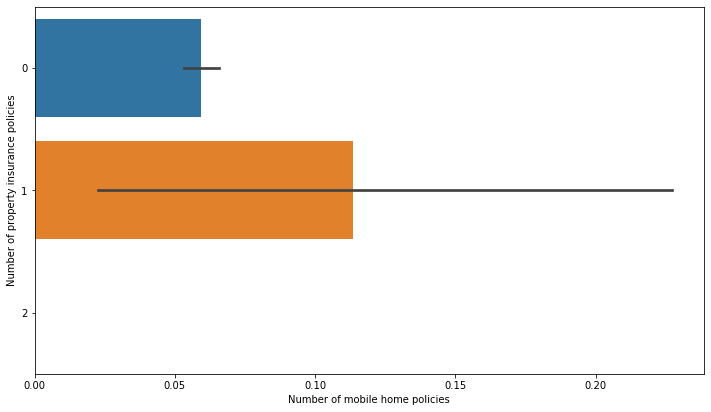

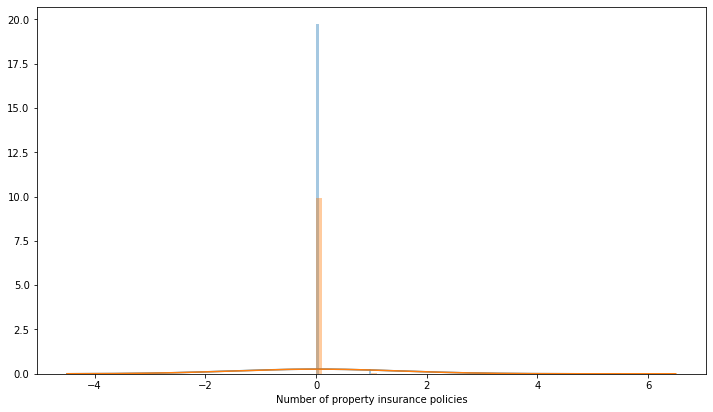

                                              Number of mobile home policies
Number of social security insurance policies                                
0                                                                     0.0578
1                                                                     0.1975
2                                                                     0.0000


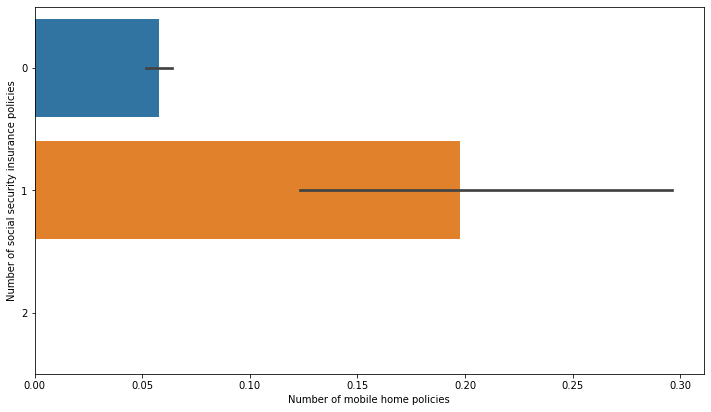

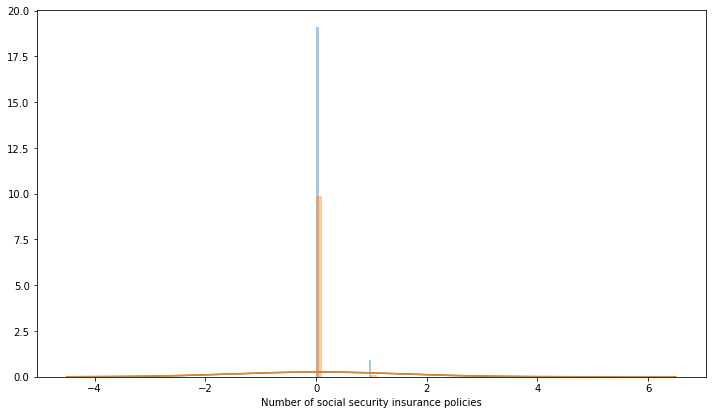

In [79]:
#plotting histograms

col_index = df_train_1.columns

for i in col_index[0:85]:
    j = df_train_1["Number of mobile home policies"] == 1
    j_not = df_train_1["Number of mobile home policies"] == 0
    
    a1 = df_train_1.loc[j,i]
    a2 = df_train_1.loc[j_not,i]
    
    pvt_temp = round(df_train_1.pivot_table(index=i, values = col_index[-1], aggfunc = 'mean'),4)
    print(pvt_temp)
    
    _2 = plt.figure(figsize = (16*3/4,9*3/4))
    _2 = sns.barplot(y = i, x=col_index[-1] , data =  df_train_1, orient='h')
    plt.show()
    
    _ = plt.figure(figsize=(16*3/4,9*3/4))
    _ = sns.distplot(a1, kde_kws= kde_kws, bins = 20, norm_hist = True)
    _ = sns.distplot(a2, kde_kws= kde_kws, bins = 20, norm_hist = True)
    
    plt.show()
    
    

In [12]:
df_caravan_2['Roman catholic'].head(10)

0    0
1    1
2    0
3    2
4    1
5    0
6    2
7    0
8    0
9    3
Name: Roman catholic, dtype: int64

In [13]:
print(L3_key)

   L3  percentage keys
0   0               0%
1   1          1 - 10%
2   2         11 - 23%
3   3         24 - 36%
4   4         37 - 49%
5   5         50 - 62%
6   6         63 - 75%
7   7         76 - 88%
8   8         89 - 99%
9   9             100%


In [14]:
df_corr = round(df_train_1.iloc[:,1:4].corr(),3)
print(df_corr)

                    Number of houses  Avg size household  Avg age
Number of houses               1.000               0.010    0.057
Avg size household             0.010               1.000   -0.328
Avg age                        0.057              -0.328    1.000


In [15]:
round(df_train_1.iloc[:,5:10].corr(),3)

Roman catholic  Protestant  Other religion  No religion  \
Roman catholic           1.000      -0.373           0.021       -0.064   
Protestant              -0.373       1.000          -0.318       -0.742   
Other religion           0.021      -0.318           1.000       -0.139   
No religion             -0.064      -0.742          -0.139        1.000   
Married                 -0.029       0.147          -0.126       -0.108   

                Married  
Roman catholic   -0.029  
Protestant        0.147  
Other religion   -0.126  
No religion      -0.108  
Married           1.000

In [16]:
cramers_v(df_train_1.iloc[:,1],df_train_1.iloc[:,10])

0.058592427225944786

In [17]:
df_cramer_v = pd.DataFrame(columns = ['variable 1','variable 2',"Cramer's V"])
df_cramer_v

Empty DataFrame
Columns: [variable 1, variable 2, Cramer's V]
Index: []

In [18]:
n = len(df_caravan_2.columns)-1


for i in df_train_1.columns:
        for j in df_train_1.columns:
            df_cramer_v = df_cramer_v.append({'variable 1':i, 'variable 2': j, "Cramer's V":cramers_v(df_train_1.loc[:,i],df_train_1.loc[:,j])}, ignore_index = True)
print(df_cramer_v.head())

         variable 1          variable 2  Cramer's V
0  Customer Subtype    Customer Subtype    1.000000
1  Customer Subtype    Number of houses    0.300883
2  Customer Subtype  Avg size household    0.360259
3  Customer Subtype             Avg age    0.376183
4  Customer Subtype  Customer main type    0.997416


In [19]:
df_cramer_v.head()

variable 1          variable 2  Cramer's V
0  Customer Subtype    Customer Subtype    1.000000
1  Customer Subtype    Number of houses    0.300883
2  Customer Subtype  Avg size household    0.360259
3  Customer Subtype             Avg age    0.376183
4  Customer Subtype  Customer main type    0.997416

In [20]:
pvt = df_cramer_v.pivot_table(index='variable 1', columns = 'variable 2')
pvt.head()

Cramer's V                                     \
variable 2              1 car    2 cars Average income   Avg age   
variable 1                                                         
1 car                1.000000  0.287180       0.168781  0.225061   
2 cars               0.287180  1.000000       0.149003  0.112632   
Average income       0.168781  0.149003       1.000000  0.144568   
Avg age              0.225061  0.112632       0.144568  1.000000   
Avg size household   0.202365  0.137366       0.190488  0.323786   

                                       \
variable 2         Avg size household   
variable 1                              
1 car                        0.202365   
2 cars                       0.137366   
Average income               0.190488   
Avg age                      0.323786   
Avg size household           1.000000   

                                                                \
variable 2         Contribution agricultural machines policies   
variable 1                                                       
1 car                                                 0.021357   
2 cars                                                0.000000   
Average income                                        0.000000   
Avg age                                               0.000000   
Avg size household                                    0.039653   

                                                                             \
variable 2         Contribution bicycle policies Contribution boat policies   
variable 1                                                                    
1 car                                   0.052485                   0.036701   
2 cars                                  0.000000                   0.030877   
Average income                          0.043560                   0.000000   
Avg age                                 0.021827                   0.000000   
Avg size household                      0.022920                   0.000000   

                                              \
variable 2         Contribution car policies   
variable 1                                     
1 car                               0.000000   
2 cars                              0.013677   
Average income                      0.023344   
Avg age                             0.000000   
Avg size household                  0.060485   

                                                       ...               \
variable 2         Contribution delivery van policies  ... Rented house   
variable 1                                             ...                
1 car                                             0.0  ...     0.163206   
2 cars                                            0.0  ...     0.187532   
Average income                                    0.0  ...     0.188845   
Avg age                                           0.0  ...     0.145878   
Avg size household                                0.0  ...     0.213995   

                                                                              \
variable 2         Roman catholic   Singles Skilled labourers Social class A   
variable 1                                                                     
1 car                    0.129202  0.207593          0.120916       0.111956   
2 cars                   0.143280  0.122425          0.136788       0.144291   
Average income           0.126149  0.198311          0.138845       0.222313   
Avg age                  0.075431  0.257536          0.112281       0.112619   
Avg size household       0.071659  0.497349          0.101005       0.136164   

                                                                   \
variable 2         Social class B1 Social class B2 Social class C   
variable 1                                                          
1 car                     0.090757        0.099246       0.113720   
2 cars                    0.093111        0.101850       0.122220   
Average inc

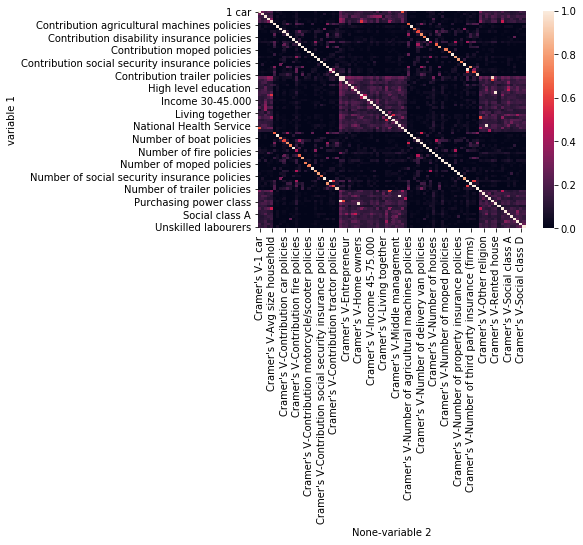

In [21]:
#Overall Cramer's V heatmap as a visual method to spot categorical correlation
sns.heatmap(pvt, vmin = 0 , vmax = 1)

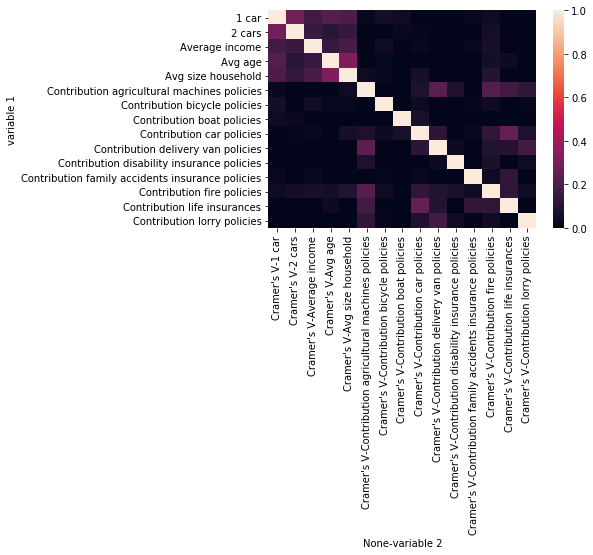

In [22]:
# Looking at slices of the heat map, since the values are dignally mirror each other then we only need to look at one of the
#triangle portion
sns.heatmap(pvt.iloc[0:15,0:15], vmin = 0 , vmax = 1)

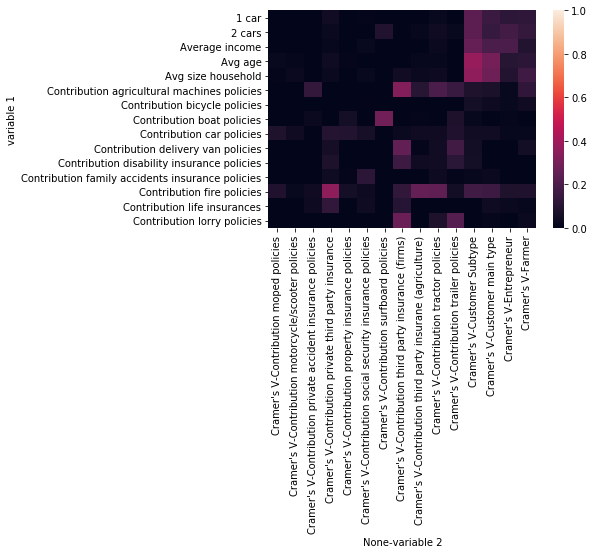

In [23]:
sns.heatmap(pvt.iloc[0:15,15:30], vmin = 0 , vmax = 1)

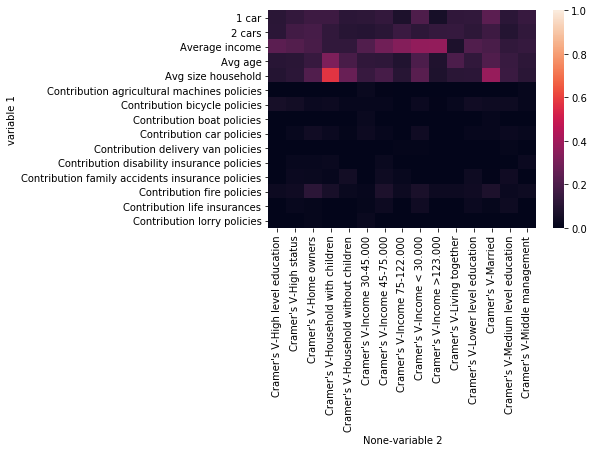

In [24]:
sns.heatmap(pvt.iloc[0:15,30:45], vmin = 0 , vmax = 1)

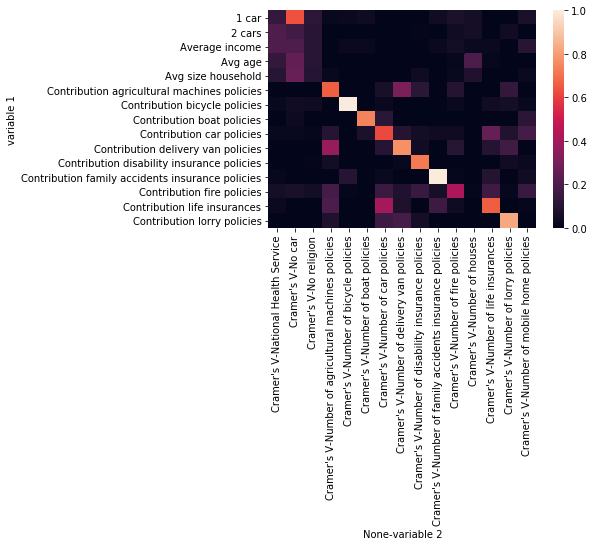

In [25]:
sns.heatmap(pvt.iloc[0:15,45:60], vmin = 0 , vmax = 1)

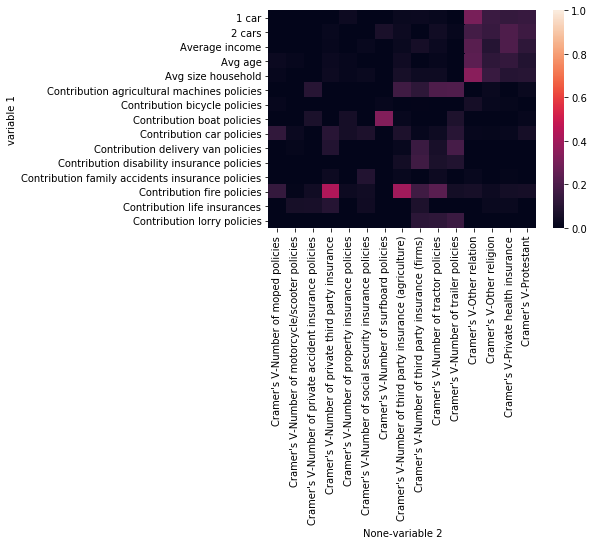

In [26]:
sns.heatmap(pvt.iloc[0:15,60:75], vmin = 0 , vmax = 1)

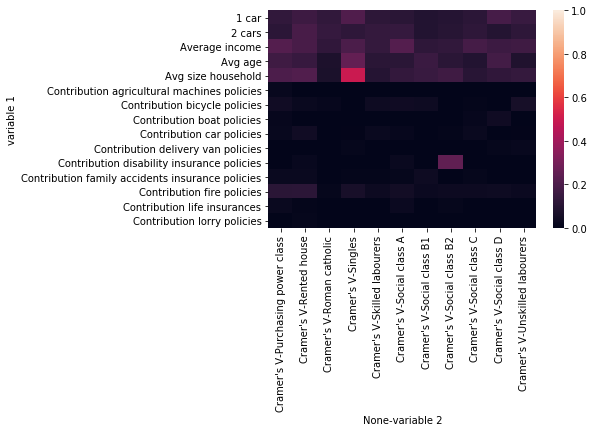

In [27]:
sns.heatmap(pvt.iloc[0:15,75:86], vmin = 0 , vmax = 1)

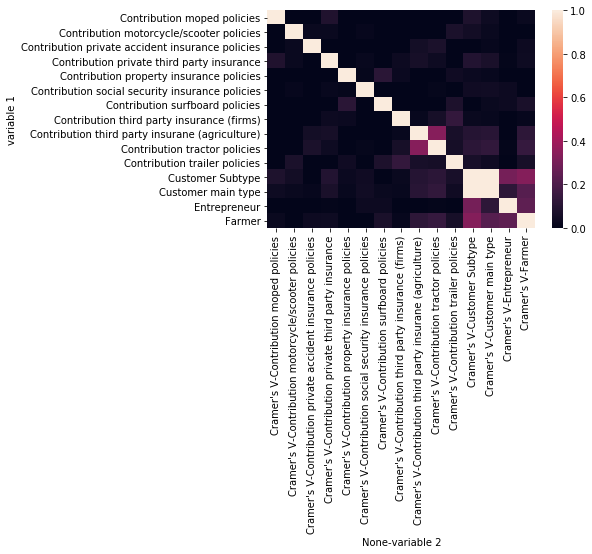

In [28]:
sns.heatmap(pvt.iloc[15:30,15:30], vmin = 0 , vmax = 1)

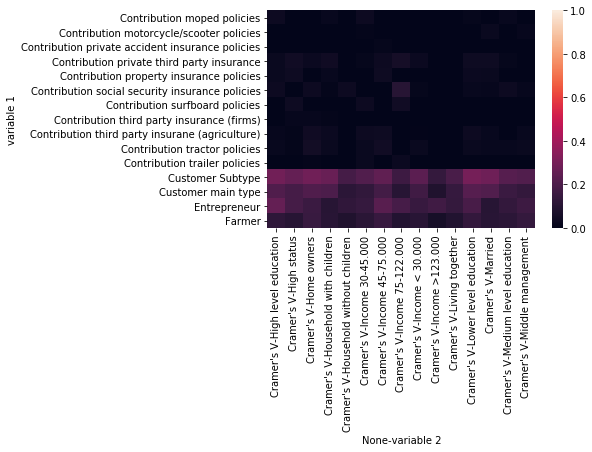

In [29]:
sns.heatmap(pvt.iloc[15:30,30:45], vmin = 0 , vmax = 1)

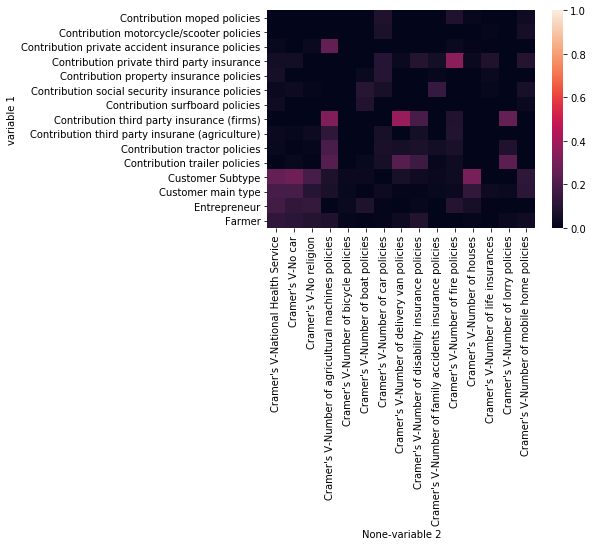

In [30]:
sns.heatmap(pvt.iloc[15:30,45:60], vmin = 0 , vmax = 1)

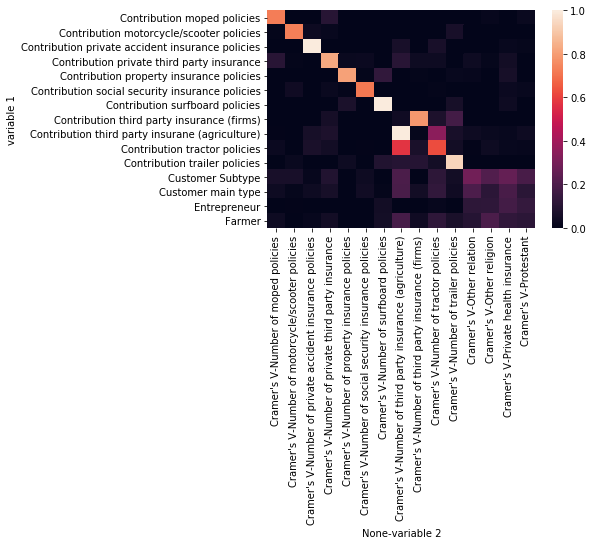

In [31]:
sns.heatmap(pvt.iloc[15:30,60:75], vmin = 0 , vmax = 1)

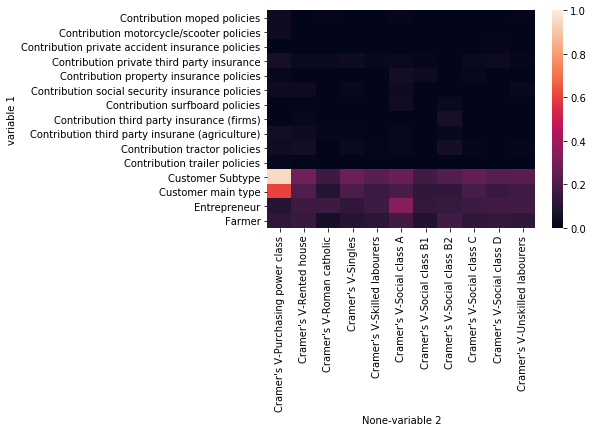

In [32]:
sns.heatmap(pvt.iloc[15:30,75:86], vmin = 0 , vmax = 1)

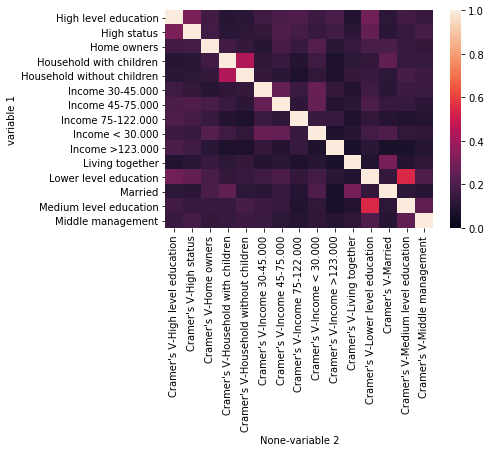

In [33]:
sns.heatmap(pvt.iloc[30:45,30:45], vmin = 0 , vmax = 1)

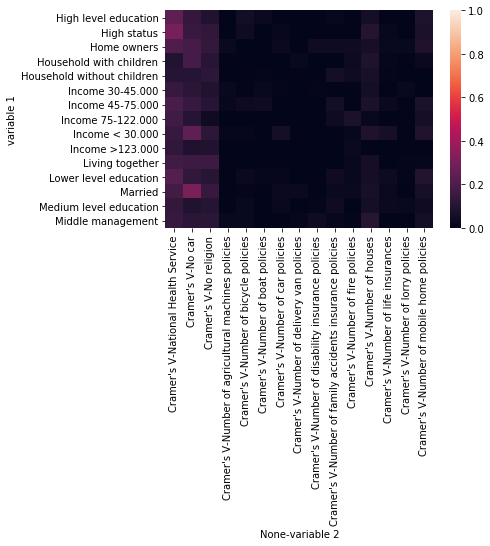

In [34]:
sns.heatmap(pvt.iloc[30:45,45:60], vmin = 0 , vmax = 1)

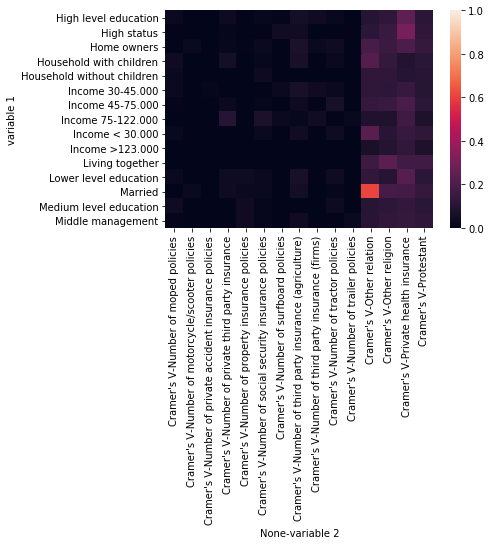

In [35]:
sns.heatmap(pvt.iloc[30:45,60:75], vmin = 0 , vmax = 1)

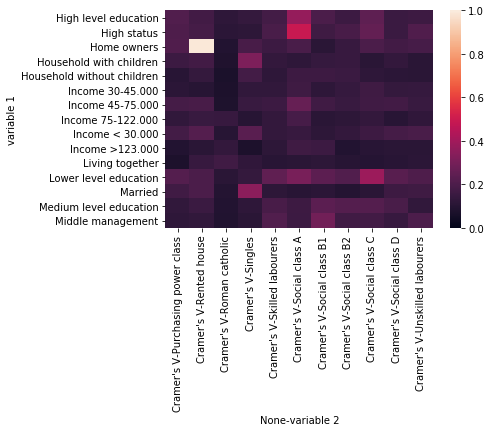

In [36]:
sns.heatmap(pvt.iloc[30:45,75:86], vmin = 0 , vmax = 1)

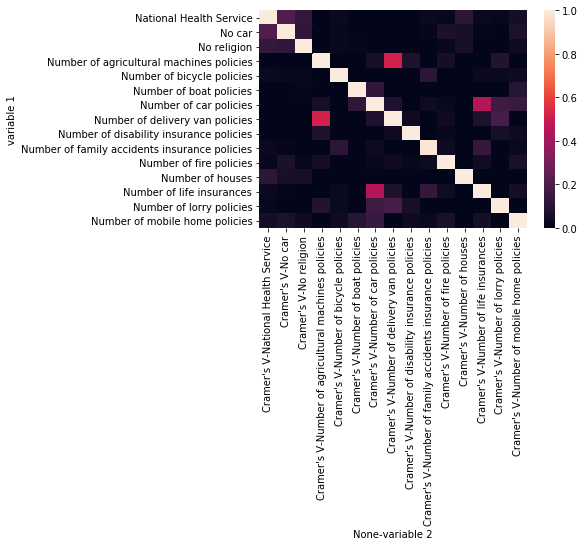

In [37]:
sns.heatmap(pvt.iloc[45:60,45:60], vmin = 0 , vmax = 1)

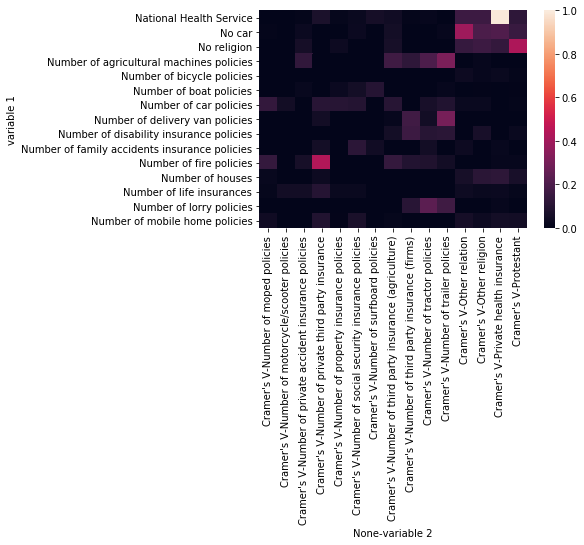

In [38]:
sns.heatmap(pvt.iloc[45:60,60:75], vmin = 0 , vmax = 1)

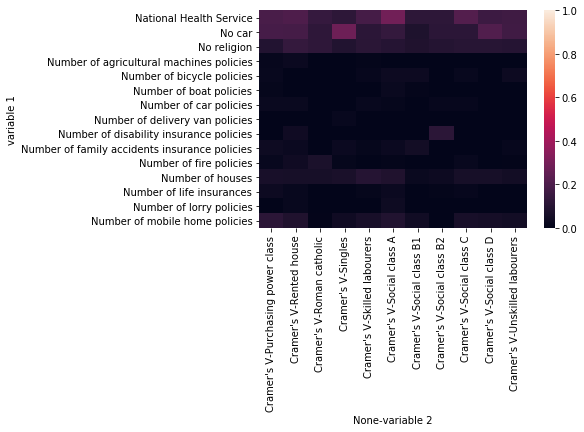

In [39]:
sns.heatmap(pvt.iloc[45:60,75:86], vmin = 0 , vmax = 1)

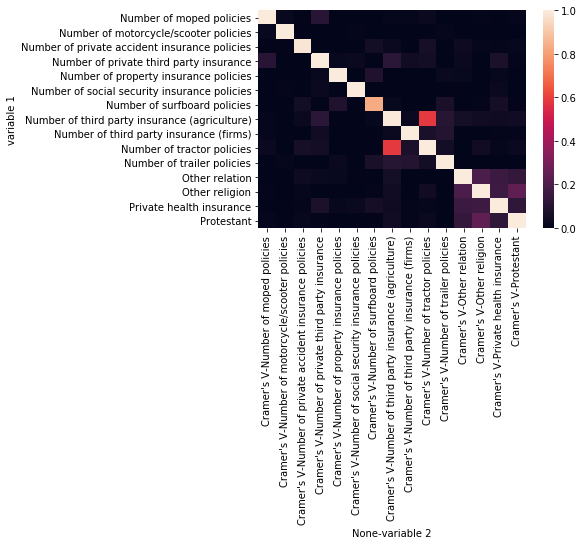

In [40]:
sns.heatmap(pvt.iloc[60:75,60:75], vmin = 0 , vmax = 1)

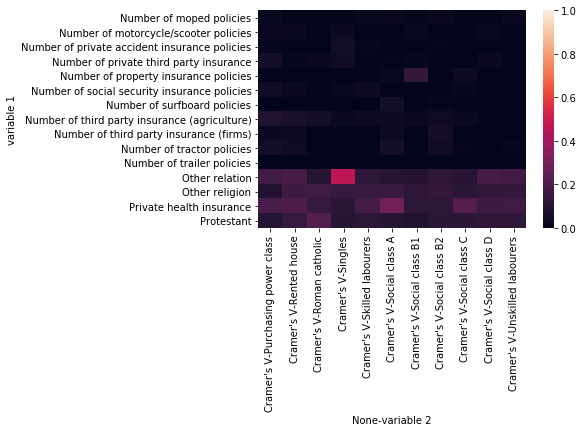

In [41]:
sns.heatmap(pvt.iloc[60:75,75:86], vmin = 0 , vmax = 1)

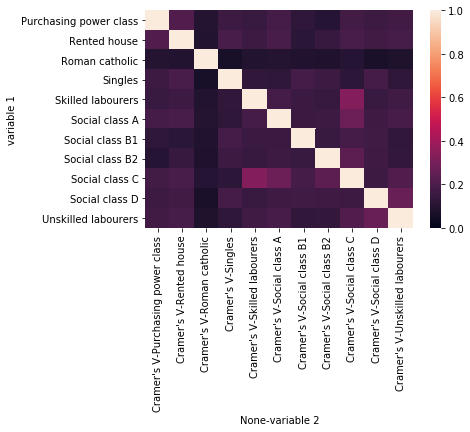

In [42]:
sns.heatmap(pvt.iloc[75:86,75:86], vmin = 0 , vmax = 1)

====================================================================================================================

===================================================================================================================

In [78]:
col_index = df_train_1.columns

for i in col_index[0:86]:
    
    pvt_temp = 100*round(df_train_1[i].value_counts(normalize = True).sort_index(),4)
   
    print(i+' Count %\n',pvt_temp,'\n')

Customer Subtype Count %
 1      2.13
2      1.41
3      4.28
4      0.89
5      0.77
6      2.04
7      0.76
8      5.82
9      4.77
10     2.83
11     2.63
12     1.91
13     3.07
15     0.09
16     0.27
17     0.15
18     0.33
19     0.05
20     0.43
21     0.26
22     1.68
23     4.31
24     3.09
25     1.41
26     0.82
27     0.86
28     0.43
29     1.48
30     2.03
31     3.52
32     2.42
33    13.91
34     3.13
35     3.68
36     3.86
37     2.27
38     5.82
39     5.63
40     1.22
41     3.52
Name: Customer Subtype, dtype: float64 

Number of houses Count %
 1     90.47
2      8.67
3      0.67
4      0.03
5      0.02
6      0.02
7      0.09
8      0.02
10     0.02
Name: Number of houses, dtype: float64 

Avg size household Count %
 1     4.88
2    36.60
3    45.45
4    11.90
5     1.17
Name: Avg size household, dtype: float64 

Avg age Count %
 1     1.27
2    24.94
3    51.53
4    18.43
5     3.32
6     0.52
Name: Avg age, dtype: float64 

Customer main type Count %
 1      9.

 0    98.88
1     0.33
2     0.65
3     0.10
4     0.02
5     0.02
Name: Contribution trailer policies, dtype: float64 

Contribution tractor policies Count %
 0    97.54
3     1.36
4     0.46
5     0.48
6     0.15
Name: Contribution tractor policies, dtype: float64 

Contribution agricultural machines policies Count %
 0    99.64
2     0.07
3     0.10
4     0.14
6     0.05
Name: Contribution agricultural machines policies, dtype: float64 

Contribution moped policies Count %
 0    93.20
2     0.58
3     4.84
4     1.08
5     0.27
6     0.02
Name: Contribution moped policies, dtype: float64 

Contribution life insurances Count %
 0    94.97
1     0.15
2     0.48
3     1.44
4     1.61
5     0.60
6     0.65
7     0.05
8     0.02
9     0.02
Name: Contribution life insurances, dtype: float64 

Contribution private accident insurance policies Count %
 0    99.47
1     0.05
2     0.31
3     0.07
4     0.05
5     0.02
6     0.03
Name: Contribution private accident insurance policies, dtype: f